In [1]:
library("here")
library(devtools)
library(Seurat)
library(tidyverse)
library(bedtoolsr)

load_all('/home/jpm73279/Socrates')

here() starts at /home/jpm73279/Mendieta_et_al_comparative_single_cell

Loading required package: usethis

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject

── Attaching packages ───────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

ℹ Loading Socrates

Loading required package: cicero

Loading required package: monocle

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: 'BiocGenerics'


The 

In [2]:
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_Proso/"
output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/Zm_Proso/"

proso_Zm_plates <- list("ZP_P11_G029_10x", "ZP_P2_G029_10x", "ZP_P1_G029_10x", "ZP_P3_G029_10x")

#meta_file_reads <- readRDS(paste0(output_path,"QC_output/",i, "_QC_soc_obj.rds"))

In [3]:
#maize_chromosome_list<-list("chr1","chr2","chr3","chr4","chr5","chr6","chr7","chr8","chr9","chr10","scaf_21","scaf_22","scaf_23","scaf_24","scaf_25","scaf_26","scaf_27","scaf_28","scaf_29","scaf_30","scaf_31","scaf_32","scaf_33","scaf_34","scaf_35","scaf_36","scaf_37","scaf_38","scaf_39","scaf_40","scaf_41","scaf_42","scaf_43","scaf_44","scaf_45","scaf_46","scaf_47","scaf_48","scaf_49","scaf_50","scaf_51","scaf_52","scaf_53","scaf_54","scaf_55","scaf_56","scaf_57","scaf_58","scaf_59","scaf_60","scaf_61","scaf_62","scaf_63","scaf_64","scaf_65","scaf_66","scaf_67","scaf_68","scaf_69","scaf_70","scaf_71","scaf_72","scaf_73","scaf_74","scaf_75","scaf_76","scaf_77","scaf_78","scaf_79","scaf_80","scaf_81","scaf_82","scaf_83","scaf_84","scaf_85","scaf_86","scaf_87","scaf_88","scaf_89","scaf_90","scaf_91","scaf_92","scaf_93","scaf_94","scaf_95","scaf_96","scaf_97","scaf_98","scaf_99","scaf_100","scaf_101","scaf_102","scaf_103","scaf_104","scaf_105","scaf_106","scaf_107","scaf_108","scaf_109","scaf_110","scaf_111","scaf_112","scaf_113","scaf_114","scaf_115","scaf_116","scaf_117","scaf_118","scaf_119","scaf_120","scaf_121","scaf_122","scaf_123","scaf_124","scaf_125","scaf_126","scaf_127","scaf_128","scaf_129","scaf_130","scaf_131","scaf_132","scaf_133","scaf_134","scaf_135","scaf_136","scaf_137","scaf_138","scaf_139","scaf_140","scaf_141","scaf_142","scaf_143","scaf_144","scaf_145","scaf_146","scaf_147","scaf_148","scaf_149","scaf_150","scaf_151","scaf_152","scaf_153","scaf_154","scaf_155","scaf_156","scaf_157","scaf_158","scaf_159","scaf_160","scaf_161","scaf_162","scaf_163","scaf_164","scaf_165","scaf_166","scaf_167","scaf_168","scaf_169","scaf_170","scaf_171","scaf_172","scaf_173","scaf_174","scaf_175","scaf_176","scaf_177","scaf_178","scaf_179","scaf_180","scaf_181","scaf_182","scaf_183","scaf_184","scaf_185","scaf_186","scaf_187","scaf_188","scaf_189","scaf_190","scaf_191","scaf_192","scaf_193","scaf_194","scaf_195","scaf_196","scaf_197","scaf_198","scaf_199","scaf_200","scaf_201","scaf_202","scaf_203","scaf_204","scaf_205","scaf_206","scaf_207","scaf_208","scaf_209","scaf_210","scaf_211","scaf_212","scaf_213","scaf_214","scaf_215","scaf_216","scaf_217","scaf_218","scaf_219","scaf_220","scaf_221","scaf_222","scaf_223","scaf_224","scaf_225","scaf_226","scaf_227","scaf_228","scaf_229","scaf_230","scaf_231","scaf_232","scaf_233","scaf_234","scaf_235","scaf_236","scaf_237","scaf_238","scaf_239","scaf_240","scaf_241","scaf_242","scaf_243","scaf_244","scaf_245","scaf_246","scaf_247","scaf_248","scaf_249","scaf_250","scaf_251","scaf_252","scaf_253","scaf_254","scaf_255","scaf_256","scaf_257","scaf_258","scaf_259","scaf_260","scaf_261","scaf_262","scaf_263","scaf_264","scaf_265","scaf_266","scaf_267","scaf_268","scaf_269","scaf_270","scaf_271","scaf_272","scaf_273","scaf_274","scaf_275","scaf_276","scaf_277","scaf_278","scaf_279","scaf_280","scaf_281","scaf_282","scaf_283","scaf_284","scaf_285","scaf_286","scaf_287","scaf_288","scaf_289","scaf_290","scaf_291","scaf_292","scaf_293","scaf_294","scaf_295","scaf_296","scaf_297","scaf_298","scaf_299","scaf_300","scaf_301","scaf_302","scaf_303","scaf_304","scaf_305","scaf_306","scaf_307","scaf_308","scaf_309","scaf_310","scaf_311","scaf_312","scaf_313","scaf_314","scaf_315","scaf_316","scaf_317","scaf_318","scaf_319","scaf_320","scaf_321","scaf_322","scaf_323","scaf_324","scaf_325","scaf_326","scaf_327","scaf_328","scaf_329","scaf_330","scaf_331","scaf_332","scaf_333","scaf_334","scaf_335","scaf_336","scaf_337","scaf_338","scaf_339","scaf_340","scaf_341","scaf_342","scaf_343","scaf_344","scaf_345","scaf_346","scaf_347","scaf_348","scaf_349","scaf_350","scaf_351","scaf_352","scaf_353","scaf_354","scaf_355","scaf_356","scaf_357","scaf_358","scaf_359","scaf_360","scaf_361","scaf_362","scaf_363","scaf_364","scaf_365","scaf_366","scaf_367","scaf_368","scaf_369","scaf_370","scaf_371","scaf_372","scaf_373","scaf_374","scaf_375","scaf_376","scaf_377","scaf_378","scaf_379","scaf_380","scaf_381","scaf_382","scaf_383","scaf_384","scaf_385","scaf_386","scaf_387","scaf_388","scaf_389","scaf_390","scaf_391","scaf_392","scaf_393","scaf_394","scaf_395","scaf_396","scaf_397","scaf_398","scaf_399","scaf_400","scaf_401","scaf_402","scaf_403","scaf_404","scaf_405","scaf_406","scaf_407","scaf_408","scaf_409","scaf_410","scaf_411","scaf_412","scaf_413","scaf_414","scaf_415","scaf_416","scaf_417","scaf_418","scaf_419","scaf_420","scaf_421","scaf_422","scaf_423","scaf_424","scaf_425","scaf_426","scaf_427","scaf_428","scaf_429","scaf_430","scaf_431","scaf_432","scaf_433","scaf_434","scaf_435","scaf_436","scaf_437","scaf_438","scaf_439","scaf_440","scaf_441","scaf_442","scaf_443","scaf_444","scaf_445","scaf_446","scaf_447","scaf_448","scaf_449","scaf_450","scaf_451","scaf_452","scaf_453","scaf_454","scaf_455","scaf_456","scaf_457","scaf_458","scaf_459","scaf_460","scaf_461","scaf_462","scaf_463","scaf_464","scaf_465","scaf_466","scaf_467","scaf_468","scaf_469","scaf_470","scaf_471","scaf_472","scaf_473","scaf_474","scaf_475","scaf_476","scaf_477","scaf_478","scaf_479","scaf_480","scaf_481","scaf_482","scaf_483","scaf_484","scaf_485","scaf_486","scaf_487","scaf_488","scaf_489","scaf_490","scaf_491","scaf_492","scaf_493","scaf_494","scaf_495","scaf_496","scaf_497","scaf_498","scaf_499","scaf_500","scaf_501","scaf_502","scaf_503","scaf_504","scaf_505","scaf_506","scaf_507","scaf_508","scaf_509","scaf_510","scaf_511","scaf_512","scaf_513","scaf_514","scaf_515","scaf_516","scaf_517","scaf_518","scaf_519","scaf_520","scaf_521","scaf_522","scaf_523","scaf_524","scaf_525","scaf_526","scaf_527","scaf_528","scaf_529","scaf_530","scaf_531","scaf_532","scaf_533","scaf_534","scaf_535","scaf_536","scaf_537","scaf_538","scaf_539","scaf_540","scaf_541","scaf_542","scaf_543","scaf_544","scaf_545","scaf_546","scaf_547","scaf_548","scaf_549","scaf_550","scaf_551","scaf_552","scaf_553","scaf_554","scaf_555","scaf_556","scaf_557","scaf_558","scaf_559","scaf_560","scaf_561","scaf_562","scaf_563","scaf_564","scaf_565","scaf_566","scaf_567","scaf_568","scaf_569","scaf_570","scaf_571","scaf_572","scaf_573","scaf_574","scaf_575","scaf_576","scaf_577","scaf_578","scaf_579","scaf_580","scaf_581","scaf_582","scaf_583","scaf_584","scaf_585","scaf_586","scaf_587","scaf_588","scaf_589","scaf_590","scaf_591","scaf_592","scaf_593","scaf_594","scaf_595","scaf_596","scaf_597","scaf_598","scaf_599","scaf_600","scaf_601","scaf_602","scaf_603","scaf_604","scaf_605","scaf_606","scaf_607","scaf_608","scaf_609","scaf_610","scaf_611","scaf_612","scaf_613","scaf_614","scaf_615","scaf_616","scaf_617","scaf_618","scaf_619","scaf_620","scaf_621","scaf_622","scaf_623","scaf_624","scaf_625","scaf_626","scaf_627","scaf_628","scaf_629","scaf_630","scaf_631","scaf_632","scaf_633","scaf_634","scaf_635","scaf_636","scaf_637","scaf_638","scaf_639","scaf_640","scaf_641","scaf_642","scaf_643","scaf_644","scaf_645","scaf_646","scaf_647","scaf_648","scaf_649","scaf_650","scaf_651","scaf_652","scaf_653","scaf_654","scaf_655","scaf_656","scaf_657","scaf_658","scaf_659","scaf_660","scaf_661","scaf_662","scaf_663","scaf_664","scaf_665","scaf_666","scaf_667","scaf_668","scaf_669","scaf_670","scaf_671","scaf_672","scaf_673","scaf_674","scaf_675","scaf_676","scaf_677","scaf_678","scaf_679","scaf_680","scaf_681","scaf_682","scaf_683","scaf_684","scaf_685","scaf_686","scaf_687","scaf_688","scaf_689","scaf_690","scaf_691","scaf_692","scaf_693","scaf_694","scaf_695")
#proso_millet_chromosome_list<-list("CM009699.2","CM009700.2","CM009701.2","CM009702.2","CM009703.2","CM009704.2","CM009705.2","CM009706.2","CM009707.2","CM009690.2","CM009691.2","CM009692.2","CM009693.2","CM009694.2","CM009695.2","CM009696.2","CM009697.2","CM009698.2","CM009689.1","PQIB02000019.1","PQIB02000020.1","PQIB02000021.1","PQIB02000022.1","PQIB02000023.1","PQIB02000024.1","PQIB02000025.1","PQIB02000026.1","PQIB02000027.1","PQIB02000028.1","PQIB02000029.1","PQIB02000030.1","PQIB02000031.1","PQIB02000032.1","PQIB02000033.1","PQIB02000034.1","PQIB02000035.1","PQIB02000036.1","PQIB02000037.1","PQIB02000038.1","PQIB02000039.1","PQIB02000040.1","PQIB02000041.1","PQIB02000042.1","PQIB02000043.1","PQIB02000044.1","PQIB02000045.1","PQIB02000046.1","PQIB02000047.1","PQIB02000048.1","PQIB02000049.1","PQIB02000050.1","PQIB02000051.1","PQIB02000052.1","PQIB02000053.1","PQIB02000054.1","PQIB02000055.1","PQIB02000056.1","PQIB02000057.1","PQIB02000058.1","PQIB02000059.1","PQIB02000060.1","PQIB02000061.1","PQIB02000062.1","PQIB02000063.1","PQIB02000064.1","PQIB02000065.1","PQIB02000066.1","PQIB02000067.1","PQIB02000068.1","PQIB02000069.1","PQIB02000070.1","PQIB02000071.1","PQIB02000072.1","PQIB02000073.1","PQIB02000074.1","PQIB02000075.1","PQIB02000076.1","PQIB02000077.1","PQIB02000078.1","PQIB02000079.1","PQIB02000080.1","PQIB02000081.1","PQIB02000082.1","PQIB02000083.1","PQIB02000084.1","PQIB02000085.1","PQIB02000086.1","PQIB02000087.1","PQIB02000088.1","PQIB02000089.1","PQIB02000090.1","PQIB02000091.1","PQIB02000092.1","PQIB02000093.1","PQIB02000094.1","PQIB02000095.1","PQIB02000096.1","PQIB02000097.1","PQIB02000098.1","PQIB02000099.1","PQIB02000100.1","PQIB02000101.1","PQIB02000102.1","PQIB02000103.1","PQIB02000104.1","PQIB02000105.1","PQIB02000106.1","PQIB02000107.1","PQIB02000108.1","PQIB02000109.1","PQIB02000110.1","PQIB02000111.1","PQIB02000112.1","PQIB02000113.1","PQIB02000114.1","PQIB02000115.1","PQIB02000116.1","PQIB02000117.1","PQIB02000118.1","PQIB02000119.1","PQIB02000120.1","PQIB02000121.1","PQIB02000122.1","PQIB02000123.1","PQIB02000124.1","PQIB02000125.1","PQIB02000126.1","PQIB02000127.1","PQIB02000128.1","PQIB02000129.1","PQIB02000130.1","PQIB02000131.1","PQIB02000132.1","PQIB02000133.1","PQIB02000134.1","PQIB02000135.1","PQIB02000136.1","PQIB02000137.1","PQIB02000138.1","PQIB02000139.1","PQIB02000140.1","PQIB02000141.1","PQIB02000142.1","PQIB02000143.1","PQIB02000144.1","PQIB02000145.1","PQIB02000146.1","PQIB02000147.1","PQIB02000148.1","PQIB02000149.1","PQIB02000150.1","PQIB02000151.1","PQIB02000152.1","PQIB02000153.1","PQIB02000154.1","PQIB02000155.1","PQIB02000156.1","PQIB02000157.1","PQIB02000158.1","PQIB02000159.1","PQIB02000160.1","PQIB02000161.1","PQIB02000162.1","PQIB02000163.1","PQIB02000164.1","PQIB02000165.1","PQIB02000166.1","PQIB02000167.1","PQIB02000168.1","PQIB02000169.1","PQIB02000170.1","PQIB02000171.1","PQIB02000172.1","PQIB02000173.1","PQIB02000174.1","PQIB02000175.1","PQIB02000176.1","PQIB02000177.1","PQIB02000178.1","PQIB02000179.1","PQIB02000180.1","PQIB02000181.1","PQIB02000182.1","PQIB02000183.1","PQIB02000184.1","PQIB02000185.1","PQIB02000186.1","PQIB02000187.1","PQIB02000188.1","PQIB02000189.1","PQIB02000190.1","PQIB02000191.1","PQIB02000192.1","PQIB02000193.1","PQIB02000194.1","PQIB02000195.1","PQIB02000196.1","PQIB02000197.1","PQIB02000198.1","PQIB02000199.1","PQIB02000200.1","PQIB02000201.1","PQIB02000202.1","PQIB02000203.1","PQIB02000204.1","PQIB02000205.1","PQIB02000206.1","PQIB02000207.1","PQIB02000208.1","PQIB02000209.1","PQIB02000210.1","PQIB02000211.1","PQIB02000212.1","PQIB02000213.1","PQIB02000214.1","PQIB02000215.1","PQIB02000216.1","PQIB02000217.1","PQIB02000218.1","PQIB02000219.1","PQIB02000220.1","PQIB02000221.1","PQIB02000222.1","PQIB02000223.1","PQIB02000224.1","PQIB02000225.1","PQIB02000226.1","PQIB02000227.1","PQIB02000228.1","PQIB02000229.1","PQIB02000230.1","PQIB02000231.1","PQIB02000232.1","PQIB02000233.1","PQIB02000234.1","PQIB02000235.1","PQIB02000236.1","PQIB02000237.1","PQIB02000238.1","PQIB02000239.1","PQIB02000240.1","PQIB02000241.1","PQIB02000242.1","PQIB02000243.1","PQIB02000244.1","PQIB02000245.1","PQIB02000246.1","PQIB02000247.1","PQIB02000248.1","PQIB02000249.1","PQIB02000250.1","PQIB02000251.1","PQIB02000252.1","PQIB02000253.1","PQIB02000254.1","PQIB02000255.1","PQIB02000256.1","PQIB02000257.1","PQIB02000258.1","PQIB02000259.1","PQIB02000260.1","PQIB02000261.1","PQIB02000262.1","PQIB02000263.1","PQIB02000264.1","PQIB02000265.1","PQIB02000266.1","PQIB02000267.1","PQIB02000268.1","PQIB02000269.1","PQIB02000270.1","PQIB02000271.1","PQIB02000272.1","PQIB02000273.1","PQIB02000274.1","PQIB02000275.1","PQIB02000276.1","PQIB02000277.1","PQIB02000278.1","PQIB02000279.1","PQIB02000280.1","PQIB02000281.1","PQIB02000282.1","PQIB02000283.1","PQIB02000284.1","PQIB02000285.1","PQIB02000286.1","PQIB02000287.1","PQIB02000288.1","PQIB02000289.1","PQIB02000290.1","PQIB02000291.1","PQIB02000292.1","PQIB02000293.1","PQIB02000294.1","PQIB02000295.1","PQIB02000296.1","PQIB02000297.1","PQIB02000298.1","PQIB02000299.1","PQIB02000300.1","PQIB02000301.1","PQIB02000302.1","PQIB02000303.1","PQIB02000304.1","PQIB02000305.1","PQIB02000306.1","PQIB02000307.1","PQIB02000308.1","PQIB02000309.1","PQIB02000310.1","PQIB02000311.1","PQIB02000312.1","PQIB02000313.1","PQIB02000314.1","PQIB02000315.1","PQIB02000316.1","PQIB02000317.1","PQIB02000318.1","PQIB02000319.1","PQIB02000320.1","PQIB02000321.1","PQIB02000322.1","PQIB02000323.1","PQIB02000324.1","PQIB02000325.1","PQIB02000326.1","PQIB02000327.1","PQIB02000328.1","PQIB02000329.1","PQIB02000330.1","PQIB02000331.1","PQIB02000332.1","PQIB02000333.1","PQIB02000334.1","PQIB02000335.1","PQIB02000336.1","PQIB02000337.1","PQIB02000338.1","PQIB02000339.1","PQIB02000340.1","PQIB02000341.1","PQIB02000342.1","PQIB02000343.1","PQIB02000344.1","PQIB02000345.1","PQIB02000346.1","PQIB02000347.1","PQIB02000348.1","PQIB02000349.1","PQIB02000350.1","PQIB02000351.1","PQIB02000352.1","PQIB02000353.1","PQIB02000354.1","PQIB02000355.1","PQIB02000356.1","PQIB02000357.1","PQIB02000358.1","PQIB02000359.1","PQIB02000360.1","PQIB02000361.1","PQIB02000362.1","PQIB02000363.1","PQIB02000364.1","PQIB02000365.1","PQIB02000366.1","PQIB02000367.1","PQIB02000368.1","PQIB02000369.1","PQIB02000370.1","PQIB02000371.1","PQIB02000372.1","PQIB02000373.1","PQIB02000374.1","PQIB02000375.1","PQIB02000376.1","PQIB02000377.1","PQIB02000378.1","PQIB02000379.1","PQIB02000380.1","PQIB02000381.1","PQIB02000382.1","PQIB02000383.1","PQIB02000384.1","PQIB02000385.1","PQIB02000386.1","PQIB02000387.1","PQIB02000388.1","PQIB02000389.1","PQIB02000390.1","PQIB02000391.1","PQIB02000392.1","PQIB02000393.1","PQIB02000394.1","PQIB02000395.1","PQIB02000396.1","PQIB02000397.1","PQIB02000398.1","PQIB02000399.1","PQIB02000400.1","PQIB02000401.1","PQIB02000402.1","PQIB02000403.1","PQIB02000404.1","PQIB02000405.1","PQIB02000406.1","PQIB02000407.1","PQIB02000408.1","PQIB02000409.1","PQIB02000410.1","PQIB02000411.1","PQIB02000412.1","PQIB02000413.1","PQIB02000414.1","PQIB02000415.1","PQIB02000416.1","PQIB02000417.1","PQIB02000418.1","PQIB02000419.1","PQIB02000420.1","PQIB02000421.1","PQIB02000422.1","PQIB02000423.1","PQIB02000424.1","PQIB02000425.1","PQIB02000426.1","PQIB02000427.1","PQIB02000428.1","PQIB02000429.1","PQIB02000430.1","PQIB02000431.1","PQIB02000432.1","PQIB02000433.1","PQIB02000434.1","PQIB02000435.1","PQIB02000436.1","PQIB02000437.1","PQIB02000438.1","PQIB02000439.1","PQIB02000440.1","PQIB02000441.1","PQIB02000442.1","PQIB02000443.1","PQIB02000444.1","PQIB02000445.1","PQIB02000446.1","PQIB02000447.1","PQIB02000448.1","PQIB02000449.1","PQIB02000450.1","PQIB02000451.1","PQIB02000452.1","PQIB02000453.1","PQIB02000454.1","PQIB02000455.1","PQIB02000456.1","PQIB02000457.1","PQIB02000458.1","PQIB02000459.1","PQIB02000460.1","PQIB02000461.1","PQIB02000462.1","PQIB02000463.1","PQIB02000464.1","PQIB02000465.1","PQIB02000466.1","PQIB02000467.1","PQIB02000468.1","PQIB02000469.1","PQIB02000470.1","PQIB02000471.1","PQIB02000472.1","PQIB02000473.1","PQIB02000474.1","PQIB02000475.1","PQIB02000476.1","PQIB02000477.1","PQIB02000478.1","PQIB02000479.1","PQIB02000480.1","PQIB02000481.1","PQIB02000482.1","PQIB02000483.1","PQIB02000484.1","PQIB02000485.1","PQIB02000486.1","PQIB02000487.1","PQIB02000488.1","PQIB02000489.1","PQIB02000490.1","PQIB02000491.1","PQIB02000492.1","PQIB02000493.1","PQIB02000494.1","PQIB02000495.1","PQIB02000496.1","PQIB02000497.1","PQIB02000498.1","PQIB02000499.1","PQIB02000500.1","PQIB02000501.1","PQIB02000502.1","PQIB02000503.1","PQIB02000504.1","PQIB02000505.1","PQIB02000506.1","PQIB02000507.1","PQIB02000508.1","PQIB02000509.1","PQIB02000510.1","PQIB02000511.1","PQIB02000512.1","PQIB02000513.1","PQIB02000514.1","PQIB02000515.1","PQIB02000516.1","PQIB02000517.1","PQIB02000518.1","PQIB02000519.1","PQIB02000520.1","PQIB02000521.1","PQIB02000522.1","PQIB02000523.1","PQIB02000524.1","PQIB02000525.1","PQIB02000526.1","PQIB02000527.1","PQIB02000528.1","PQIB02000529.1","PQIB02000530.1","PQIB02000531.1","PQIB02000532.1","PQIB02000533.1","PQIB02000534.1","PQIB02000535.1","PQIB02000536.1","PQIB02000537.1","PQIB02000538.1","PQIB02000539.1","PQIB02000540.1","PQIB02000541.1","PQIB02000542.1","PQIB02000543.1","PQIB02000544.1","PQIB02000545.1","PQIB02000546.1","PQIB02000547.1","PQIB02000548.1","PQIB02000549.1","PQIB02000550.1","PQIB02000551.1","PQIB02000552.1","PQIB02000553.1","PQIB02000554.1","PQIB02000555.1","PQIB02000556.1","PQIB02000557.1","PQIB02000558.1","PQIB02000559.1","PQIB02000560.1","PQIB02000561.1","PQIB02000562.1","PQIB02000563.1","PQIB02000564.1","PQIB02000565.1","PQIB02000566.1","PQIB02000567.1","PQIB02000568.1","PQIB02000569.1","PQIB02000570.1","PQIB02000571.1","PQIB02000572.1","PQIB02000573.1","PQIB02000574.1","PQIB02000575.1","PQIB02000576.1","PQIB02000577.1","PQIB02000578.1","PQIB02000579.1","PQIB02000580.1","PQIB02000581.1","PQIB02000582.1","PQIB02000583.1","PQIB02000584.1","PQIB02000585.1","PQIB02000586.1","PQIB02000587.1","PQIB02000588.1","PQIB02000589.1","PQIB02000590.1",
#"PQIB02000591.1","PQIB02000592.1","PQIB02000593.1","PQIB02000594.1","PQIB02000595.1","PQIB02000596.1","PQIB02000597.1","PQIB02000598.1","PQIB02000599.1","PQIB02000600.1","PQIB02000601.1","PQIB02000602.1","PQIB02000603.1","PQIB02000604.1","PQIB02000605.1","PQIB02000606.1","PQIB02000607.1","PQIB02000608.1","PQIB02000609.1","PQIB02000610.1","PQIB02000611.1","PQIB02000612.1","PQIB02000613.1","PQIB02000614.1","PQIB02000615.1","PQIB02000616.1","PQIB02000617.1","PQIB02000618.1","PQIB02000619.1","PQIB02000620.1","PQIB02000621.1","PQIB02000622.1","PQIB02000623.1","PQIB02000624.1","PQIB02000625.1","PQIB02000626.1","PQIB02000627.1","PQIB02000628.1","PQIB02000629.1","PQIB02000630.1","PQIB02000631.1","PQIB02000632.1","PQIB02000633.1","PQIB02000634.1","PQIB02000635.1","PQIB02000636.1","PQIB02000637.1","PQIB02000638.1","PQIB02000639.1","PQIB02000640.1","PQIB02000641.1","PQIB02000642.1","PQIB02000643.1","PQIB02000644.1","PQIB02000645.1","PQIB02000646.1","PQIB02000647.1","PQIB02000648.1","PQIB02000649.1","PQIB02000650.1","PQIB02000651.1","PQIB02000652.1","PQIB02000653.1","PQIB02000654.1","PQIB02000655.1","PQIB02000656.1","PQIB02000657.1","PQIB02000658.1","PQIB02000659.1","PQIB02000660.1","PQIB02000661.1","PQIB02000662.1","PQIB02000663.1","PQIB02000664.1","PQIB02000665.1","PQIB02000666.1","PQIB02000667.1","PQIB02000668.1","PQIB02000669.1","PQIB02000670.1","PQIB02000671.1","PQIB02000672.1","PQIB02000673.1","PQIB02000674.1","PQIB02000675.1","PQIB02000676.1","PQIB02000677.1","PQIB02000678.1","PQIB02000679.1","PQIB02000680.1","PQIB02000681.1","PQIB02000682.1","PQIB02000683.1","PQIB02000684.1","PQIB02000685.1","PQIB02000686.1","PQIB02000687.1","PQIB02000688.1","PQIB02000689.1","PQIB02000690.1","PQIB02000691.1","PQIB02000692.1","PQIB02000693.1","PQIB02000694.1","PQIB02000695.1","PQIB02000696.1","PQIB02000697.1","PQIB02000698.1","PQIB02000699.1","PQIB02000700.1","PQIB02000701.1","PQIB02000702.1","PQIB02000703.1","PQIB02000704.1","PQIB02000705.1","PQIB02000706.1","PQIB02000707.1","PQIB02000708.1","PQIB02000709.1","PQIB02000710.1","PQIB02000711.1","PQIB02000712.1","PQIB02000713.1","PQIB02000714.1","PQIB02000715.1","PQIB02000716.1","PQIB02000717.1","PQIB02000718.1","PQIB02000719.1","PQIB02000720.1","PQIB02000721.1","PQIB02000722.1","PQIB02000723.1","PQIB02000724.1","PQIB02000725.1","PQIB02000726.1","PQIB02000727.1","PQIB02000728.1","PQIB02000729.1","PQIB02000730.1","PQIB02000731.1","PQIB02000732.1","PQIB02000733.1","PQIB02000734.1","PQIB02000735.1","PQIB02000736.1","PQIB02000737.1","PQIB02000738.1","PQIB02000739.1","PQIB02000740.1","PQIB02000741.1","PQIB02000742.1","PQIB02000743.1","PQIB02000744.1","PQIB02000745.1","PQIB02000746.1","PQIB02000747.1","PQIB02000748.1","PQIB02000749.1","PQIB02000750.1","PQIB02000751.1","PQIB02000752.1","PQIB02000753.1","PQIB02000754.1","PQIB02000755.1","PQIB02000756.1","PQIB02000757.1","PQIB02000758.1","PQIB02000759.1","PQIB02000760.1","PQIB02000761.1","PQIB02000762.1","PQIB02000763.1","PQIB02000764.1","PQIB02000765.1","PQIB02000766.1","PQIB02000767.1","PQIB02000768.1","PQIB02000769.1","PQIB02000770.1","PQIB02000771.1","PQIB02000772.1","PQIB02000773.1","PQIB02000774.1","PQIB02000775.1","PQIB02000776.1","PQIB02000777.1","PQIB02000778.1","PQIB02000779.1","PQIB02000780.1","PQIB02000781.1","PQIB02000782.1","PQIB02000783.1","PQIB02000784.1","PQIB02000785.1","PQIB02000786.1","PQIB02000787.1","PQIB02000788.1","PQIB02000789.1","PQIB02000790.1","PQIB02000791.1","PQIB02000792.1","PQIB02000793.1","PQIB02000794.1","PQIB02000795.1","PQIB02000796.1","PQIB02000797.1","PQIB02000798.1","PQIB02000799.1","PQIB02000800.1","PQIB02000801.1","PQIB02000802.1","PQIB02000803.1","PQIB02000804.1","PQIB02000805.1","PQIB02000806.1","PQIB02000807.1","PQIB02000808.1","PQIB02000809.1","PQIB02000810.1","PQIB02000811.1","PQIB02000812.1","PQIB02000813.1","PQIB02000814.1","PQIB02000815.1","PQIB02000816.1","PQIB02000817.1","PQIB02000818.1","PQIB02000819.1","PQIB02000820.1","PQIB02000821.1","PQIB02000822.1","PQIB02000823.1","PQIB02000824.1","PQIB02000825.1","PQIB02000826.1","PQIB02000827.1","PQIB02000828.1","PQIB02000829.1","PQIB02000830.1","PQIB02000831.1","PQIB02000832.1","PQIB02000833.1","PQIB02000834.1","PQIB02000835.1","PQIB02000836.1","PQIB02000837.1","PQIB02000838.1","PQIB02000839.1","PQIB02000840.1","PQIB02000841.1","PQIB02000842.1","PQIB02000843.1","PQIB02000844.1","PQIB02000845.1","PQIB02000846.1","PQIB02000847.1","PQIB02000848.1","PQIB02000849.1","PQIB02000850.1","PQIB02000851.1","PQIB02000852.1","PQIB02000853.1","PQIB02000854.1","PQIB02000855.1","PQIB02000856.1","PQIB02000857.1","PQIB02000858.1","PQIB02000859.1","PQIB02000860.1","PQIB02000861.1","PQIB02000862.1","PQIB02000863.1","PQIB02000864.1","PQIB02000865.1","PQIB02000866.1","PQIB02000867.1","PQIB02000868.1","PQIB02000869.1","PQIB02000870.1","PQIB02000871.1","PQIB02000872.1","PQIB02000873.1","PQIB02000874.1","PQIB02000875.1","PQIB02000876.1","PQIB02000877.1","PQIB02000878.1","PQIB02000879.1","PQIB02000880.1","PQIB02000881.1","PQIB02000882.1","PQIB02000883.1","PQIB02000884.1","PQIB02000885.1","PQIB02000886.1","PQIB02000887.1","PQIB02000888.1","PQIB02000889.1","PQIB02000890.1","PQIB02000891.1","PQIB02000892.1","PQIB02000893.1","PQIB02000894.1","PQIB02000895.1","PQIB02000896.1","PQIB02000897.1","PQIB02000898.1","PQIB02000899.1","PQIB02000900.1","PQIB02000901.1","PQIB02000902.1","PQIB02000903.1","PQIB02000904.1","PQIB02000905.1","PQIB02000906.1","PQIB02000907.1","PQIB02000908.1","PQIB02000909.1","PQIB02000910.1","PQIB02000911.1","PQIB02000912.1","PQIB02000913.1","PQIB02000914.1","PQIB02000915.1","PQIB02000916.1","PQIB02000917.1","PQIB02000918.1","PQIB02000919.1","PQIB02000920.1","PQIB02000921.1","PQIB02000922.1","PQIB02000923.1","PQIB02000924.1","PQIB02000925.1","PQIB02000926.1","PQIB02000927.1","PQIB02000928.1","PQIB02000929.1","PQIB02000930.1","PQIB02000931.1","PQIB02000932.1","PQIB02000933.1","PQIB02000934.1","PQIB02000935.1","PQIB02000936.1","PQIB02000937.1","PQIB02000938.1","PQIB02000939.1","PQIB02000940.1","PQIB02000941.1","PQIB02000942.1","PQIB02000943.1","PQIB02000944.1","PQIB02000945.1","PQIB02000946.1","PQIB02000947.1","PQIB02000948.1","PQIB02000949.1","PQIB02000950.1","PQIB02000951.1","PQIB02000952.1","PQIB02000953.1","PQIB02000954.1","PQIB02000955.1","PQIB02000956.1","PQIB02000957.1","PQIB02000958.1","PQIB02000959.1","PQIB02000960.1","PQIB02000961.1","PQIB02000962.1","PQIB02000963.1","PQIB02000964.1","PQIB02000965.1","PQIB02000966.1","PQIB02000967.1","PQIB02000968.1","PQIB02000969.1","PQIB02000970.1","PQIB02000971.1","PQIB02000972.1","PQIB02000973.1","PQIB02000974.1","PQIB02000975.1","PQIB02000976.1","PQIB02000977.1","PQIB02000978.1","PQIB02000979.1","PQIB02000980.1","PQIB02000981.1","PQIB02000982.1","PQIB02000983.1","PQIB02000984.1","PQIB02000985.1","PQIB02000986.1","PQIB02000987.1","PQIB02000988.1","PQIB02000989.1","PQIB02000990.1","PQIB02000991.1","PQIB02000992.1","PQIB02000993.1","PQIB02000994.1","PQIB02000995.1","PQIB02000996.1","PQIB02000997.1","PQIB02000998.1","PQIB02000999.1","PQIB02001000.1","PQIB02001001.1","PQIB02001002.1","PQIB02001003.1","PQIB02001004.1","PQIB02001005.1","PQIB02001006.1","PQIB02001007.1","PQIB02001008.1","PQIB02001009.1","PQIB02001010.1","PQIB02001011.1","PQIB02001012.1","PQIB02001013.1","PQIB02001014.1","PQIB02001015.1","PQIB02001016.1","PQIB02001017.1","PQIB02001018.1","PQIB02001019.1","PQIB02001020.1","PQIB02001021.1","PQIB02001022.1","PQIB02001023.1","PQIB02001024.1","PQIB02001025.1","PQIB02001026.1","PQIB02001027.1","PQIB02001028.1","PQIB02001029.1","PQIB02001030.1","PQIB02001031.1","PQIB02001032.1","PQIB02001033.1","PQIB02001034.1","PQIB02001035.1","PQIB02001036.1","PQIB02001037.1","PQIB02001038.1","PQIB02001039.1","PQIB02001040.1","PQIB02001041.1","PQIB02001042.1","PQIB02001043.1","PQIB02001044.1","PQIB02001045.1","PQIB02001046.1","PQIB02001047.1","PQIB02001048.1","PQIB02001049.1","PQIB02001050.1","PQIB02001051.1","PQIB02001052.1","PQIB02001053.1","PQIB02001054.1","PQIB02001055.1","PQIB02001056.1","PQIB02001057.1","PQIB02001058.1","PQIB02001059.1","PQIB02001060.1","PQIB02001061.1","PQIB02001062.1","PQIB02001063.1","PQIB02001064.1","PQIB02001065.1","PQIB02001066.1","PQIB02001067.1","PQIB02001068.1","PQIB02001069.1","PQIB02001070.1","PQIB02001071.1","PQIB02001072.1","PQIB02001073.1","PQIB02001074.1","PQIB02001075.1","PQIB02001076.1","PQIB02001077.1","PQIB02001078.1","PQIB02001079.1","PQIB02001080.1","PQIB02001081.1","PQIB02001082.1","PQIB02001083.1","PQIB02001084.1","PQIB02001085.1","PQIB02001086.1","PQIB02001087.1","PQIB02001088.1","PQIB02001089.1","PQIB02001090.1","PQIB02001091.1","PQIB02001092.1","PQIB02001093.1","PQIB02001094.1","PQIB02001095.1","PQIB02001096.1","PQIB02001097.1","PQIB02001098.1","PQIB02001099.1","PQIB02001100.1","PQIB02001101.1","PQIB02001102.1","PQIB02001103.1","PQIB02001104.1","PQIB02001105.1","PQIB02001106.1","PQIB02001107.1","PQIB02001108.1","PQIB02001109.1","PQIB02001110.1","PQIB02001111.1","PQIB02001112.1","PQIB02001113.1","PQIB02001114.1","PQIB02001115.1","PQIB02001116.1","PQIB02001117.1","PQIB02001118.1","PQIB02001119.1","PQIB02001120.1","PQIB02001121.1","PQIB02001122.1","PQIB02001123.1","PQIB02001124.1","PQIB02001125.1","PQIB02001126.1","PQIB02001127.1","PQIB02001128.1","PQIB02001129.1","PQIB02001130.1","PQIB02001131.1","PQIB02001132.1","PQIB02001133.1","PQIB02001134.1","PQIB02001135.1","PQIB02001136.1","PQIB02001137.1","PQIB02001138.1","PQIB02001139.1","PQIB02001140.1","PQIB02001141.1","PQIB02001142.1","PQIB02001143.1","PQIB02001144.1","PQIB02001145.1","PQIB02001146.1","PQIB02001147.1","PQIB02001148.1","PQIB02001149.1","PQIB02001150.1","PQIB02001151.1","PQIB02001152.1","PQIB02001153.1","PQIB02001154.1","PQIB02001155.1","PQIB02001156.1","PQIB02001157.1","PQIB02001158.1","PQIB02001159.1","PQIB02001160.1","PQIB02001161.1","PQIB02001162.1","PQIB02001163.1","PQIB02001164.1","PQIB02001165.1","PQIB02001166.1","PQIB02001167.1","PQIB02001168.1","PQIB02001169.1","PQIB02001170.1","PQIB02001171.1","PQIB02001172.1","PQIB02001173.1","PQIB02001174.1","PQIB02001175.1","PQIB02001176.1","PQIB02001177.1",
#"PQIB02001178.1","PQIB02001179.1","PQIB02001180.1","PQIB02001181.1","PQIB02001182.1","PQIB02001183.1","PQIB02001184.1","PQIB02001185.1","PQIB02001186.1","PQIB02001187.1","PQIB02001188.1","PQIB02001189.1","PQIB02001190.1","PQIB02001191.1","PQIB02001192.1","PQIB02001193.1","PQIB02001194.1","PQIB02001195.1","PQIB02001196.1","PQIB02001197.1","PQIB02001198.1","PQIB02001199.1","PQIB02001200.1","PQIB02001201.1","PQIB02001202.1","PQIB02001203.1","PQIB02001204.1","PQIB02001205.1","PQIB02001206.1","PQIB02001207.1","PQIB02001208.1","PQIB02001209.1","PQIB02001210.1","PQIB02001211.1","PQIB02001212.1","PQIB02001213.1","PQIB02001214.1","PQIB02001215.1","PQIB02001216.1","PQIB02001217.1","PQIB02001218.1","PQIB02001219.1","PQIB02001220.1","PQIB02001221.1","PQIB02001222.1","PQIB02001223.1","PQIB02001224.1","PQIB02001225.1","PQIB02001226.1","PQIB02001227.1","PQIB02001228.1","PQIB02001229.1","PQIB02001230.1","PQIB02001231.1","PQIB02001232.1","PQIB02001233.1","PQIB02001234.1","PQIB02001235.1","PQIB02001236.1","PQIB02001237.1","PQIB02001238.1","PQIB02001239.1","PQIB02001240.1","PQIB02001241.1","PQIB02001242.1","PQIB02001243.1","PQIB02001244.1","PQIB02001245.1","PQIB02001246.1","PQIB02001247.1","PQIB02001248.1","PQIB02001249.1","PQIB02001250.1","PQIB02001251.1","PQIB02001252.1","PQIB02001253.1","PQIB02001254.1","PQIB02001255.1","PQIB02001256.1","PQIB02001257.1","PQIB02001258.1","PQIB02001259.1","PQIB02001260.1","PQIB02001261.1","PQIB02001262.1","PQIB02001263.1","PQIB02001264.1","PQIB02001265.1","PQIB02001266.1","PQIB02001267.1","PQIB02001268.1","PQIB02001269.1","PQIB02001270.1","PQIB02001271.1","PQIB02001272.1","PQIB02001273.1","PQIB02001274.1","PQIB02001275.1","PQIB02001276.1","PQIB02001277.1","PQIB02001278.1","PQIB02001279.1","PQIB02001280.1","PQIB02001281.1","PQIB02001282.1","PQIB02001283.1","PQIB02001284.1","PQIB02001285.1","PQIB02001286.1","PQIB02001287.1","PQIB02001288.1","PQIB02001289.1","PQIB02001290.1","PQIB02001291.1","PQIB02001292.1","PQIB02001293.1","PQIB02001294.1","PQIB02001295.1","PQIB02001296.1","PQIB02001297.1","PQIB02001298.1","PQIB02001299.1","PQIB02001300.1","PQIB02001301.1","PQIB02001302.1","PQIB02001303.1","PQIB02001304.1","PQIB02001305.1")


maize_chromosome_list<-list("chr1","chr2","chr3","chr4","chr5","chr6","chr7","chr8","chr9","chr10")
proso_millet_chromosome_list<-list("CM009699.2","CM009700.2","CM009701.2","CM009702.2","CM009703.2","CM009704.2","CM009705.2","CM009706.2","CM009707.2","CM009690.2","CM009691.2","CM009692.2","CM009693.2","CM009694.2","CM009695.2","CM009696.2","CM009697.2","CM009698.2","CM009689.1")

In [4]:
plate_P1_low_concentration_soc_obj <- readRDS(paste0(output_path,"QC_output/","ZP_P1_G029_10x", "_QC_soc_obj.rds"))
plate_P1_low_concentration_raw_obj <- readRDS(paste0(output_path,"QC_output/","ZP_P1_G029_10x", "_QC_obj.rds"))

In [20]:
test <- (plate_P1_low_concentration_raw_obj$bed)

In [23]:
genome_intersection <- plate_P1_low_concentration_raw_obj$meta
head(genome_intersection)

cellID                                          
BC:Z:ACAGTGATGTCATAAGAGTAGAGACCGG-ZP_P1_G029_10x BC:Z:ACAGTGATGTCATAAGAGTAGAGACCGG-ZP_P1_G029_10x
BC:Z:ACAGTGTAGCTTTAAGAATTCCTACCGG-ZP_P1_G029_10x BC:Z:ACAGTGTAGCTTTAAGAATTCCTACCGG-ZP_P1_G029_10x
BC:Z:ACAGTGGGCTACTTACTGTTTCGGCTCC-ZP_P1_G029_10x BC:Z:ACAGTGGGCTACTTACTGTTTCGGCTCC-ZP_P1_G029_10x
BC:Z:ACAGTGTAGCTTGTATAGTAGAGGTTTC-ZP_P1_G029_10x BC:Z:ACAGTGTAGCTTGTATAGTAGAGGTTTC-ZP_P1_G029_10x
BC:Z:ACAGTGGATCAGGACTTGTGAAAGATGA-ZP_P1_G029_10x BC:Z:ACAGTGGATCAGGACTTGTGAAAGATGA-ZP_P1_G029_10x
BC:Z:ACAGTGAGTTCCTAAGAACTGATAACAT-ZP_P1_G029_10x BC:Z:ACAGTGAGTTCCTAAGAACTGATAACAT-ZP_P1_G029_10x
                                                 total tss  acrs ptmt
BC:Z:ACAGTGATGTCATAAGAGTAGAGACCGG-ZP_P1_G029_10x   48    16   28 NA  
BC:Z:ACAGTGTAGCTTTAAGAATTCCTACCGG-ZP_P1_G029_10x 6315   348  853 NA  
BC:Z:ACAGTGGGCTACTTACTGTTTCGGCTCC-ZP_P1_G029_10x 1941   573  995 NA  
BC:Z:ACAGTGTAGCTTGTATAGTAGAGGTTTC-ZP_P1_G029_10x 5323  1601 2241 NA  
BC:Z:ACAGTGGATCAGGACTTGTGAAAGATGA-ZP_P1_G029_10x   42    16   12 NA  
BC:Z:ACAGTGAGTTCCTAAGAACTGATAACAT-ZP_P1_G029_10x  240    22   73 NA

In [24]:
test_final <- as_tibble(test) %>% 
    group_by(V1, V4) %>% 
    summarize(total_count_per_chr = n())


`summarise()` has grouped output by 'V1'. You can override using the `.groups` argument.



In [25]:
test_final <- as_tibble(test)
head(test_final)

V1   V2    V3    V4                                               V5
1 chr1  7432  7433 BC:Z:ACAGTGATGTCATAAGAGTAGAGACCGG-ZP_P1_G029_10x + 
2 chr1  7432  7433 BC:Z:ACAGTGTAGCTTTAAGAATTCCTACCGG-ZP_P1_G029_10x + 
3 chr1  7434  7435 BC:Z:ACAGTGATGTCATAAGAGTAGAGACCGG-ZP_P1_G029_10x - 
4 chr1  7434  7435 BC:Z:ACAGTGTAGCTTTAAGAATTCCTACCGG-ZP_P1_G029_10x - 
5 chr1 19501 19502 BC:Z:ACAGTGGGCTACTTACTGTTTCGGCTCC-ZP_P1_G029_10x + 
6 chr1 19501 19502 BC:Z:ACAGTGTAGCTTGTATAGTAGAGGTTTC-ZP_P1_G029_10x +

In [26]:
Zm_black_list_regions <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_Proso/generate_black_list_between_genomes/Zm.aligned_reads_from.Pm.mpq30.bed"
Pm_black_list_regions <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_Proso/generate_black_list_between_genomes/Pm.aligned_reads_from.Zm.mpq30.bed"


Zm_black_list  <- read.table(file = Zm_black_list_regions, header = F)
Pm_black_list  <- read.table(file = Pm_black_list_regions, header = F)



In [27]:

generate_bed_file <- data.frame(test_final)

removed_zea_black_list <- bedtoolsr::bt.intersect(generate_bed_file, Zm_black_list, v = TRUE, wa = TRUE)
removed_zea_removed_pm_blacklist <- bedtoolsr::bt.intersect(removed_zea_black_list, Pm_black_list, v = TRUE, wa = TRUE)


In [28]:
removed_zea_removed_pm_blacklist <- bedtoolsr::bt.intersect(removed_zea_black_list, Pm_black_list, v = TRUE, wa = TRUE)

In [29]:
head(removed_zea_removed_pm_blacklist)

V1   V2    V3    V4                                               V5
1 chr1  7432  7433 BC:Z:ACAGTGATGTCATAAGAGTAGAGACCGG-ZP_P1_G029_10x + 
2 chr1  7432  7433 BC:Z:ACAGTGTAGCTTTAAGAATTCCTACCGG-ZP_P1_G029_10x + 
3 chr1  7434  7435 BC:Z:ACAGTGATGTCATAAGAGTAGAGACCGG-ZP_P1_G029_10x - 
4 chr1  7434  7435 BC:Z:ACAGTGTAGCTTTAAGAATTCCTACCGG-ZP_P1_G029_10x - 
5 chr1 19501 19502 BC:Z:ACAGTGGGCTACTTACTGTTTCGGCTCC-ZP_P1_G029_10x + 
6 chr1 19501 19502 BC:Z:ACAGTGTAGCTTGTATAGTAGAGGTTTC-ZP_P1_G029_10x +

In [66]:
step_1 <- removed_zea_removed_pm_blacklist  %>% 
    group_by(V1, V4) %>% 
    summarize(total_count_per_chr = n())

ERROR: Error in group_by(., V1, V4): object 'removed_zea_removed_pm_blacklist' not found


In [ ]:
step_2 <- step_1 %>% 
    ungroup() %>%
    group_by(V4)%>% 
    mutate(genome_ID = case_when(V1 %in% proso_millet_chromosome_list ~ "Pm",
                                V1 %in% maize_chromosome_list ~ "Zm", 
                                TRUE ~ "WRONG"))

In [65]:
step_3 <- step_1 %>% 
    ungroup()  %>% 
    group_by(V4, genome_ID)  %>% 
    summarise(final_count_per_genome = sum(total_count_per_chr)) %>% 
    ungroup() %>% 
    pivot_wider(names_from = genome_ID, values_from = final_count_per_genome) %>% 
    ungroup() %>%
    mutate(cellID = V4)

ERROR: Error in ungroup(.): object 'step_1' not found


In [ ]:
passing_cells <- plate_P1_low_concentration_soc_obj$meta$cellID

final_test <- full_join(genome_intersection, step_3)  %>% 
    filter(cellID %in% passing_cells) %>% 
    rowwise()  %>% 
    mutate(calculate_proportion_ZM = Zm/total)
    

In [ ]:
final_test <- full_join(genome_intersection, step_3)  %>% 
    filter(cellID %in% passing_cells) %>% 
    rowwise()  %>% 
    mutate(calculate_proportion_ZM = Zm/total)  %>% 
    mutate(assigned_genome = case_when(calculate_proportion_ZM > .9 ~ "Zm", 
                                        calculate_proportion_ZM < .1 ~ "PM",
                                        TRUE ~ "Doublet"))
    

In [ ]:

ggplot(final_test, aes(Pm,Zm, color = assigned_genome)) + geom_point(size = .5, alpha = .8) + 
    xlab("Proso Reads") + ylab("Zea reads") + facet_wrap(.~plate) + 
    geom_text(size = 5, data = final_text_box, 
              mapping = aes(x = Inf, y = Inf, label = test_solution), hjust   = 1.05, vjust   = 1.5)

ggplot(final_test, aes(calculate_proportion_ZM)) + geom_histogram(binwidth = .05)

ggplot(final_test, aes((Pm),(Zm))) + geom_point(size = 1, alpha = .3) + 
xlab("Proso Reads") + ylab("Zea reads") + coord_cartesian(xlim = c(0,5000), ylim = c(0,5000))

## Generate Function Call for All Plates

In [17]:
## Write Function to generate the above data PER plate

count_reads_per_genomes <- function(plate_name, Zm_chrom_list, Pm_chrom_list){
    
    plate_soc_obj <- readRDS(paste0(output_path,"QC_output/",plate_name, "_QC_soc_obj.rds"))
    plate_raw_obj <- readRDS(paste0(output_path,"QC_output/",plate_name, "_QC_obj.rds"))
    
    
    
    passing_cells <- plate_soc_obj$meta$cellID
    meta_values <- plate_soc_obj$meta
        
    #Read in Black List regions to remove
    Zm_black_list_regions <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_Proso/generate_black_list_between_genomes/Zm.aligned_reads_from.Pm.mpq30.bed"
    Pm_black_list_regions <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_Proso/generate_black_list_between_genomes/Pm.aligned_reads_from.Zm.mpq30.bed"

    Zm_black_list  <- read.table(file = Zm_black_list_regions, header = F)
    Pm_black_list  <- read.table(file = Pm_black_list_regions, header = F)
    
    #Generate the bed files from the current data
    bed_info <- (plate_raw_obj$bed)  %>% 
        
    generate_bed_file <- data.frame(bed_info)

    
    
    #Remove the regions which are able to be mapped between both genomes.
    removed_zea_black_list <- bedtoolsr::bt.intersect(generate_bed_file, Zm_black_list, v = TRUE, wa = TRUE)
    removed_zea_removed_pm_blacklist <- bedtoolsr::bt.intersect(removed_zea_black_list, Pm_black_list, v = TRUE, wa = TRUE)

    
    
    test_final <- removed_zea_removed_pm_blacklist %>% 
        group_by(V1, V4) %>% 
        summarize(total_count_per_chr = n())
    
    step_2 <- test_final %>% 
        ungroup() %>%
        group_by(V4)%>% 
        mutate(genome_ID = case_when(V1 %in% Pm_chrom_list ~ "Pm",
                                V1 %in% Zm_chrom_list ~ "Zm", 
                                TRUE ~ "WRONG"))
    
    step_3 <- step_2 %>% 
        ungroup()  %>% 
        group_by(V4, genome_ID)  %>% 
        summarise(final_count_per_genome = sum(total_count_per_chr)) %>% 
        ungroup() %>% 
        pivot_wider(names_from = genome_ID, values_from = final_count_per_genome) %>% 
        ungroup() %>%
        mutate(cellID = V4)
    

    final_test <- full_join(meta_values, step_3)  %>% 
        filter(cellID %in% passing_cells) %>% 
        rowwise()  %>% 
        mutate(calculate_proportion_ZM = Zm/total)  %>% 
        mutate(plate = plate_name)  %>% 
        mutate(assigned_genome = case_when(calculate_proportion_ZM >= .9 ~ "Zm", 
                                        calculate_proportion_ZM <= .1 ~ "Pm",
                                        calculate_proportion_ZM <.9 & calculate_proportion_ZM > .1 ~ "Doublet"))
    
    return(final_test)
    
}



plate_ZP_P1_G029_10x_info <- count_reads_per_genomes("ZP_P1_G029_10x", maize_chromosome_list, proso_millet_chromosome_list)
plate_ZP_P2_G029_10x_info <- count_reads_per_genomes("ZP_P2_G029_10x", maize_chromosome_list, proso_millet_chromosome_list)
plate_ZP_P3_G029_10x <- count_reads_per_genomes("ZP_P3_G029_10x", maize_chromosome_list, proso_millet_chromosome_list)
plate_ZP_P11_G029_10x <- count_reads_per_genomes("ZP_P11_G029_10x", maize_chromosome_list, proso_millet_chromosome_list)

`summarise()` has grouped output by 'V1'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'V4'. You can override using the `.groups` argument.

Joining, by = "cellID"

`summarise()` has grouped output by 'V1'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'V4'. You can override using the `.groups` argument.

Joining, by = "cellID"

`summarise()` has grouped output by 'V1'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'V4'. You can override using the `.groups` argument.

Joining, by = "cellID"

`summarise()` has grouped output by 'V1'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'V4'. You can override using the `.groups` argument.

Joining, by = "cellID"



In [18]:
all_plates <- bind_rows(plate_ZP_P1_G029_10x_info, plate_ZP_P2_G029_10x_info, plate_ZP_P3_G029_10x,plate_ZP_P11_G029_10x)

In [13]:
plate_cell_groupings <- all_plates %>% 
    ungroup()  %>% 
    group_by(assigned_genome, plate) %>% 
    summarise(counts = n())  %>% 
    arrange(plate)

all_cells_per_plate <- all_plates  %>% 
    ungroup()  %>% 
    group_by(plate) %>% 
    summarise(total = n())


final_text_box <- left_join(all_cells_per_plate, plate_cell_groupings, by = c("plate"))  %>% 
    rowwise() %>% 
    mutate(Doublet_Prop = round(counts/total, 4) * 100) %>% 
    filter(assigned_genome == "Doublet") %>% 
    mutate(final_string = str_c("Collision_Rate=", Doublet_Prop, sep = "")) %>% 
    mutate(total_nuclei = str_c("Total_Nuclei=", total, sep = ""))  %>% 
    mutate(test_solution = str_c(total_nuclei, final_string, sep ='\n'))

           
final_text_box        

`summarise()` has grouped output by 'assigned_genome'. You can override using the `.groups` argument.



plate           total assigned_genome counts Doublet_Prop
1 ZP_P1_G029_10x  1326  Doublet         611    46.08       
2 ZP_P11_G029_10x 1296  Doublet         444    34.26       
3 ZP_P2_G029_10x  1299  Doublet         467    35.95       
4 ZP_P3_G029_10x  1316  Doublet         470    35.71       
  final_string         total_nuclei     
1 Collision_Rate=46.08 Total_Nuclei=1326
2 Collision_Rate=34.26 Total_Nuclei=1296
3 Collision_Rate=35.95 Total_Nuclei=1299
4 Collision_Rate=35.71 Total_Nuclei=1316
  test_solution                          
1 Total_Nuclei=1326\nCollision_Rate=46.08
2 Total_Nuclei=1296\nCollision_Rate=34.26
3 Total_Nuclei=1299\nCollision_Rate=35.95
4 Total_Nuclei=1316\nCollision_Rate=35.71

Warning message:
"Removed 1 rows containing missing values (geom_point)."


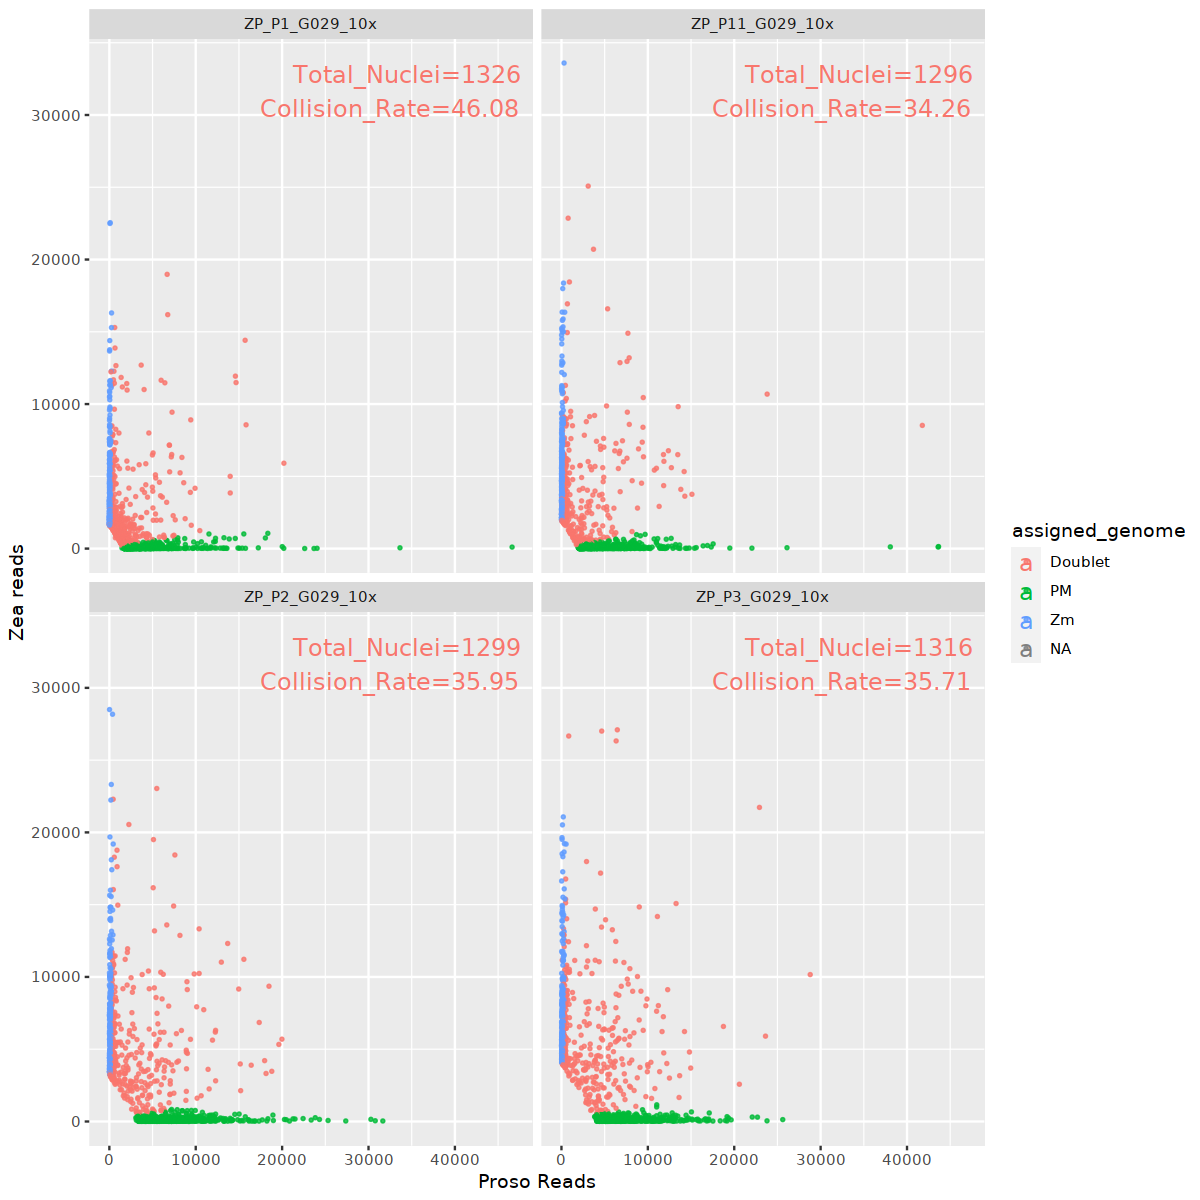

In [14]:
library(repr)
options(repr.plot.width=10, repr.plot.height=10)


ggplot(all_plates, aes(Pm,Zm, color = assigned_genome)) + geom_point(size = .5, alpha = .8) + 
    xlab("Proso Reads") + ylab("Zea reads") + facet_wrap(.~plate) + 
    geom_text(size = 5, data = final_text_box, 
              mapping = aes(x = Inf, y = Inf, label = test_solution), hjust   = 1.05, vjust   = 1.5)


Warning message:
"Groups with fewer than two data points have been dropped."


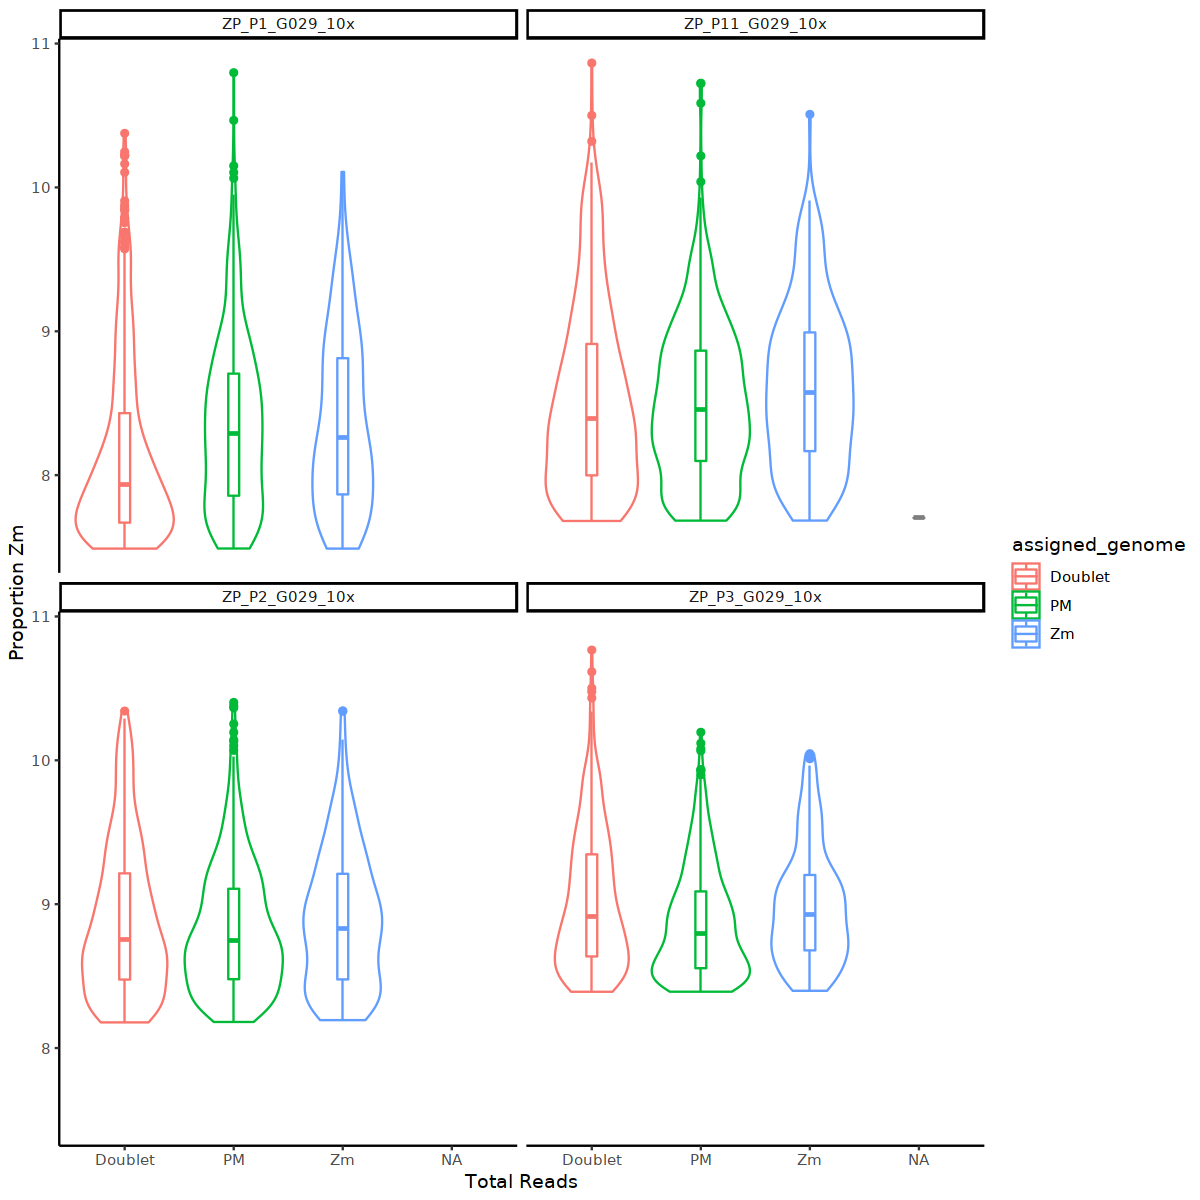

In [15]:
library(repr)
options(repr.plot.width=10, repr.plot.height=10)


ggplot(all_plates, aes(x = assigned_genome, y = log(total), color = assigned_genome)) +
  geom_violin() + xlab("Total Reads") + ylab("Proportion Zm") + facet_wrap(.~plate) +
  geom_boxplot(width=0.1) + theme_classic()


Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."


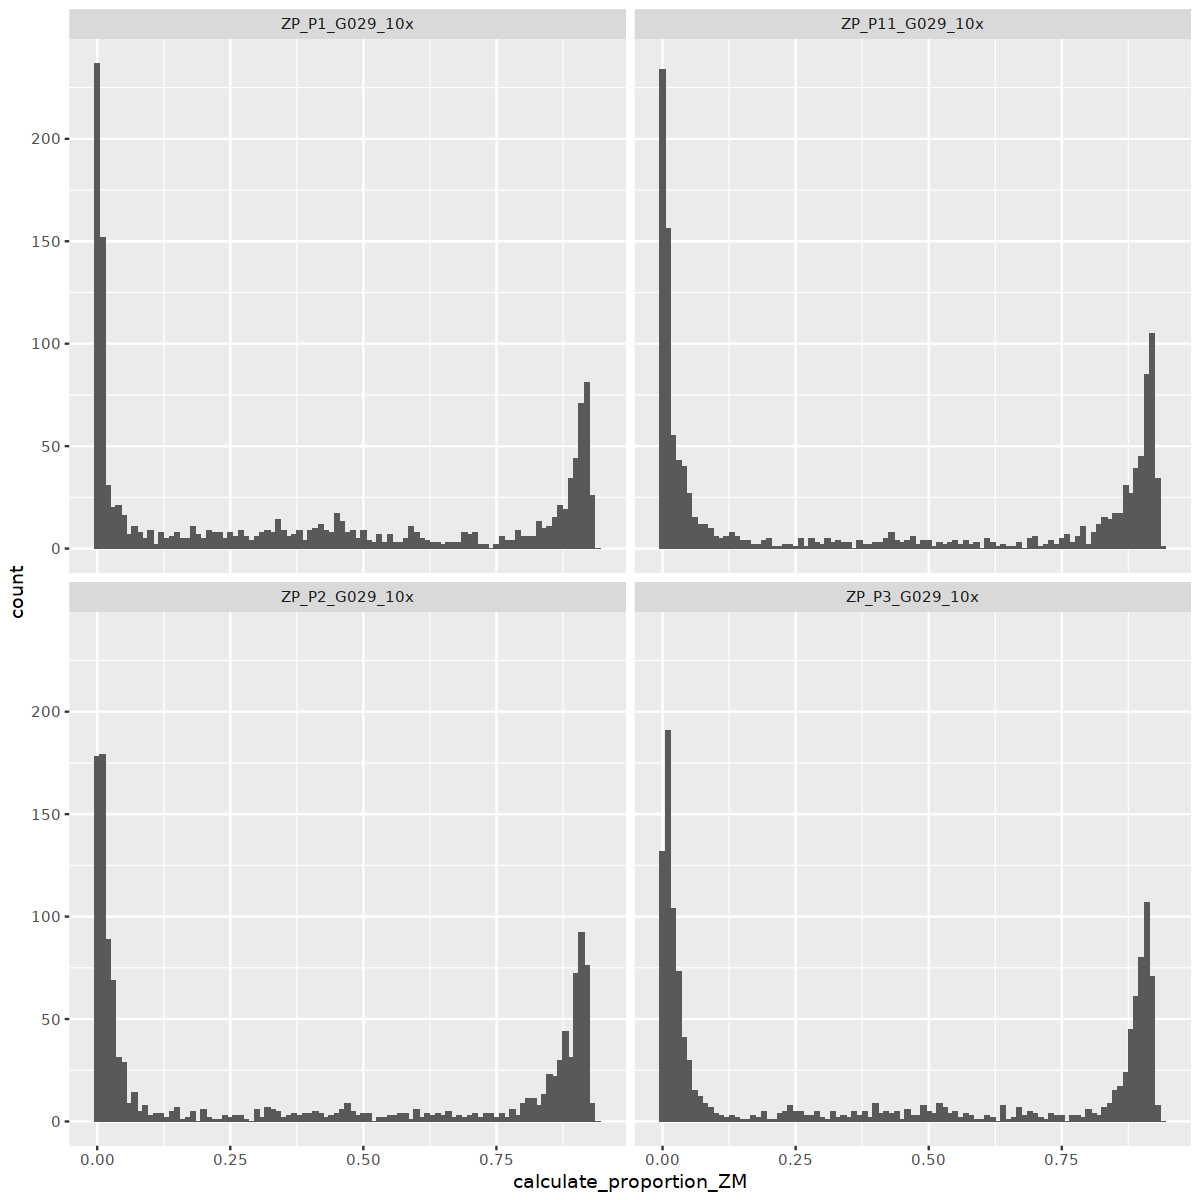

In [16]:
ggplot(all_plates, aes(calculate_proportion_ZM)) + geom_histogram(binwidth = .01) +
    facet_wrap(.~plate)

In [17]:
all_plates

cellID                                            total tss   acrs  ptmt
1    BC:Z:ACAGTGCTTGTATCGCGGTGAAAAGCTT-ZP_P1_G029_10x  48910 20586 34644 NA  
2    BC:Z:ACAGTGATGTCAGTATAGTTTCGAGCTT-ZP_P1_G029_10x  35121 15117 25931 NA  
3    BC:Z:ACAGTGAGTCAAGACTTGTGGCCTCATT-ZP_P1_G029_10x  32087 12455 24096 NA  
4    BC:Z:ACAGTGGGCTACGTAGTGTAGAGTCGGA-ZP_P1_G029_10x  28207 11679 22128 NA  
5    BC:Z:ACAGTGGGCTACCAAAAGTAGAGACCGG-ZP_P1_G029_10x  27595 11058 21132 NA  
6    BC:Z:ACAGTGTAGCTTGTAGTGTGGCCTCATT-ZP_P1_G029_10x  27579 10569 21142 NA  
7    BC:Z:ACAGTGTAGCTTATTCCGTAGAGACTAA-ZP_P1_G029_10x  27385 12018 21375 NA  
8    BC:Z:ACAGTGAGTCAAGTAGTATTCCTAGCTT-ZP_P1_G029_10x  25946 11035 20012 NA  
9    BC:Z:ACAGTGAGTTCCGTATAGTCCGCACTAA-ZP_P1_G029_10x  25589  8670 15044 NA  
10   BC:Z:ACAGTGAGTCAATCGCGGTGAAACGAGG-ZP_P1_G029_10x  24535  8850 19015 NA  
11   BC:Z:ACAGTGCCGTCCGACTTACTGATTCGGA-ZP_P1_G029_10x  24459  9189 18975 NA  
12   BC:Z:ACAGTGATGTCAAGCGACGTACGTCGGA-ZP_P1_G029_10x  24450  9976 17281 NA  
13   BC:Z:ACAGTGCTTGTACCGAGGTAGAGTCGGA-ZP_P1_G029_10x  24435  9003 20296 NA  
14   BC:Z:ACAGTGCTTGTAAGCGACGTACGACTAA-ZP_P1_G029_10x  23484 10385 18308 NA  
15   BC:Z:ACAGTGAGTCAATCGCGGTAGAGACTAA-ZP_P1_G029_10x  20996  8815 15548 NA  
16   BC:Z:ACAGTGCCGTCCAGCGAGTGAAAACTAA-ZP_P1_G029_10x  20942  8724 15474 NA  
17   BC:Z:ACAGTGAGTTCCGACTTGTGGCCTCATT-ZP_P1_G029_10x  20383  8635 14770 NA  
18   BC:Z:ACAGTGTAGCTTCTAAGGTAGAGTCATT-ZP_P1_G029_10x  20063  8813 15780 NA  
19   BC:Z:ACAGTGAGTCAAAGCGAACTGATTCGGA-ZP_P1_G029_10x  19892  8110 14030 NA  
20   BC:Z:ACAGTGCCGTCCCTAAGGTCCGCACCGG-ZP_P1_G029_10x  19495  7806 15221 NA  
21   BC:Z:ACAGTGGATCAGCATCTCAAAAGCGAGG-ZP_P1_G029_10x  19200  7756 15174 NA  
22   BC:Z:ACAGTGAGTTCCTGTCGATTCCTGCTCC-ZP_P1_G029_10x  18912  6924 13604 NA  
23   BC:Z:ACAGTGATGTCAAGCGAGTTTCGTCATT-ZP_P1_G029_10x  18818  7738 14389 NA  
24   BC:Z:ACAGTGGATCAGGTAGTCAAAAGACTAA-ZP_P1_G029_10x  18199  7823 13703 NA  
25   BC:Z:ACAGTGAGTTCCCTAAGGTTTCGTCATT-ZP_P1_G029_10x  18007  6460 14553 NA  
26   BC:Z:ACAGTGGATCAGCAATTCAAAAGGTTTC-ZP_P1_G029_10x  17815  7163 13283 NA  
27   BC:Z:ACAGTGAGTCAATGGATGTCCGCGCTCC-ZP_P1_G029_10x  17807  7116 14063 NA  
28   BC:Z:ACAGTGGATCAGCAAAACAAAAGTCATT-ZP_P1_G029_10x  17241  6655 13805 NA  
29   BC:Z:ACAGTGGATCAGGTAGTGTGGCCTCATT-ZP_P1_G029_10x  17198  7413 12604 NA  
30   BC:Z:ACAGTGGATCAGTTACTGTGGCCACTAA-ZP_P1_G029_10x  16749  6263 13809 NA  
⋮    ⋮                                                 ⋮     ⋮     ⋮     ⋮   
5208 BC:Z:TGACCAATGTCATAAGAGTTTCGACTAA-ZP_P11_G029_10x 2222   696  1015  NA  
5209 BC:Z:TGACCAAGTTCCTGTTTCAAAAGTTCCC-ZP_P11_G029_10x 2219   974  1765  NA  
5210 BC:Z:TGACCACCGTCCTCGCGATTCCTCGGTT-ZP_P11_G029_10x 2219   983  1675  NA  
5211 BC:Z:TGACCAGGCTACACCCCACTGATACTAA-ZP_P11_G029_10x 2215  1017  1737  NA  
5212 BC:Z:TGACCATAGCTTTGTCGCGTACGAGCTT-ZP_P11_G029_10x 2214   856  1751  NA  
5213 BC:Z:TGACCAATGTCATCGCGGAGTGGTCATT-ZP_P11_G029_10x 2214   785  1580  NA  
5214 BC:Z:TGACCAGGCTACTTACTGTCCGCACCGG-ZP_P11_G029_10x 2214   790  1544  NA  
5215 BC:Z:TGACCAGGCTACTAAGAGTGGCCCGGTT-ZP_P11_G029_10x 2213   877  1784  NA  
5216 BC:Z:TGACCAGGCTACCTAAGATGAGCGCTCC-ZP_P11_G029_10x 2213   736  1665  NA  
5217 BC:Z:TGACCAAGTCAAATTCCGTCCGCTTCCC-ZP_P11_G029_10x 2211   911  1572  NA  
5218 BC:Z:TGACCAAGTCAATCCCTACTGATCGGTT-ZP_P11_G029_10x 2204   969  1691  NA  
5219 BC:Z:TGACCAGATCAGGACTTCAAAAGACTAA-ZP_P11_G029_10x 2203   800  1386  NA  
5220 BC:Z:TGACCATAGCTTTGGATCGTACGTTCCC-ZP_P11_G029_10x 2200   835  1202  NA  
5221 BC:Z:TGACCAAGTCAAACTCGGAGTGGACTAA-ZP_P11_G029_10x 2199   796  1771  NA  
5222 BC:Z:TGACCATAGCTTTCGCGGTGGCCTTCCC-ZP_P11_G029_10x 2198   783  1387  NA  
5223 BC:Z:TGACCAGGCTACGTGAGCGTACGAGCTT-ZP_P11_G029_10x 2195   945  1542  NA  
5224 BC:Z:TGACCAGATCAGTCGCGCGTACGACTAA-ZP_P11_G029_10x 2188   963  1650  NA  
5225 BC:Z:TGACCATAGCTTGTGAGGGTAGCGCTCC-ZP_P11_G029_10x 2185   912  1697  NA  
5226 BC:Z:TGACCACCGTCCATTCCATTCCTCGGTT-ZP_P11_G029_10x 2185   889  1557  NA  
5227 BC:Z:TGACCAAGTTCCTAAGA

In [11]:
## Write Function to generate the above data PER plate

count_reads_per_chrom <- function(plate_name, Zm_chrom_list, Pm_chrom_list){
    
    plate_soc_obj <- readRDS(paste0(output_path,"QC_output/",plate_name, "_QC_soc_obj.rds"))
    plate_raw_obj <- readRDS(paste0(output_path,"QC_output/",plate_name, "_QC_obj.rds"))
    
    
    
    passing_cells <- plate_soc_obj$meta$cellID
    meta_values <- plate_soc_obj$meta
        
    #Read in Black List regions to remove
    Zm_black_list_regions <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_Proso/generate_black_list_between_genomes/Zm.aligned_reads_from.Pm.mpq30.bed"
    Pm_black_list_regions <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_Proso/generate_black_list_between_genomes/Pm.aligned_reads_from.Zm.mpq30.bed"

    Zm_black_list  <- read.table(file = Zm_black_list_regions, header = F)
    Pm_black_list  <- read.table(file = Pm_black_list_regions, header = F)
    
    #Generate the bed files from the current data
    bed_info <- (plate_raw_obj$bed)
    generate_bed_file <- data.frame(bed_info)

    
    
    #Remove the regions which are able to be mapped between both genomes.
    removed_zea_black_list <- bedtoolsr::bt.intersect(generate_bed_file, Zm_black_list, v = TRUE, wa = TRUE)
    removed_zea_removed_pm_blacklist <- bedtoolsr::bt.intersect(removed_zea_black_list, Pm_black_list, v = TRUE, wa = TRUE)

    
    
    test_final <- removed_zea_removed_pm_blacklist %>% 
        group_by(V1, V4) %>% 
        summarize(total_count_per_chr = n())
    
    step_2 <- test_final %>% 
        ungroup() %>%
        group_by(V4)%>% 
        mutate(genome_ID = case_when(V1 %in% Pm_chrom_list ~ "Pm",
                                V1 %in% Zm_chrom_list ~ "Zm", 
                                TRUE ~ "WRONG"))
    
    step_3 <- step_2 %>% 
        ungroup()  %>% 
        group_by(V4, genome_ID)
    
    return(step_3)
    
}




#plate_ZP_P2_G029_10x_info <- count_reads_per_genomes("ZP_P2_G029_10x", maize_chromosome_list, proso_millet_chromosome_list)
#plate_ZP_P3_G029_10x <- count_reads_per_genomes("ZP_P3_G029_10x", maize_chromosome_list, proso_millet_chromosome_list)
#plate_ZP_P11_G029_10x <- count_reads_per_genomes("ZP_P11_G029_10x", maize_chromosome_list, proso_millet_chromosome_list)

In [12]:
plate_ZP_P1_G029_10x_info_reads_per_chrom <- count_reads_per_chrom("ZP_P1_G029_10x", maize_chromosome_list, proso_millet_chromosome_list)
plate_ZP_P2_G029_10x_info_reads_per_chrom <- count_reads_per_chrom("ZP_P2_G029_10x", maize_chromosome_list, proso_millet_chromosome_list)
plate_ZP_P3_G029_10x_info_reads_per_chrom <- count_reads_per_chrom("ZP_P3_G029_10x", maize_chromosome_list, proso_millet_chromosome_list)
plate_ZP_P11_G029_10x_info_reads_per_chrom <- count_reads_per_chrom("ZP_P11_G029_10x", maize_chromosome_list, proso_millet_chromosome_list)

`summarise()` has grouped output by 'V1'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'V1'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'V1'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'V1'. You can override using the `.groups` argument.



In [13]:
bound_chrom_count <- bind_rows(plate_ZP_P2_G029_10x_info_reads_per_chrom, plate_ZP_P1_G029_10x_info_reads_per_chrom, 
         plate_ZP_P3_G029_10x_info_reads_per_chrom, plate_ZP_P11_G029_10x_info_reads_per_chrom)

In [14]:
chrom_size_scaffolds <- list("chr1","chr2","chr3","chr4","chr5","chr6","chr7","chr8","chr9","chr10","CM009699.2","CM009700.2","CM009701.2","CM009702.2","CM009703.2","CM009704.2","CM009705.2","CM009706.2","CM009707.2","CM009690.2","CM009691.2","CM009692.2","CM009693.2","CM009694.2","CM009695.2","CM009696.2","CM009697.2","CM009698.2","CM009689.1")


bound_chrom_count_filtered <- bound_chrom_count  %>% 
    filter(V1 %in% chrom_size_scaffolds)
head(bound_chrom_count_filtered)


V1   V4                                               total_count_per_chr
1 chr1 BC:Z:GCCAATAGTCAAAAACAACTGATACCGG-ZP_P2_G029_10x 12                 
2 chr1 BC:Z:GCCAATAGTCAAAAACAACTGATACTAA-ZP_P2_G029_10x 30                 
3 chr1 BC:Z:GCCAATAGTCAAAAACAACTGATAGCTT-ZP_P2_G029_10x 19                 
4 chr1 BC:Z:GCCAATAGTCAAAAACAACTGATCGAGG-ZP_P2_G029_10x 16                 
5 chr1 BC:Z:GCCAATAGTCAAAAACAACTGATCGGTT-ZP_P2_G029_10x  4                 
6 chr1 BC:Z:GCCAATAGTCAAAAACAACTGATGATGA-ZP_P2_G029_10x  5                 
  genome_ID
1 Zm       
2 Zm       
3 Zm       
4 Zm       
5 Zm       
6 Zm

In [21]:
filtered_meta_down <- all_plates %>% 
    dplyr::select(assigned_genome, plate, cellID, Pm, Zm, calculate_proportion_ZM)
head(filtered_meta_down)

assigned_genome plate         
1 Pm              ZP_P1_G029_10x
2 Pm              ZP_P1_G029_10x
3 Doublet         ZP_P1_G029_10x
4 Doublet         ZP_P1_G029_10x
5 Doublet         ZP_P1_G029_10x
6 Doublet         ZP_P1_G029_10x
  cellID                                           Pm    Zm   
1 BC:Z:ACAGTGCTTGTATCGCGGTGAAAAGCTT-ZP_P1_G029_10x 46620   105
2 BC:Z:ACAGTGATGTCAGTATAGTTTCGAGCTT-ZP_P1_G029_10x 33642    55
3 BC:Z:ACAGTGAGTCAAGACTTGTGGCCTCATT-ZP_P1_G029_10x 15718 14413
4 BC:Z:ACAGTGGGCTACGTAGTGTAGAGTCGGA-ZP_P1_G029_10x 14592 11932
5 BC:Z:ACAGTGGGCTACCAAAAGTAGAGACCGG-ZP_P1_G029_10x 14668 11487
6 BC:Z:ACAGTGTAGCTTGTAGTGTGGCCTCATT-ZP_P1_G029_10x  6692 18975
  calculate_proportion_ZM
1 0.002146800            
2 0.001566015            
3 0.449185028            
4 0.423015564            
5 0.416271064            
6 0.688023496

In [23]:

final_graphing_per_chrom <- left_join(bound_chrom_count_filtered, filtered_meta_down, by = c("V4" = "cellID"))
head(final_graphing_per_chrom)

V1   V4                                               total_count_per_chr
1 chr1 BC:Z:GCCAATAGTCAAAAACAACTGATACCGG-ZP_P2_G029_10x 12                 
2 chr1 BC:Z:GCCAATAGTCAAAAACAACTGATACTAA-ZP_P2_G029_10x 30                 
3 chr1 BC:Z:GCCAATAGTCAAAAACAACTGATAGCTT-ZP_P2_G029_10x 19                 
4 chr1 BC:Z:GCCAATAGTCAAAAACAACTGATCGAGG-ZP_P2_G029_10x 16                 
5 chr1 BC:Z:GCCAATAGTCAAAAACAACTGATCGGTT-ZP_P2_G029_10x  4                 
6 chr1 BC:Z:GCCAATAGTCAAAAACAACTGATGATGA-ZP_P2_G029_10x  5                 
  genome_ID assigned_genome plate Pm Zm calculate_proportion_ZM
1 Zm        NA              NA    NA NA NA                     
2 Zm        NA              NA    NA NA NA                     
3 Zm        NA              NA    NA NA NA                     
4 Zm        NA              NA    NA NA NA                     
5 Zm        NA              NA    NA NA NA                     
6 Zm        NA              NA    NA NA NA

## Sandbox Mode: How to generate convincing coverage plots per plate

In [23]:
ZP_P2_G029_10x_plate_soc_obj <- readRDS(paste0(output_path,"QC_output/","ZP_P2_G029_10x", "_QC_soc_obj.rds"))
ZP_P2_G029_10x_plate_raw_obj <- readRDS(paste0(output_path,"QC_output/","ZP_P2_G029_10x", "_QC_obj.rds"))
    
    
passing_cells <- ZP_P2_G029_10x_plate_soc_obj$meta$cellID
meta_values <- ZP_P2_G029_10x_plate_soc_obj$meta
        
bed_info <- (ZP_P2_G029_10x_plate_raw_obj$bed)  %>% 
        filter(V1 != "CM009689.1")

In [24]:
test_final <- bed_info

bed_info <- (ZP_P2_G029_10x_plate_raw_obj$bed)
step_2 <- test_final %>% 
    filter(V4 %in% passing_cells)  %>% 
    group_by(V4)%>% 
    mutate(genome_ID = case_when(V1 %in% proso_millet_chromosome_list ~ "Pm",
                                V1 %in% maize_chromosome_list ~ "Zm", 
                                TRUE ~ "WRONG"))
    


In [25]:
bed_file_inegration <- left_join(step_2, filtered_meta_down, by = c("V4" = "cellID")) 

finalized_bed_passing <- bed_file_inegration  %>% 
    filter(is.na(assigned_genome) == FALSE)  %>% 
    filter(V1 %in% chrom_size_scaffolds)


ERROR: Error in is.data.frame(y): object 'filtered_meta_down' not found


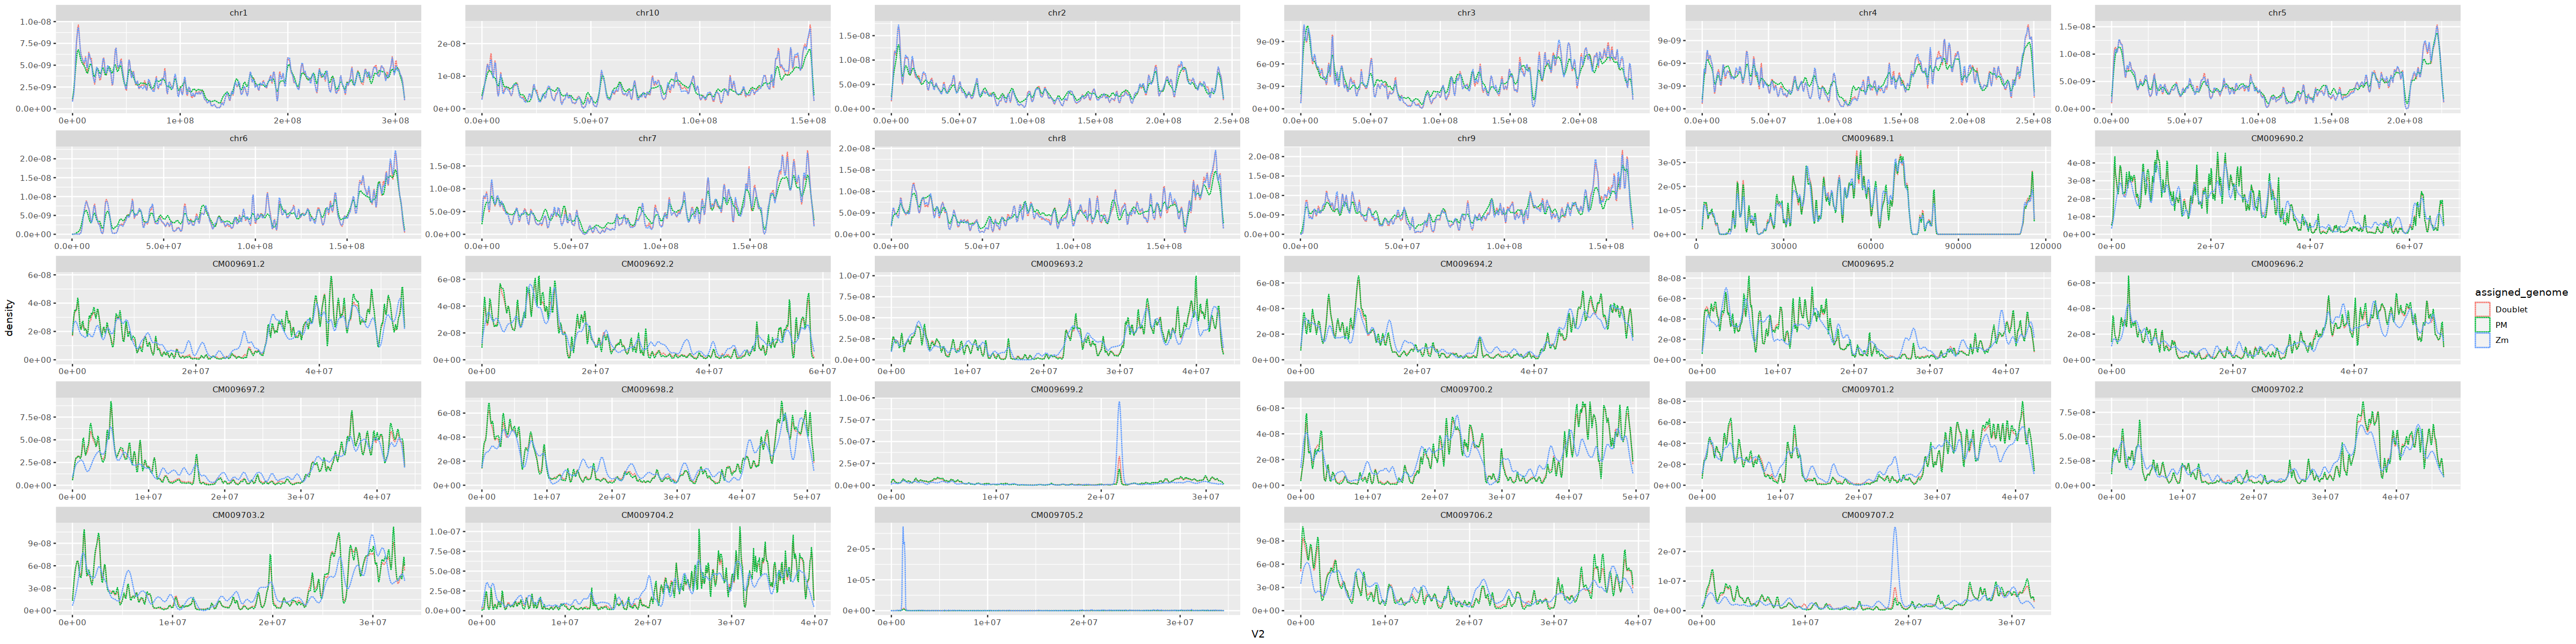

In [31]:
library(repr)
options(repr.plot.width=40, repr.plot.height=10)



ggplot(finalized_bed_passing, aes(x=V2, color = assigned_genome)) + 
    geom_density(adjust = .1, linetype ="dotted") + facet_wrap(.~V1, scales="free")


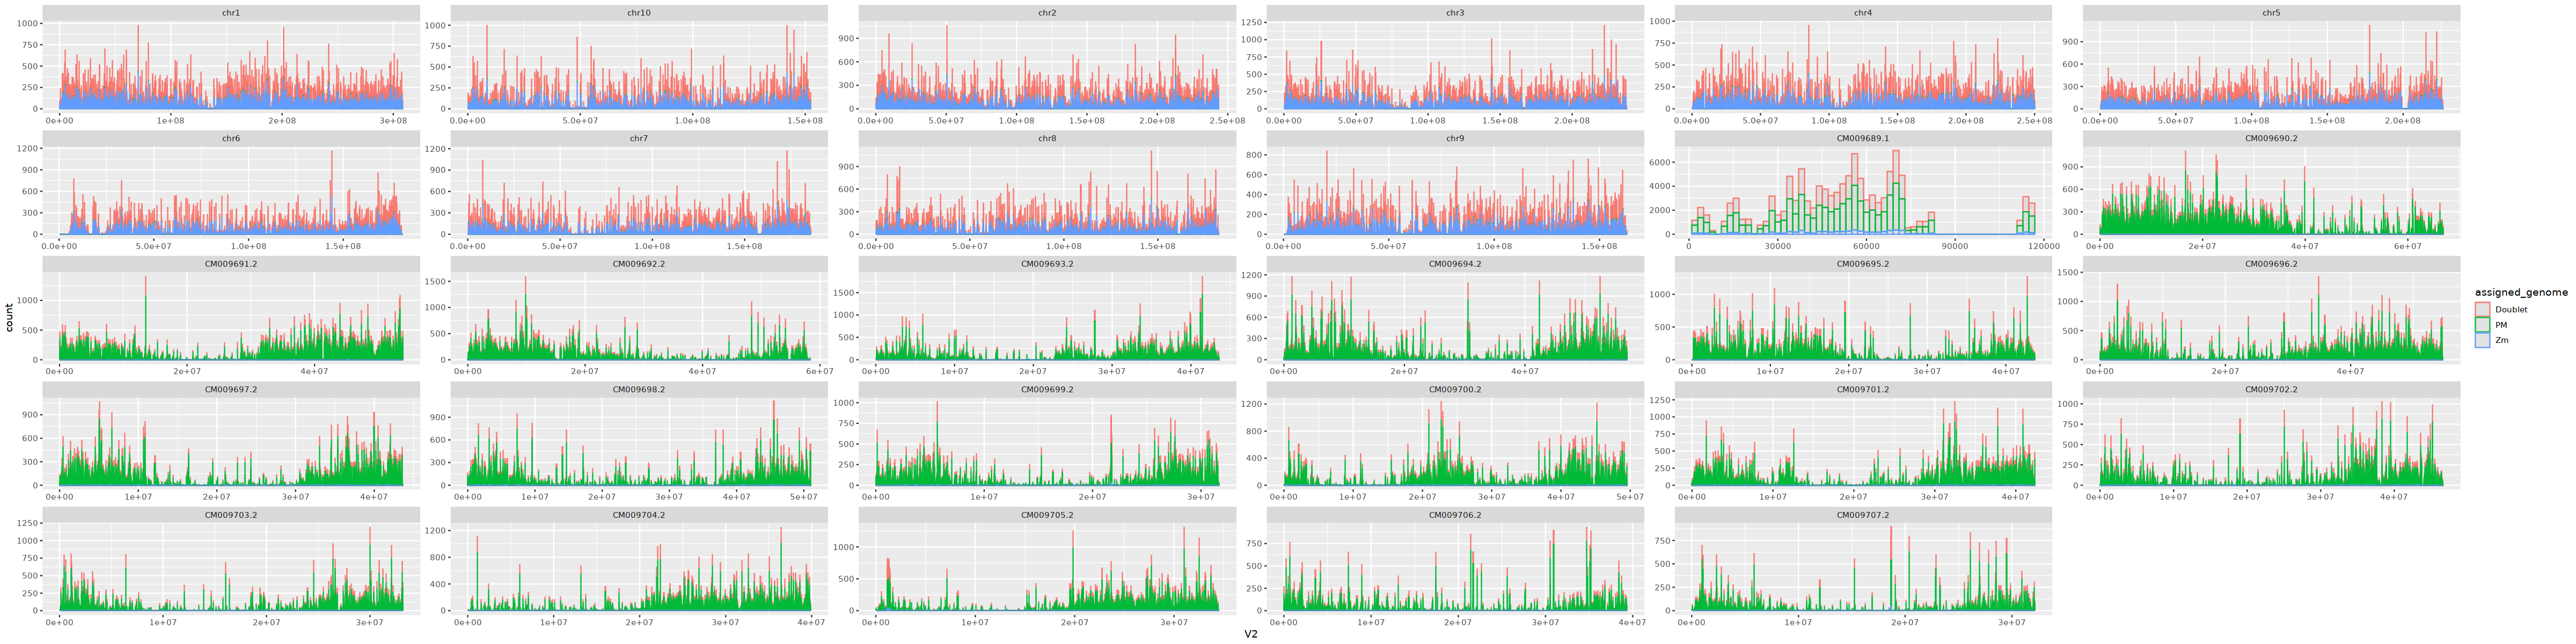

In [32]:
options(repr.plot.width=40, repr.plot.height=10)

ggplot(finalized_bed_passing, aes(x=V2, color = assigned_genome)) + 
    geom_histogram(binwidth=2000, alpha = .1) + facet_wrap(.~V1, scales="free")



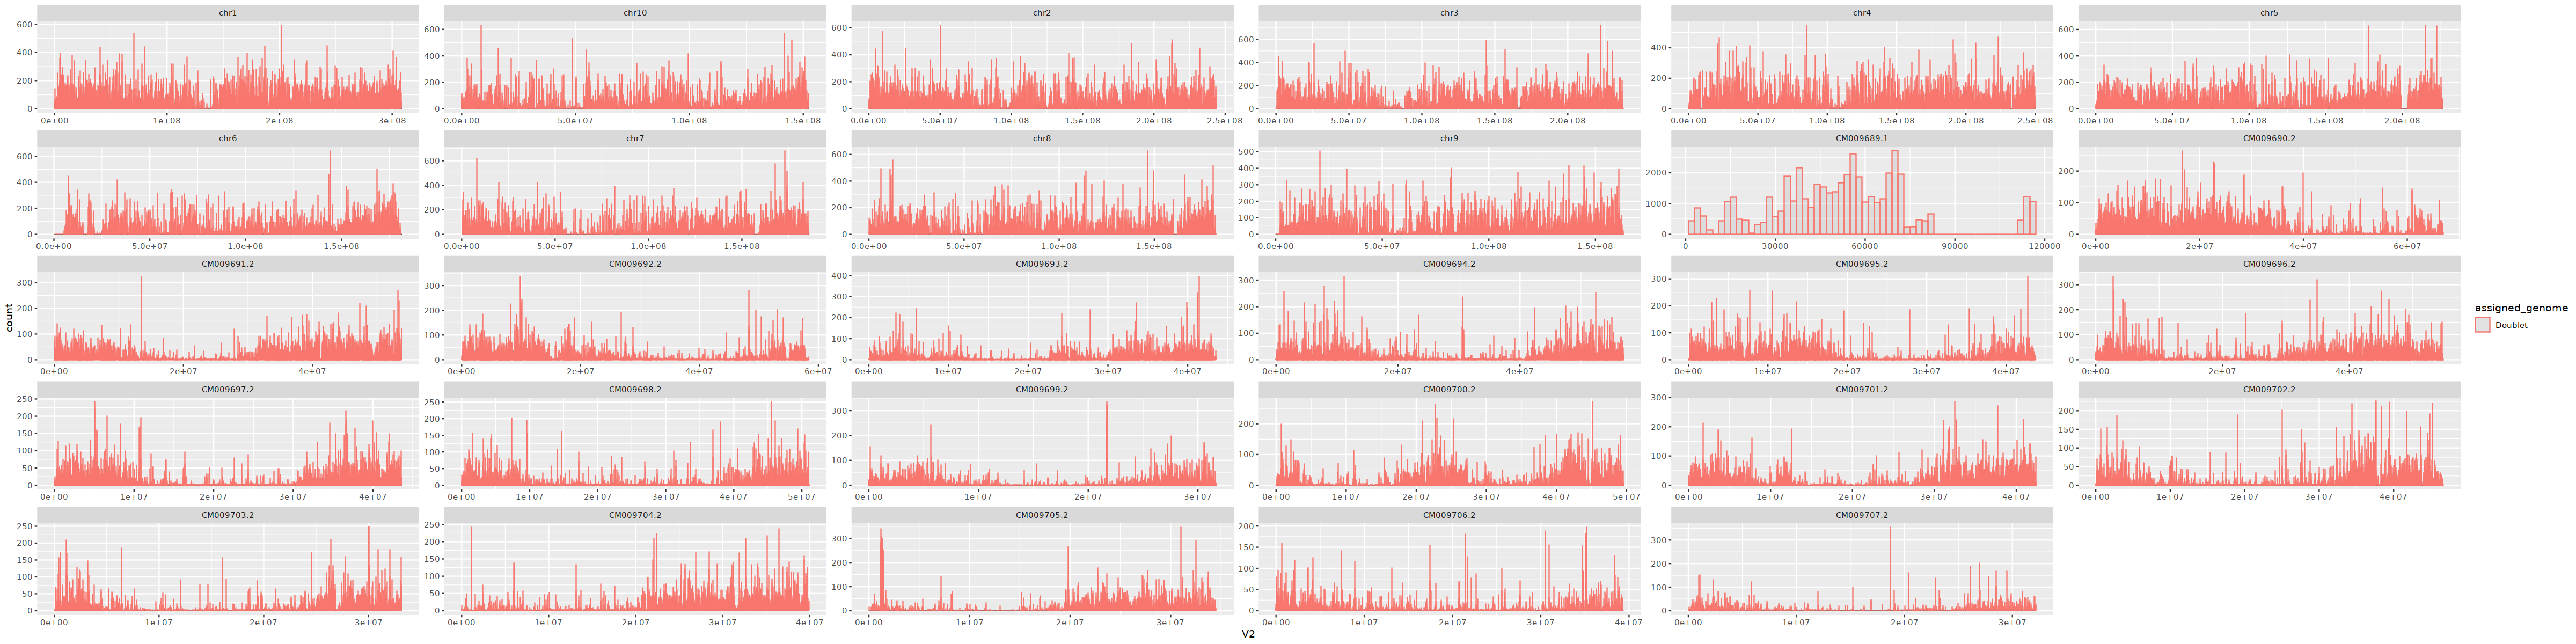

In [33]:
finalized_bed_passing  %>% 
    filter(assigned_genome == "Doublet") %>%     
    ggplot(., aes(x=V2, color = assigned_genome)) + 
    geom_histogram(binwidth=2000, alpha = .1) + facet_wrap(.~V1, scales="free")



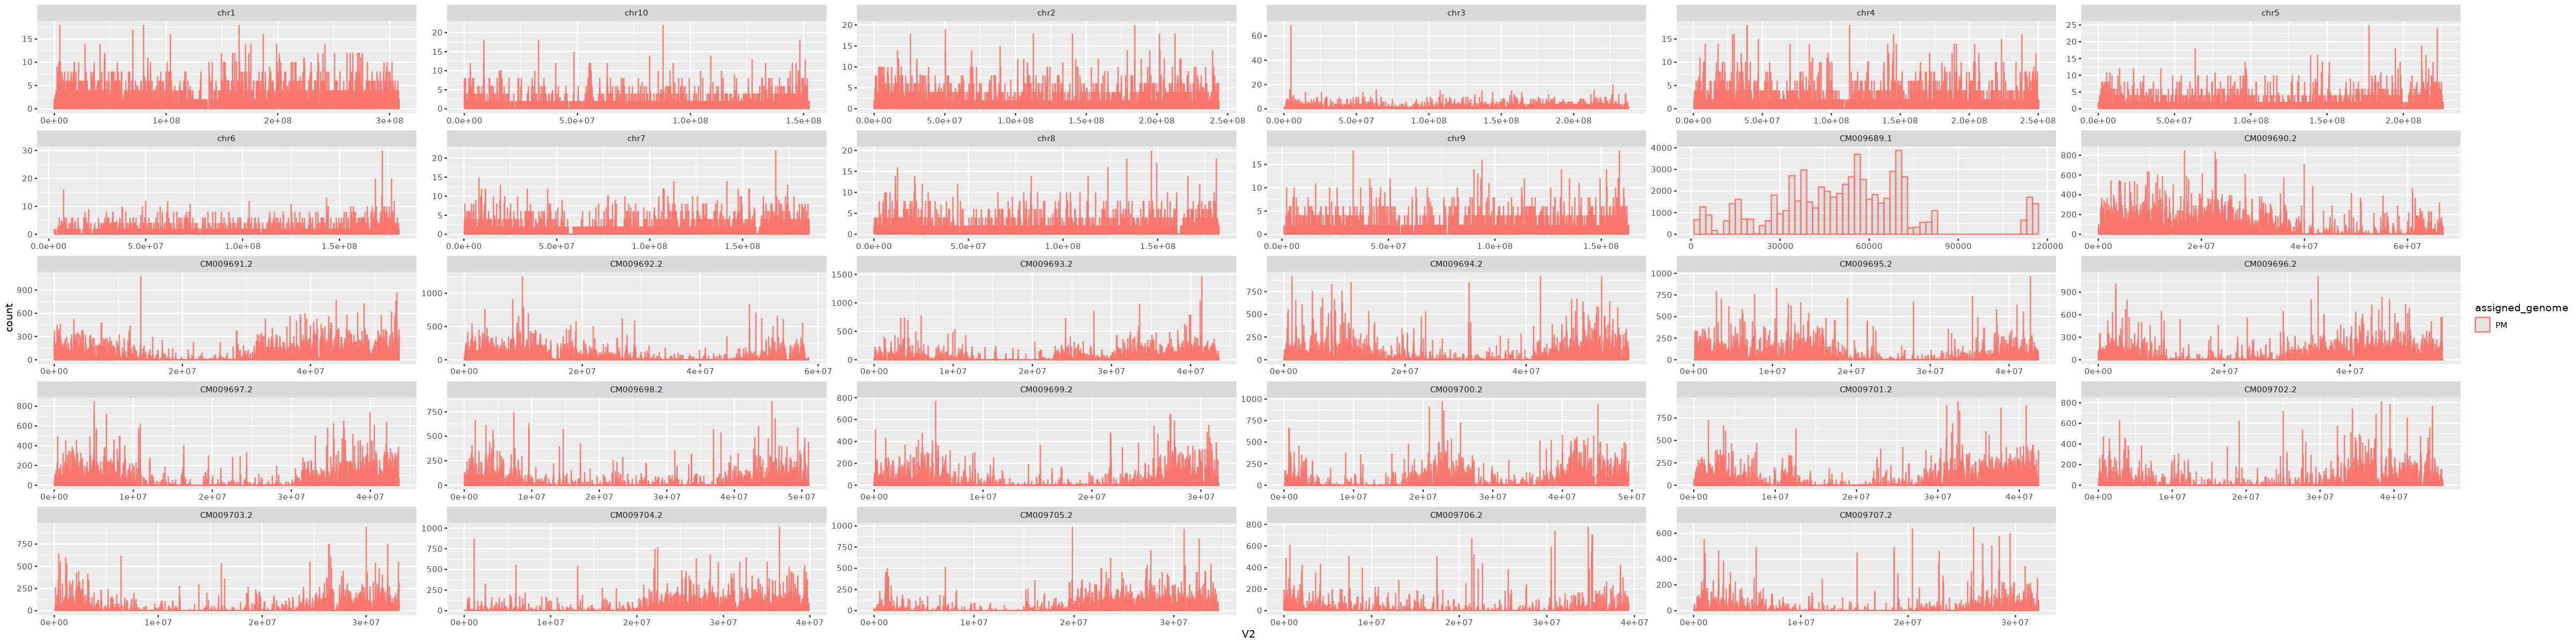

In [34]:
finalized_bed_passing  %>% 
    filter(assigned_genome == "PM") %>%     
    ggplot(., aes(x=V2, color = assigned_genome)) + 
    geom_histogram(binwidth=2000, alpha = .1) + facet_wrap(.~V1, scales="free")



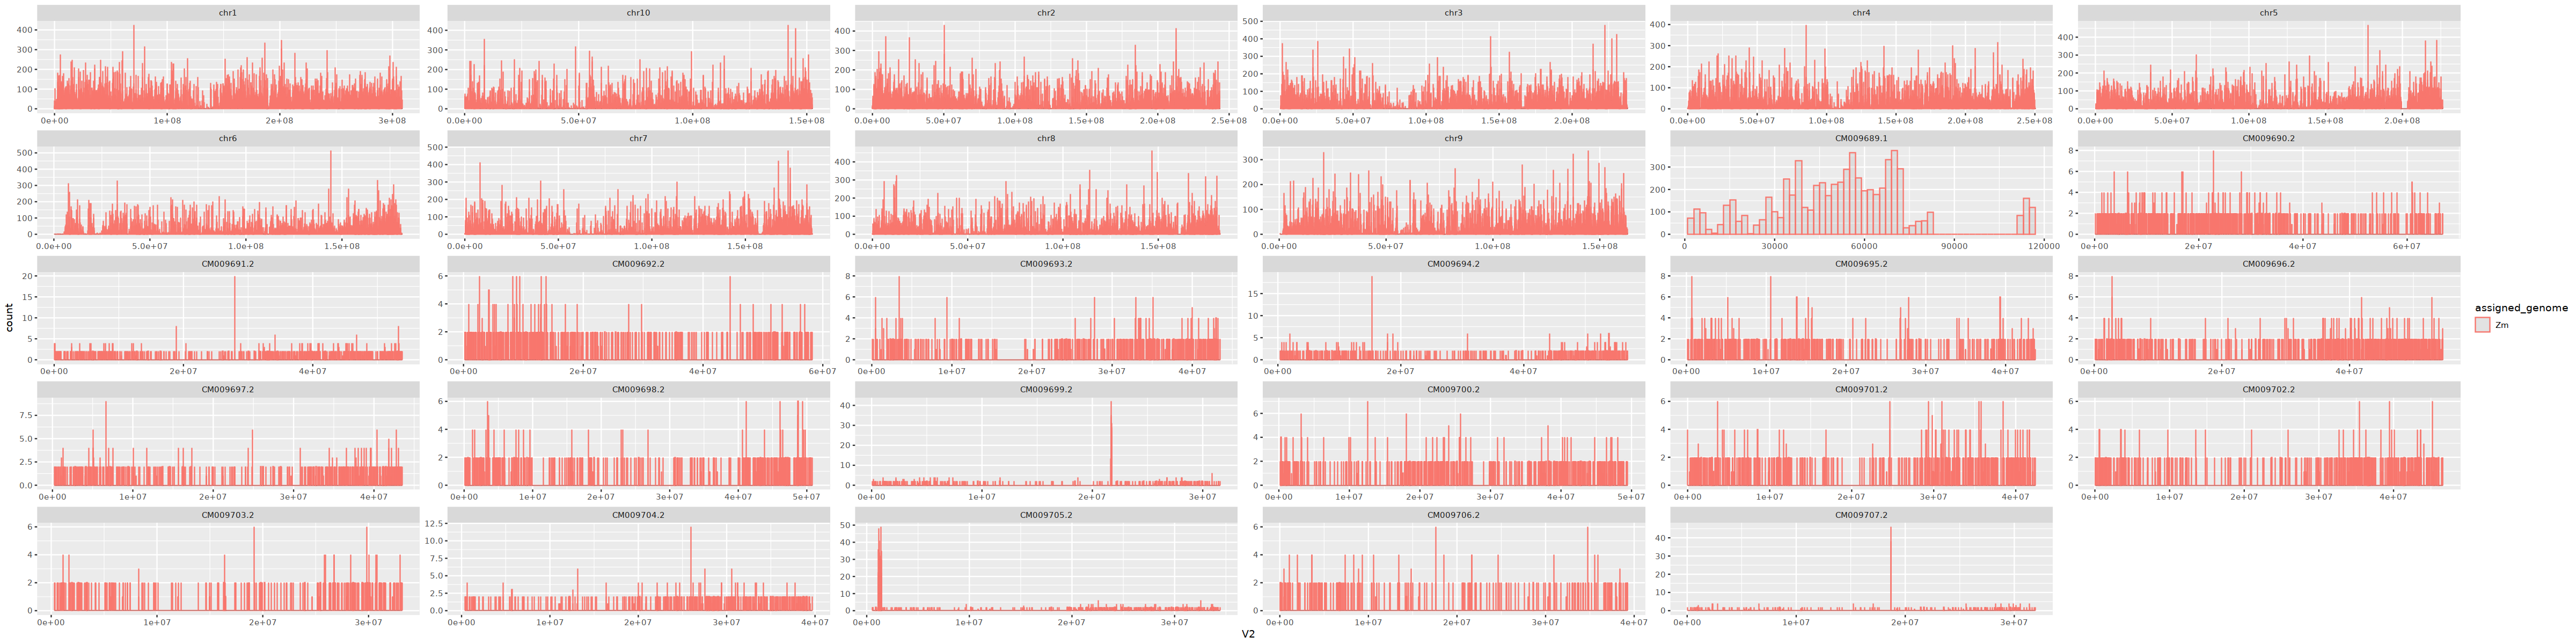

In [35]:
finalized_bed_passing  %>% 
    filter(assigned_genome == "Zm") %>%     
    ggplot(., aes(x=V2, color = assigned_genome)) + 
    geom_histogram(binwidth=2000, alpha = .1) + facet_wrap(.~V1, scales="free")



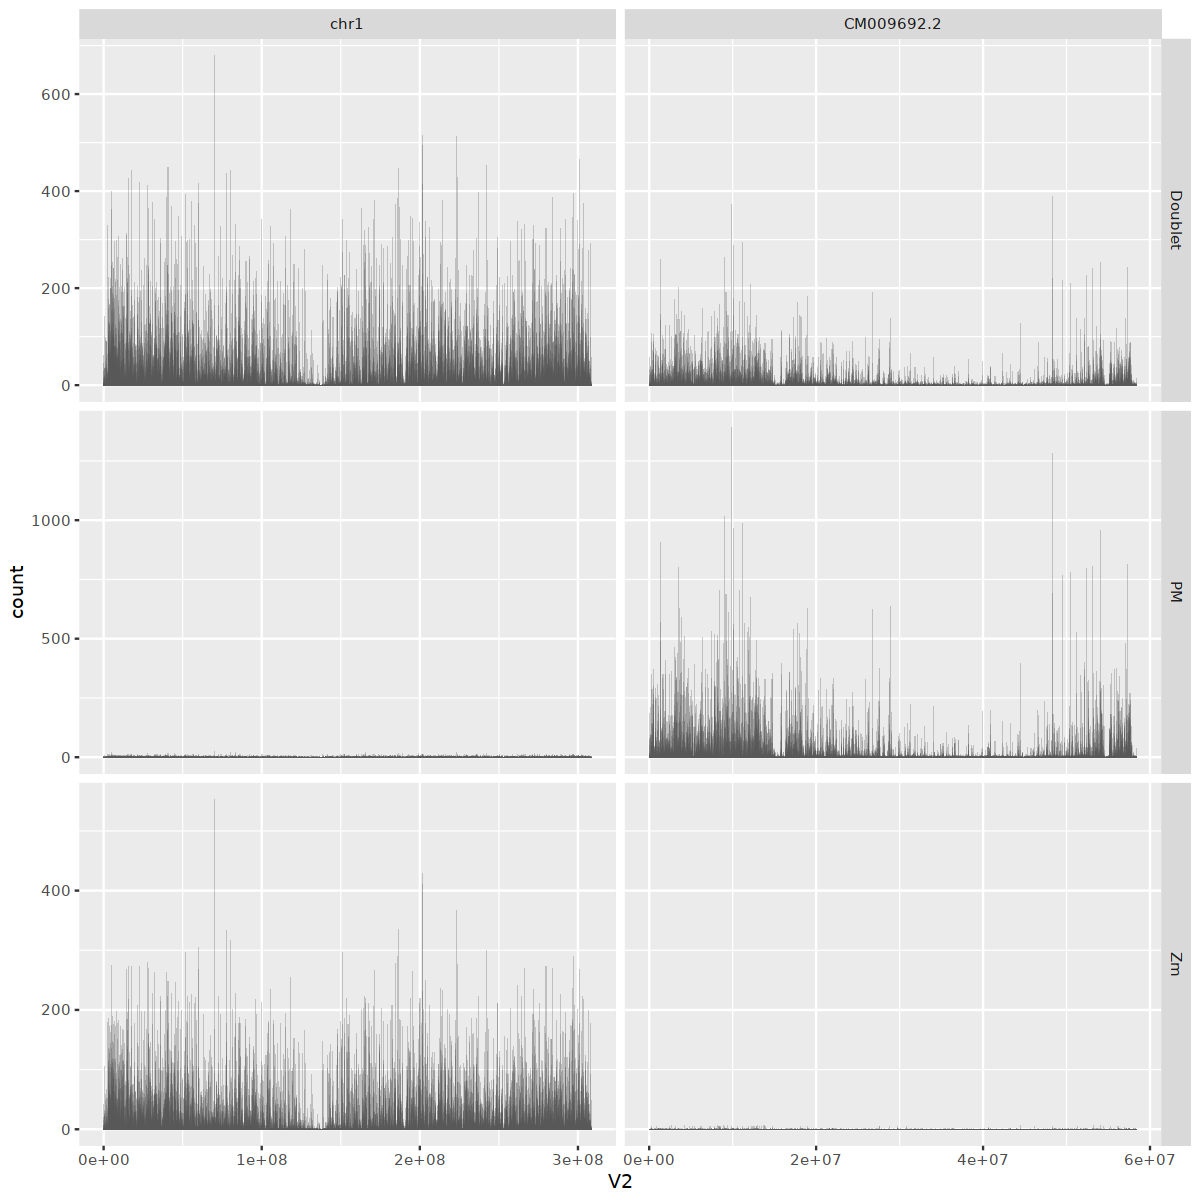

In [36]:
options(repr.plot.width=10, repr.plot.height=10)
only_biggest <- list("chr1","CM009692.2")
graphing_only_biggest_chrom <- bed_file_inegration  %>% 
    filter(is.na(assigned_genome) == FALSE)  %>% 
    filter(V1 %in% only_biggest)


ggplot(graphing_only_biggest_chrom, aes(x=V2)) + 
    geom_histogram(binwidth=5000, linetype ="dotted", alpha = .3) + 
    facet_grid(assigned_genome~V1, scales="free")



In [37]:
only_biggest <- list("chr1","CM009692.2")
graphing_only_biggest_chrom <- bed_file_inegration  %>% 
    filter(is.na(assigned_genome) == FALSE)  %>% 
    filter(V1 %in% only_biggest)


only_doublets <- filter(graphing_only_biggest_chrom, assigned_genome == "Doublet")
take_only_barcodes <- unique(only_doublets$V4)
take_random_20 <- sample(take_only_barcodes, 3)



graphing_only_biggest_chrom %>%  
    filter(V4 %in% take_random_20) %>% 
    ggplot(., aes(x=V2)) + 
    geom_histogram(binwidth=5000, linetype ="dotted", alpha = .3) + 
    facet_grid(assigned_genome~V1, scales="free")



In [ ]:

finalized_bed_passing %>%  
    filter(V4 %in% take_random_20) %>% 
    ggplot(., aes(x=V2)) + 
    geom_histogram(binwidth=5000, linetype ="dotted", alpha = .3) + 
    facet_grid(.~V1, scales="free")


In [ ]:
finalized_bed_passing  %>% 
    filter(V4 %in% take_random_20)  %>% 
    group_by(V1, V4)

In [ ]:
str(ZP_P2_G029_10x_plate_soc_obj)

In [ ]:
str(ZP_P2_G029_10x_plate_raw_obj)

In [ ]:
options(repr.plot.width=40, repr.plot.height=10)

ggplot(finalized_bed_passing, aes(x=V2, color = assigned_genome)) + 
    geom_histogram(binwidth=2000, alpha = .1) + facet_wrap(.~V1, scales="free")



## Per Genome FrIP Scores

In [27]:
grabbed_acrs <- ZP_P2_G029_10x_plate_raw_obj$acr
zm_acrs <- filter(grabbed_acrs, V1 %in% maize_chromosome_list)
pm_acrs <- filter(grabbed_acrs, V1 %in% proso_millet_chromosome_list)


In [19]:
head(pm_acrs)

V1         V2   V3   V4                V5   V6 V7      V8       V9       V10
1 CM009689.1 2283 3854 bulk_peaks_peak_1 3080 .  4.92182 312.8730 308.0980 325
2 CM009689.1 4275 4650 bulk_peaks_peak_2 1644 .  3.66659 168.2800 164.4540 200
3 CM009689.1 4830 5052 bulk_peaks_peak_3  603 .  2.48293  63.2998  60.3230 118
4 CM009689.1 5139 5546 bulk_peaks_peak_4 3059 .  4.90423 310.7220 305.9600 258
5 CM009689.1 5711 5914 bulk_peaks_peak_5  353 .  2.09844  38.0157  35.3578  97
6 CM009689.1 5958 6259 bulk_peaks_peak_6 1367 .  3.38387 140.3350 136.7050 139

In [28]:
intersection_peaks_per_nucleir_zm <- bedtoolsr::bt.intersect(zm_acrs, step_2, wa= TRUE, wb  = TRUE)
intersection_peaks_per_nucleir_pm <- bedtoolsr::bt.intersect(pm_acrs, step_2, wa= TRUE, wb  = TRUE)

collapsed_per_genome_insertions_zm <- intersection_peaks_per_nucleir_zm  %>% 
    group_by(V14, V16) %>% 
    summarise(insertions_per_peak_per_genome = n())

collapsed_per_genome_insertions_pm <- intersection_peaks_per_nucleir_pm  %>% 
    group_by(V14, V16) %>% 
    summarise(insertions_per_peak_per_genome = n())

`summarise()` has grouped output by 'V14'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'V14'. You can override using the `.groups` argument.



In [29]:
collapsed_per_genome_insertions <- bind_rows(collapsed_per_genome_insertions_pm, collapsed_per_genome_insertions_zm)

In [28]:
length(unique(collapsed_per_genome_insertions$V14))

[1] 1299

In [30]:
counts_per_neclei <- step_2  %>% 
    group_by(V4) %>% 
    summarise(total_insertions = n())


In [142]:
head(collapsed_per_genome_insertions)

V14                                              V16
1 BC:Z:GCCAATAGTCAAAAACAATTCCTACTAA-ZP_P2_G029_10x Pm 
2 BC:Z:GCCAATAGTCAAAAACACAAAAGACCGG-ZP_P2_G029_10x Pm 
3 BC:Z:GCCAATAGTCAAAAACACGTACGAGCTT-ZP_P2_G029_10x Pm 
4 BC:Z:GCCAATAGTCAAAAACAGTAGAGCGAGG-ZP_P2_G029_10x Pm 
5 BC:Z:GCCAATAGTCAAAAACAGTAGAGTCATT-ZP_P2_G029_10x Pm 
6 BC:Z:GCCAATAGTCAAAAACAGTCCGCTCATT-ZP_P2_G029_10x Pm 
  insertions_per_peak_per_genome
1 4671                          
2 2662                          
3   34                          
4   78                          
5 2778                          
6  275

In [31]:
merged_total_counts_per_nuclei_insertions <- left_join(counts_per_neclei, collapsed_per_genome_insertions, by =c("V4" = "V14"))

In [32]:
final_combined_per_genome_frip <- merged_total_counts_per_nuclei_insertions  %>% 
    filter(V4 %in% ZP_P2_G029_10x_plate_soc_obj$meta$cellID) %>% 
    rowwise()  %>% 
    mutate(per_genome_frip = insertions_per_peak_per_genome/total_insertions)  %>% 
    ungroup()  %>% 
    left_join(., filtered_meta_down, by = c("V4" = "cellID"))

ERROR: Error in is.data.frame(y): object 'filtered_meta_down' not found


In [32]:
head(final_combined_per_genome_frip)

V4                                               total_insertions V16
1 BC:Z:GCCAATAGTCAAAAACAATTCCTACTAA-ZP_P2_G029_10x 8557             Pm 
2 BC:Z:GCCAATAGTCAAAAACAATTCCTACTAA-ZP_P2_G029_10x 8557             Zm 
3 BC:Z:GCCAATAGTCAAAAACACAAAAGACCGG-ZP_P2_G029_10x 6588             Pm 
4 BC:Z:GCCAATAGTCAAAAACACAAAAGACCGG-ZP_P2_G029_10x 6588             Zm 
5 BC:Z:GCCAATAGTCAAAAACACGTACGAGCTT-ZP_P2_G029_10x 7112             Pm 
6 BC:Z:GCCAATAGTCAAAAACACGTACGAGCTT-ZP_P2_G029_10x 7112             Zm 
  insertions_per_peak_per_genome per_genome_frip assigned_genome plate         
1 4671                           0.545868879     Doublet         ZP_P2_G029_10x
2 1606                           0.187682599     Doublet         ZP_P2_G029_10x
3 2662                           0.404068002     Doublet         ZP_P2_G029_10x
4 1648                           0.250151791     Doublet         ZP_P2_G029_10x
5   34                           0.004780652     Zm              ZP_P2_G029_10x
6 5300                           0.745219348     Zm              ZP_P2_G029_10x
  Pm   Zm   calculate_proportion_ZM
1 5777 2025 0.2366484              
2 5777 2025 0.2366484              
3 3139 3031 0.4600789              
4 3139 3031 0.4600789              
5   57 6472 0.9100112              
6   57 6472 0.9100112

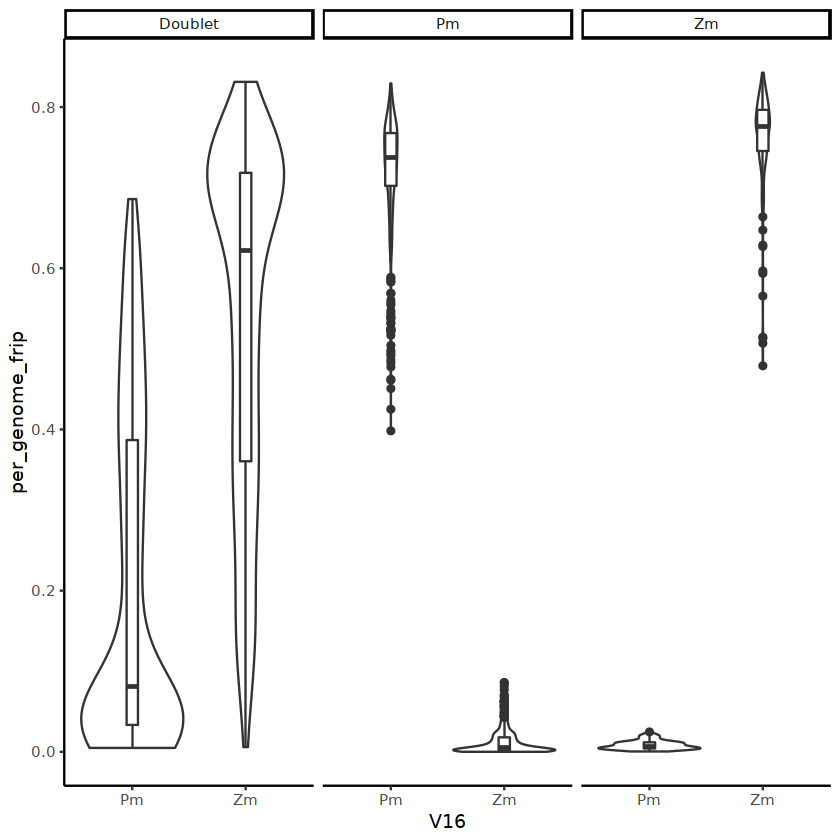

In [33]:
ggplot(final_combined_per_genome_frip, aes(x = V16, y = per_genome_frip)) +
       geom_violin() + facet_grid(.~assigned_genome) +
       geom_boxplot(width=0.1) + theme_classic()

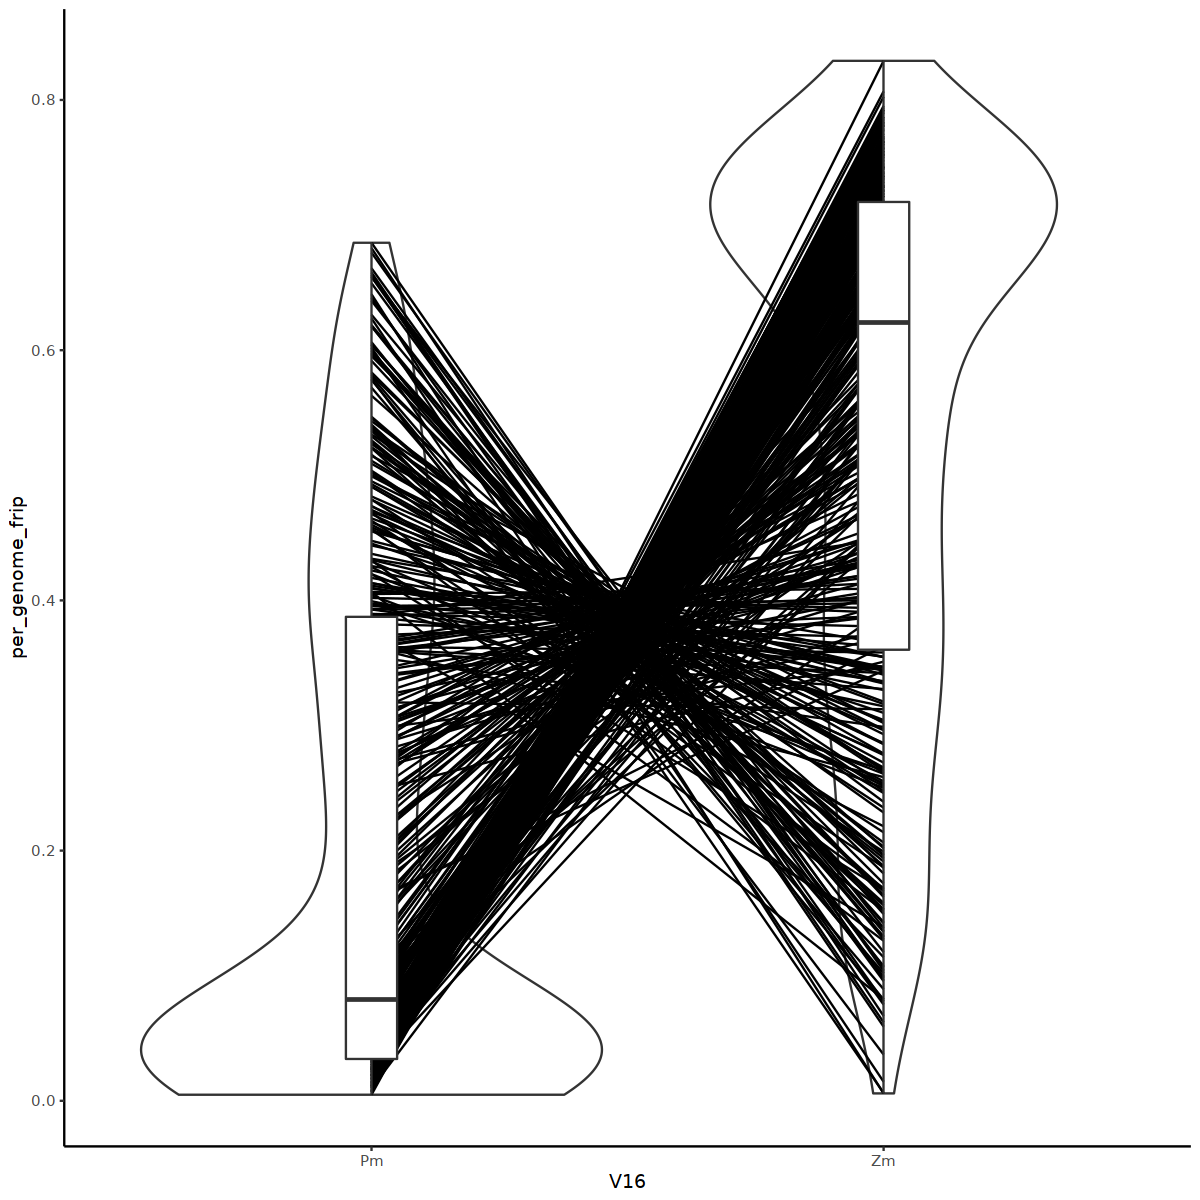

In [34]:
options(repr.plot.width=10, repr.plot.height=10)
final_combined_per_genome_frip  %>% 
    filter(assigned_genome == "Doublet")  %>% 
    ggplot(., aes(x = V16, y = per_genome_frip)) +
    geom_violin() + 
    geom_line(aes(group=V4)) + geom_boxplot(width=0.1) + theme_classic()

In [ ]:
final_combined_per_genome_frip_fixed_pm <- final_combined_per_genome_frip %>% 
  mutate_at("assigned_genome", str_replace, "PM", "Pm")


grabbed_bounds <- final_combined_per_genome_frip_fixed_pm  %>% 
    filter(assigned_genome != "Doublet")  %>% 
    rowwise()  %>% 
    filter(V16 == assigned_genome)  %>% 
    ungroup()  %>% 
    group_by(assigned_genome) %>% 
    summarise(mean_frip = mean(per_genome_frip),
             sd_frip = sd(per_genome_frip))  %>% 
    rowwise() %>% 
    mutate(final_frip_cut_off = mean_frip - (2*sd_frip))
head(grabbed_bounds)    

In [ ]:
passing_doublet_group <- final_combined_per_genome_frip_fixed_pm  %>% 
    filter(assigned_genome == "Doublet") %>% 
    left_join(., grabbed_bounds, by = c("V16" = "assigned_genome"))  %>% 
    rowwise() %>% 
    mutate(passing_bool = case_when(per_genome_frip >= final_frip_cut_off ~ TRUE,
                                   TRUE ~ FALSE))

In [52]:
head(passing_doublet_group)

V4                                               total_insertions V16
1 BC:Z:GCCAATAGTCAAAAACAATTCCTACTAA-ZP_P2_G029_10x 8557             Pm 
2 BC:Z:GCCAATAGTCAAAAACAATTCCTACTAA-ZP_P2_G029_10x 8557             Zm 
3 BC:Z:GCCAATAGTCAAAAACACAAAAGACCGG-ZP_P2_G029_10x 6588             Pm 
4 BC:Z:GCCAATAGTCAAAAACACAAAAGACCGG-ZP_P2_G029_10x 6588             Zm 
5 BC:Z:GCCAATAGTCAAAAACAGTCCGCTCATT-ZP_P2_G029_10x 5668             Pm 
6 BC:Z:GCCAATAGTCAAAAACAGTCCGCTCATT-ZP_P2_G029_10x 5668             Zm 
  insertions_per_peak_per_genome per_genome_frip assigned_genome plate         
1 4671                           0.5458689       Doublet         ZP_P2_G029_10x
2 1606                           0.1876826       Doublet         ZP_P2_G029_10x
3 2662                           0.4040680       Doublet         ZP_P2_G029_10x
4 1648                           0.2501518       Doublet         ZP_P2_G029_10x
5  275                           0.0485180       Doublet         ZP_P2_G029_10x
6 4166                           0.7350035       Doublet         ZP_P2_G029_10x
  Pm   Zm   calculate_proportion_ZM mean_frip sd_frip    final_frip_cut_off
1 5777 2025 0.2366484               0.7235281 0.06770449 0.5881191         
2 5777 2025 0.2366484               0.7624962 0.05724378 0.6480087         
3 3139 3031 0.4600789               0.7235281 0.06770449 0.5881191         
4 3139 3031 0.4600789               0.7624962 0.05724378 0.6480087         
5  591 4625 0.8159845               0.7235281 0.06770449 0.5881191         
6  591 4625 0.8159845               0.7624962 0.05724378 0.6480087         
  passing_bool
1 FALSE       
2 FALSE       
3 FALSE       
4 FALSE       
5 FALSE       
6  TRUE

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
final_passing_graph <- passing_doublet_group  %>% 
    filter(assigned_genome == "Doublet")  %>% 
    ggplot(., aes(x = V16, y = per_genome_frip, color = passing_bool)) +
    geom_dotplot(binaxis='y', stackdir='center', binwidth = .005) +
    geom_line(aes(group=V4, color = NA), alpha = .1)

final_passing_graph

In [ ]:
passing_doublet_group  %>% 
    group_by(passing_bool)  %>% 
    summarise(counts=n())

In [ ]:
identify_true_doublets <- passing_doublet_group  %>% 
    group_by(V4, passing_bool) %>% 
    summarise(counts = n())  %>% 
    filter(passing_bool == TRUE & counts == 2)

head(identify_true_doublets)

In [ ]:
grab_re_assigned_cells <- passing_doublet_group  %>% 
    filter(passing_bool == TRUE)  %>% 
    mutate(updated_genome_assignment = V16)  %>% 
    dplyr::select(-assigned_genome)  %>% 
    dplyr::rename(assigned_genome = updated_genome_assignment)

non_passing_doublets <- passing_doublet_group  %>% 
    filter(passing_bool == FALSE & !(V4 %in% grab_re_assigned_cells$V4))

In [ ]:
non_doublet_filter <- final_combined_per_genome_frip_fixed_pm  %>% 
    filter(assigned_genome != "Doublet")

final_combination <- bind_rows(non_doublet_filter, non_passing_doublets, grab_re_assigned_cells)  %>% 
    dplyr::select(-V16, -insertions_per_peak_per_genome,-per_genome_frip, -sd_frip, -final_frip_cut_off, -mean_frip)  %>% 
    distinct()

In [42]:
str(final_combination)

tibble [1,299 × 8] (S3: tbl_df/tbl/data.frame)
 $ V4                     : chr [1:1299] "BC:Z:GCCAATAGTCAAAAACACGTACGAGCTT-ZP_P2_G029_10x" "BC:Z:GCCAATAGTCAAAAACAGTAGAGCGAGG-ZP_P2_G029_10x" "BC:Z:GCCAATAGTCAAAAACAGTAGAGTCATT-ZP_P2_G029_10x" "BC:Z:GCCAATAGTCAAAAACAGTTTCGGCTCC-ZP_P2_G029_10x" ...
 $ total_insertions       : int [1:1299] 7112 8039 3988 6793 8047 6803 4689 4767 7194 8584 ...
 $ assigned_genome        : chr [1:1299] "Zm" "Zm" "Pm" "Pm" ...
 $ plate                  : chr [1:1299] "ZP_P2_G029_10x" "ZP_P2_G029_10x" "ZP_P2_G029_10x" "ZP_P2_G029_10x" ...
 $ Pm                     : int [1:1299] 57 141 3574 6483 7288 25 4447 122 6793 7882 ...
 $ Zm                     : int [1:1299] 6472 7270 244 20 240 6253 50 4337 50 350 ...
 $ calculate_proportion_ZM: num [1:1299] 0.91001 0.90434 0.06118 0.00294 0.02982 ...
 $ passing_bool           : chr [1:1299] NA NA NA NA ...


In [ ]:
library(repr)
options(repr.plot.width=10, repr.plot.height=10)

plate_cell_groupings <- final_combination %>% 
    ungroup()  %>% 
    group_by(assigned_genome) %>% 
    summarise(counts = n())

all_cells_per_plate <- final_combination  %>% 
    ungroup()  %>% 
    summarise(total = n())

In [ ]:
final_text_box <- full_join(all_cells_per_plate, plate_cell_groupings, by = character())  %>% 
    rowwise() %>% 
    mutate(Doublet_Prop = round(counts/total, 4) * 100) %>% 
    filter(assigned_genome == "Doublet") %>% 
    mutate(final_string = str_c("Collision_Rate=", Doublet_Prop, sep = "")) %>% 
    mutate(total_nuclei = str_c("Total_Nuclei=", total, sep = ""))  %>% 
    mutate(test_solution = str_c(total_nuclei, final_string, sep ='\n'))

      

In [45]:
length(unique(final_combination$V4))

[1] 1299

In [ ]:
final_combination %>% 
    ungroup()  %>% 
    group_by(assigned_genome) %>% 
    summarise(counts = n())


In [47]:
head(final_combination)

V4                                               total_insertions
1 BC:Z:GCCAATAGTCAAAAACACGTACGAGCTT-ZP_P2_G029_10x 7112            
2 BC:Z:GCCAATAGTCAAAAACAGTAGAGCGAGG-ZP_P2_G029_10x 8039            
3 BC:Z:GCCAATAGTCAAAAACAGTAGAGTCATT-ZP_P2_G029_10x 3988            
4 BC:Z:GCCAATAGTCAAAAACAGTTTCGGCTCC-ZP_P2_G029_10x 6793            
5 BC:Z:GCCAATAGTCAAACTCGATGAGCACCGG-ZP_P2_G029_10x 8047            
6 BC:Z:GCCAATAGTCAAACTCGCGTACGCGAGG-ZP_P2_G029_10x 6803            
  assigned_genome plate          Pm   Zm   calculate_proportion_ZM passing_bool
1 Zm              ZP_P2_G029_10x   57 6472 0.910011249             NA          
2 Zm              ZP_P2_G029_10x  141 7270 0.904341336             NA          
3 Pm              ZP_P2_G029_10x 3574  244 0.061183551             NA          
4 Pm              ZP_P2_G029_10x 6483   20 0.002944207             NA          
5 Pm              ZP_P2_G029_10x 7288  240 0.029824779             NA          
6 Zm              ZP_P2_G029_10x   25 6253 0.919153315             NA

In [ ]:
grab_doubles <- final_combination  %>% 
    dplyr::count(V4) %>% 
    filter(n > 1)


final_counts <- final_combination  %>% 
    filter(V4 %in% grab_doubles$V4) %>% 
    arrange(V4)  %>% 
    View()

In [49]:
dim(grab_doubles)

[1] 0 2

In [ ]:
ggplot(final_combination, aes(Pm,Zm, color = assigned_genome)) + geom_point(size = .5, alpha = .8) + 
    xlab("Proso Reads") + ylab("Zea reads") +
    geom_text(size = 5, data = final_text_box, 
              mapping = aes(x = Inf, y = Inf, label = test_solution), hjust   = 1.05, vjust   = 1.5)


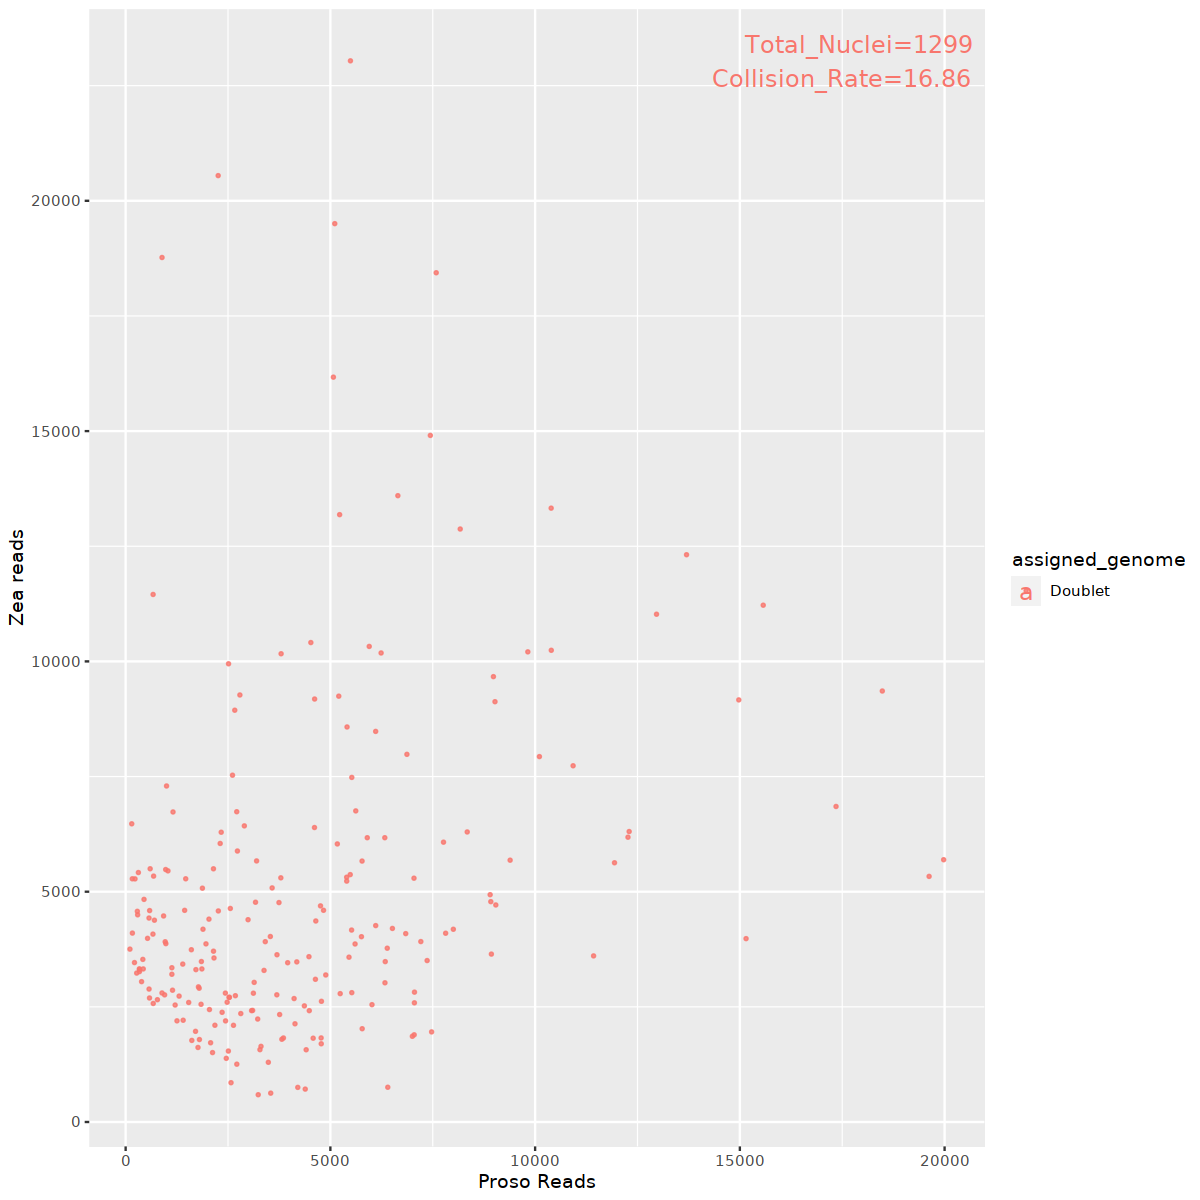

In [70]:
final_combination  %>% 
    filter(assigned_genome == "Doublet")  %>% 
    ggplot(., aes(Pm,Zm, color = assigned_genome)) + geom_point(size = .5, alpha = .8) + 
    xlab("Proso Reads") + ylab("Zea reads") +
    geom_text(size = 5, data = final_text_box, 
              mapping = aes(x = Inf, y = Inf, label = test_solution), hjust   = 1.05, vjust   = 1.5)


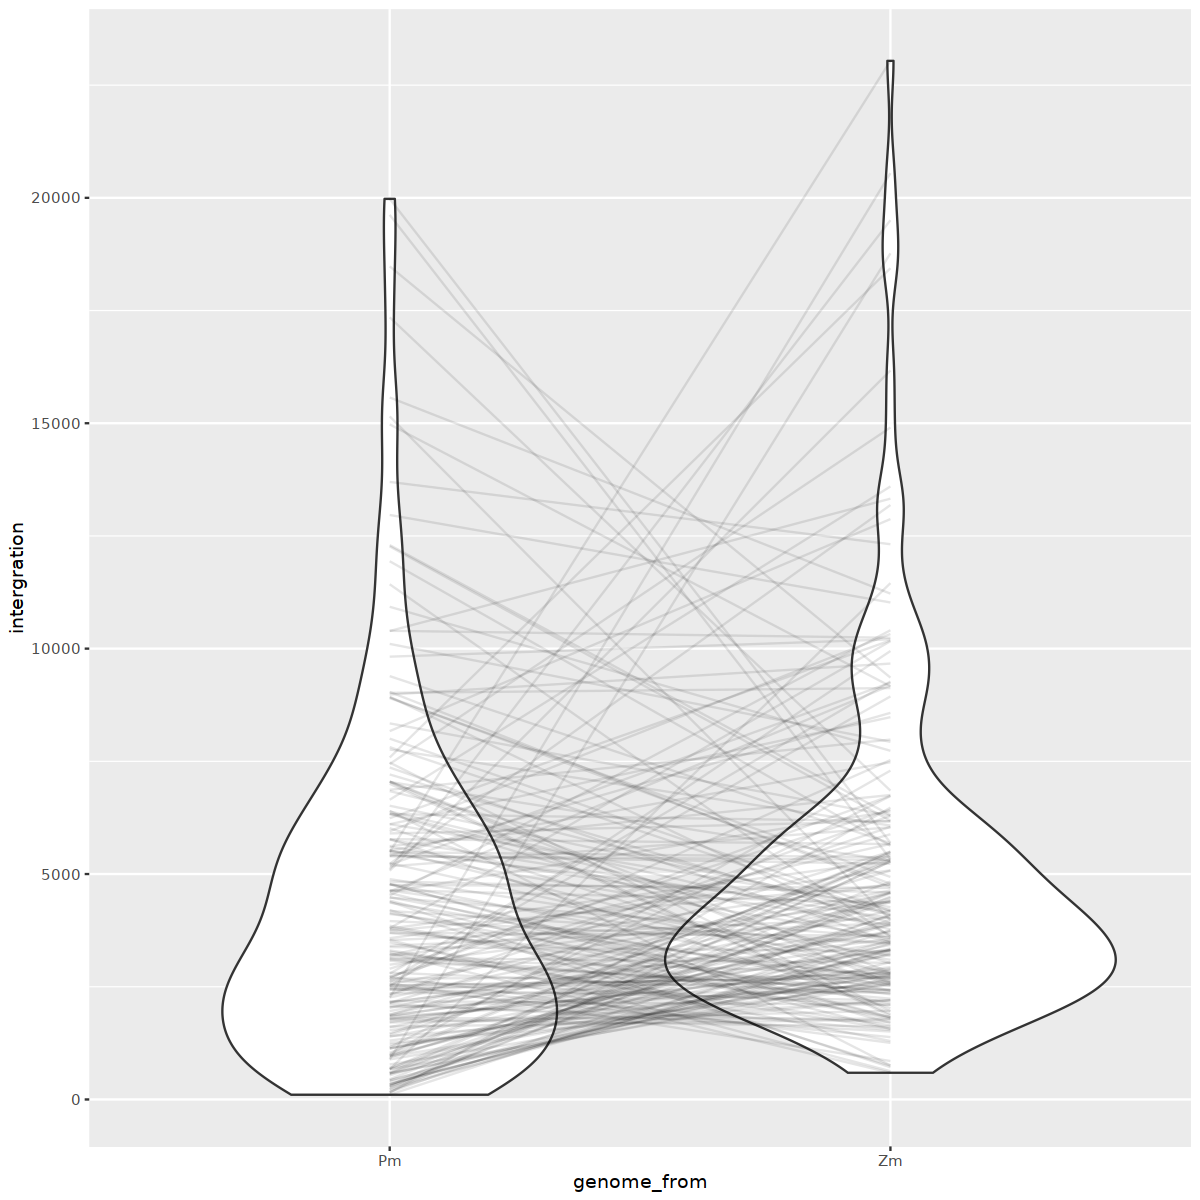

In [78]:
final_combination  %>% 
    filter(assigned_genome == "Doublet") %>% 
    pivot_longer(cols = Pm:Zm, names_to = "genome_from", values_to = "intergration")  %>% 
    ggplot(., aes(x = genome_from, y = intergration)) + geom_violin() + geom_line(aes(group=V4), alpha = .1)

In [82]:
final_combination  %>% 
    filter(assigned_genome == "Doublet")  %>% 
    pivot_longer(cols = Pm:Zm, names_to = "genome_from", values_to = "intergration")  %>% 
    arrange(calculate_proportion_ZM, V4) %>% 
    View()

V4                                               total_insertions
1   BC:Z:GCCAATAGTCAAACTCGGTAGAGTCGGA-ZP_P2_G029_10x  7524           
2   BC:Z:GCCAATAGTCAAACTCGGTAGAGTCGGA-ZP_P2_G029_10x  7524           
3   BC:Z:GCCAATCCGTCCAAACAATGAGCGCTCC-ZP_P2_G029_10x  5499           
4   BC:Z:GCCAATCCGTCCAAACAATGAGCGCTCC-ZP_P2_G029_10x  5499           
5   BC:Z:GCCAATCCGTCCATTCCCGTACGGCTCC-ZP_P2_G029_10x  5334           
6   BC:Z:GCCAATCCGTCCATTCCCGTACGGCTCC-ZP_P2_G029_10x  5334           
7   BC:Z:GCCAATCCGTCCTAAGAATTCCTGATGA-ZP_P2_G029_10x  4393           
8   BC:Z:GCCAATCCGTCCTAAGAATTCCTGATGA-ZP_P2_G029_10x  4393           
9   BC:Z:GCCAATGGCTACCTAAGCAAAAGTCGGA-ZP_P2_G029_10x  4014           
10  BC:Z:GCCAATGGCTACCTAAGCAAAAGTCGGA-ZP_P2_G029_10x  4014           
11  BC:Z:GCCAATCTTGTACAATTCAAAAGACTAA-ZP_P2_G029_10x 20354           
12  BC:Z:GCCAATCTTGTACAATTCAAAAGACTAA-ZP_P2_G029_10x 20354           
13  BC:Z:GCCAATCTTGTATTACTGTCCGCTGACC-ZP_P2_G029_10x  9972           
14  BC:Z:GCCAATCTTGTATTACTGTCCGCTGACC-ZP_P2_G029_10x  9972           
15  BC:Z:GCCAATAGTCAACTAAGGTGAAATGACC-ZP_P2_G029_10x  9413           
16  BC:Z:GCCAATAGTCAACTAAGGTGAAATGACC-ZP_P2_G029_10x  9413           
17  BC:Z:GCCAATCTTGTATCGCGGTTTCGCGGTT-ZP_P2_G029_10x  9541           
18  BC:Z:GCCAATCTTGTATCGCGGTTTCGCGGTT-ZP_P2_G029_10x  9541           
19  BC:Z:GCCAATGATCAGCTAAGCGTACGTCATT-ZP_P2_G029_10x 26068           
20  BC:Z:GCCAATGATCAGCTAAGCGTACGTCATT-ZP_P2_G029_10x 26068           
21  BC:Z:GCCAATTAGCTTTCCCTCGTACGGTTTC-ZP_P2_G029_10x 26921           
22  BC:Z:GCCAATTAGCTTTCCCTCGTACGGTTTC-ZP_P2_G029_10x 26921           
23  BC:Z:GCCAATAGTCAAGTAGTCAAAAGTGACC-ZP_P2_G029_10x 15958           
24  BC:Z:GCCAATAGTCAAGTAGTCAAAAGTGACC-ZP_P2_G029_10x 15958           
25  BC:Z:GCCAATAGTCAAAAACAATTCCTACTAA-ZP_P2_G029_10x  8557           
26  BC:Z:GCCAATAGTCAAAAACAATTCCTACTAA-ZP_P2_G029_10x  8557           
27  BC:Z:GCCAATAGTTCCCATCTCGTACGCGAGG-ZP_P2_G029_10x  3591           
28  BC:Z:GCCAATAGTTCCCATCTCGTACGCGAGG-ZP_P2_G029_10x  3591           
29  BC:Z:GCCAATATGTCATGTCGCGTACGTGACC-ZP_P2_G029_10x  7024           
30  BC:Z:GCCAATATGTCATGTCGCGTACGTGACC-ZP_P2_G029_10x  7024           
⋮   ⋮                                                ⋮               
409 BC:Z:GCCAATTAGCTTCAAAAATGAGCAGCTT-ZP_P2_G029_10x  3990           
410 BC:Z:GCCAATTAGCTTCAAAAATGAGCAGCTT-ZP_P2_G029_10x  3990           
411 BC:Z:GCCAATAGTCAAAGCGAGTTTCGCGAGG-ZP_P2_G029_10x  6578           
412 BC:Z:GCCAATAGTCAAAGCGAGTTTCGCGAGG-ZP_P2_G029_10x  6578           
413 BC:Z:GCCAATCCGTCCGTAGTACTGATTTCCC-ZP_P2_G029_10x  3831           
414 BC:Z:GCCAATCCGTCCGTAGTACTGATTTCCC-ZP_P2_G029_10x  3831           
415 BC:Z:GCCAATCCGTCCTGTCGCAAAAGAGCTT-ZP_P2_G029_10x 24198           
416 BC:Z:GCCAATCCGTCCTGTCGCAAAAGAGCTT-ZP_P2_G029_10x 24198           
417 BC:Z:GCCAATCCGTCCATACGGTGGCCGCTCC-ZP_P2_G029_10x  5374           
418 BC:Z:GCCAATCCGTCCATACGGTGGCCGCTCC-ZP_P2_G029_10x  5374           
419 BC:Z:GCCAATGATCAGATACGGAGTGGCGAGG-ZP_P2_G029_10x  5204           
420 BC:Z:GCCAATGATCAGATACGGAGTGGCGAGG-ZP_P2_G029_10x  5204           
421 BC:Z:GCCAATAGTCAACAATTATGAGCTCATT-ZP_P2_G029_10x 13177           
422 BC:Z:GCCAATAGTCAACAATTATGAGCTCATT-ZP_P2_G029_10x 13177           
423 BC:Z:GCCAATAGTTCCTCGCGCAAAAGACTAA-ZP_P2_G029_10x 21519           
424 BC:Z:GCCAATAGTTCCTCGCGCAAAAGACTAA-ZP_P2_G029_10x 21519           
425 BC:Z:GCCAATATGTCACCGAGGGTAGCTGACC-ZP_P2_G029_10x  6192           
426 BC:Z:GCCAATATGTCACCGAGGGTAGCTGACC-ZP_P2_G029_10x  6192           
427 BC:Z:GCCAATATGTCAATTCCGTGGCCTCGGA-ZP_P2_G029_10x  3939           
428 BC:Z:GCCAATATGTCAATTCCGTGGCCTCGGA-ZP_P2_G029_10x  3939           
429 BC:Z:GCCAATAGTCAAGTATAATGAGCTCGGA-ZP_P2_G029_10x  6005           
430 BC:Z:GCCAATAGTCAAGTATAATGAGCTCGGA-ZP_P2_G029_10x  6005           
431 BC:Z:GCCAATAGTTCCGTAGTATTCCTACTAA-ZP_P2_G029_10x  5980           
432 BC:Z:GCCAATAGTTCCGTAGTATTCCTACTAA-ZP_P2_G029_10x  5980           
433 BC:Z:GCCAATGATCAGCATCTATGAGCTCATT-ZP_P2_G029_10x  4611           
434 BC:Z:GCCAA

In [83]:
final_combined_per_genome_frip_fixed_pm  %>% 
    filter(assigned_genome == "Doublet") %>% 
    left_join(., grabbed_bounds, by = c("V16" = "assigned_genome"))  %>% 
    rowwise() %>% 
    mutate(passing_bool = case_when(per_genome_frip >= final_frip_cut_off ~ TRUE,
                                   TRUE ~ FALSE))  %>% 
    arrange(calculate_proportion_ZM, V4) %>% 
    View()

V4                                               total_insertions V16
1   BC:Z:GCCAATAGTCAAACTCGGTAGAGTCGGA-ZP_P2_G029_10x  7524            Pm 
2   BC:Z:GCCAATAGTCAAACTCGGTAGAGTCGGA-ZP_P2_G029_10x  7524            Zm 
3   BC:Z:GCCAATAGTTCCTCGCGATGAGCACCGG-ZP_P2_G029_10x  7108            Pm 
4   BC:Z:GCCAATAGTTCCTCGCGATGAGCACCGG-ZP_P2_G029_10x  7108            Zm 
5   BC:Z:GCCAATTAGCTTCAATTACTGATTCATT-ZP_P2_G029_10x  7256            Pm 
6   BC:Z:GCCAATTAGCTTCAATTACTGATTCATT-ZP_P2_G029_10x  7256            Zm 
7   BC:Z:GCCAATAGTCAAATTCCCAAAAGACCGG-ZP_P2_G029_10x  6251            Pm 
8   BC:Z:GCCAATAGTCAAATTCCCAAAAGACCGG-ZP_P2_G029_10x  6251            Zm 
9   BC:Z:GCCAATGGCTACTGTCGGAGTGGGCTCC-ZP_P2_G029_10x  3992            Pm 
10  BC:Z:GCCAATGGCTACTGTCGGAGTGGGCTCC-ZP_P2_G029_10x  3992            Zm 
11  BC:Z:GCCAATGATCAGTGTCGCAAAAGAGCTT-ZP_P2_G029_10x  5230            Pm 
12  BC:Z:GCCAATGATCAGTGTCGCAAAAGAGCTT-ZP_P2_G029_10x  5230            Zm 
13  BC:Z:GCCAATAGTTCCATACGGGTAGCTCATT-ZP_P2_G029_10x 18211            Pm 
14  BC:Z:GCCAATAGTTCCATACGGGTAGCTCATT-ZP_P2_G029_10x 18211            Zm 
15  BC:Z:GCCAATCCGTCCCTAAGATGAGCACTAA-ZP_P2_G029_10x  7636            Pm 
16  BC:Z:GCCAATCCGTCCCTAAGATGAGCACTAA-ZP_P2_G029_10x  7636            Zm 
17  BC:Z:GCCAATATGTCAATACGGGTAGCACTAA-ZP_P2_G029_10x  6295            Pm 
18  BC:Z:GCCAATATGTCAATACGGGTAGCACTAA-ZP_P2_G029_10x  6295            Zm 
19  BC:Z:GCCAATCCGTCCAAACAATGAGCGCTCC-ZP_P2_G029_10x  5499            Pm 
20  BC:Z:GCCAATCCGTCCAAACAATGAGCGCTCC-ZP_P2_G029_10x  5499            Zm 
21  BC:Z:GCCAATCTTGTACAAAAGAGTGGTCGGA-ZP_P2_G029_10x 12337            Pm 
22  BC:Z:GCCAATCTTGTACAAAAGAGTGGTCGGA-ZP_P2_G029_10x 12337            Zm 
23  BC:Z:GCCAATAGTTCCCCGAGGGTAGCTTCCC-ZP_P2_G029_10x 10777            Pm 
24  BC:Z:GCCAATAGTTCCCCGAGGGTAGCTTCCC-ZP_P2_G029_10x 10777            Zm 
25  BC:Z:GCCAATGATCAGGTATAGTGGCCACTAA-ZP_P2_G029_10x 12971            Pm 
26  BC:Z:GCCAATGATCAGGTATAGTGGCCACTAA-ZP_P2_G029_10x 12971            Zm 
27  BC:Z:GCCAATTAGCTTTTACTACTGATGCTCC-ZP_P2_G029_10x  6260            Pm 
28  BC:Z:GCCAATTAGCTTTTACTACTGATGCTCC-ZP_P2_G029_10x  6260            Zm 
29  BC:Z:GCCAATCCGTCCATTCCCGTACGGCTCC-ZP_P2_G029_10x  5334            Pm 
30  BC:Z:GCCAATCCGTCCATTCCCGTACGGCTCC-ZP_P2_G029_10x  5334            Zm 
⋮   ⋮                                                ⋮                ⋮  
905 BC:Z:GCCAATCCGTCCTCCCTGGTAGCACTAA-ZP_P2_G029_10x  3775            Pm 
906 BC:Z:GCCAATCCGTCCTCCCTGGTAGCACTAA-ZP_P2_G029_10x  3775            Zm 
907 BC:Z:GCCAATATGTCAGTAGTATGAGCTCATT-ZP_P2_G029_10x  4802            Pm 
908 BC:Z:GCCAATATGTCAGTAGTATGAGCTCATT-ZP_P2_G029_10x  4802            Zm 
909 BC:Z:GCCAATGATCAGGACTTGAGTGGCGAGG-ZP_P2_G029_10x 12387            Pm 
910 BC:Z:GCCAATGATCAGGACTTGAGTGGCGAGG-ZP_P2_G029_10x 12387            Zm 
911 BC:Z:GCCAATATGTCAGGCAGATGAGCTCATT-ZP_P2_G029_10x 11808            Pm 
912 BC:Z:GCCAATATGTCAGGCAGATGAGCTCATT-ZP_P2_G029_10x 11808            Zm 
913 BC:Z:GCCAATGATCAGTCGCGACTGATTTCCC-ZP_P2_G029_10x  3598            Pm 
914 BC:Z:GCCAATGATCAGTCGCGACTGATTTCCC-ZP_P2_G029_10x  3598            Zm 
915 BC:Z:GCCAATGATCAGAAACACAAAAGTCATT-ZP_P2_G029_10x  4036            Pm 
916 BC:Z:GCCAATGATCAGAAACACAAAAGTCATT-ZP_P2_G029_10x  4036            Zm 
917 BC:Z:GCCAATTAGCTTAAACAATGAGCAGCTT-ZP_P2_G029_10x  6633            Pm 
918 BC:Z:GCCAATTAGCTTAAACAATGAGCAGCTT-ZP_P2_G029_10x  6633            Zm 
919 BC:Z:GCCAATCCGTCCTGTCGCAAAAGAACAT-ZP_P2_G029_10x  4392            Pm 
920 BC:Z:GCCAATCCGTCCTGTCGCAAAAGAACAT-ZP_P2_G029_10x  4392            Zm 
921 BC:Z:GCCAATATGTCAAGCGAATGAGCTCATT-ZP_P2_G029_10x  6329            Pm 
922 BC:Z:GCCAATATGTCAAGCGAATGAGCTCATT-ZP_P2_G029_10x  6329            Zm 
923 BC:Z:GCCAATCTTGTATGTTTGTAGAGAACAT-ZP_P2_G029_10x  4036            Pm 
924 BC:Z:GCCAATCTTGTATGTTTGTAGAGAACAT-ZP_P2_G029_10x  4036            Zm 
925 BC:Z:GCCAATCTTGTACAATTCAAAAGTCATT-ZP_P2_G029_10x  7198            Pm 
926 BC:Z:GCCAATCTTGTACAATTCAAAAGTCATT-ZP_P2_G029_10x  7198            Zm 
927 BC:Z

In [ ]:
final_combination  %>% 
    filter(assigned_genome == "Doublet") %>% 
    pivot_longer(cols = Pm:Zm, names_to = "genome_from", values_to = "intergration")  %>% 
    ggplot(., aes(x = genome_from, y = intergration)) + geom_violin() + geom_line(aes(group=V4), alpha = .1)

In [5]:
    plate_name <- "ZP_P3_G029_10x"
        
    plate_soc_obj <- readRDS(paste0(output_path,"QC_output/",plate_name, "_QC_soc_obj.rds"))
    plate_raw_obj <- readRDS(paste0(output_path,"QC_output/",plate_name, "_QC_obj.rds"))

    
    passing_cells <- plate_soc_obj$meta$cellID
    meta_values <- plate_soc_obj$meta
    
    #Chromosome info
    #maize_chromosome_list<-list("chr1","chr2","chr3","chr4","chr5","chr6","chr7","chr8","chr9","chr10","scaf_21","scaf_22","scaf_23","scaf_24","scaf_25","scaf_26","scaf_27","scaf_28","scaf_29","scaf_30","scaf_31","scaf_32","scaf_33","scaf_34","scaf_35","scaf_36","scaf_37","scaf_38","scaf_39","scaf_40","scaf_41","scaf_42","scaf_43","scaf_44","scaf_45","scaf_46","scaf_47","scaf_48","scaf_49","scaf_50","scaf_51","scaf_52","scaf_53","scaf_54","scaf_55","scaf_56","scaf_57","scaf_58","scaf_59","scaf_60","scaf_61","scaf_62","scaf_63","scaf_64","scaf_65","scaf_66","scaf_67","scaf_68","scaf_69","scaf_70","scaf_71","scaf_72","scaf_73","scaf_74","scaf_75","scaf_76","scaf_77","scaf_78","scaf_79","scaf_80","scaf_81","scaf_82","scaf_83","scaf_84","scaf_85","scaf_86","scaf_87","scaf_88","scaf_89","scaf_90","scaf_91","scaf_92","scaf_93","scaf_94","scaf_95","scaf_96","scaf_97","scaf_98","scaf_99","scaf_100","scaf_101","scaf_102","scaf_103","scaf_104","scaf_105","scaf_106","scaf_107","scaf_108","scaf_109","scaf_110","scaf_111","scaf_112","scaf_113","scaf_114","scaf_115","scaf_116","scaf_117","scaf_118","scaf_119","scaf_120","scaf_121","scaf_122","scaf_123","scaf_124","scaf_125","scaf_126","scaf_127","scaf_128","scaf_129","scaf_130","scaf_131","scaf_132","scaf_133","scaf_134","scaf_135","scaf_136","scaf_137","scaf_138","scaf_139","scaf_140","scaf_141","scaf_142","scaf_143","scaf_144","scaf_145","scaf_146","scaf_147","scaf_148","scaf_149","scaf_150","scaf_151","scaf_152","scaf_153","scaf_154","scaf_155","scaf_156","scaf_157","scaf_158","scaf_159","scaf_160","scaf_161","scaf_162","scaf_163","scaf_164","scaf_165","scaf_166","scaf_167","scaf_168","scaf_169","scaf_170","scaf_171","scaf_172","scaf_173","scaf_174","scaf_175","scaf_176","scaf_177","scaf_178","scaf_179","scaf_180","scaf_181","scaf_182","scaf_183","scaf_184","scaf_185","scaf_186","scaf_187","scaf_188","scaf_189","scaf_190","scaf_191","scaf_192","scaf_193","scaf_194","scaf_195","scaf_196","scaf_197","scaf_198","scaf_199","scaf_200","scaf_201","scaf_202","scaf_203","scaf_204","scaf_205","scaf_206","scaf_207","scaf_208","scaf_209","scaf_210","scaf_211","scaf_212","scaf_213","scaf_214","scaf_215","scaf_216","scaf_217","scaf_218","scaf_219","scaf_220","scaf_221","scaf_222","scaf_223","scaf_224","scaf_225","scaf_226","scaf_227","scaf_228","scaf_229","scaf_230","scaf_231","scaf_232","scaf_233","scaf_234","scaf_235","scaf_236","scaf_237","scaf_238","scaf_239","scaf_240","scaf_241","scaf_242","scaf_243","scaf_244","scaf_245","scaf_246","scaf_247","scaf_248","scaf_249","scaf_250","scaf_251","scaf_252","scaf_253","scaf_254","scaf_255","scaf_256","scaf_257","scaf_258","scaf_259","scaf_260","scaf_261","scaf_262","scaf_263","scaf_264","scaf_265","scaf_266","scaf_267","scaf_268","scaf_269","scaf_270","scaf_271","scaf_272","scaf_273","scaf_274","scaf_275","scaf_276","scaf_277","scaf_278","scaf_279","scaf_280","scaf_281","scaf_282","scaf_283","scaf_284","scaf_285","scaf_286","scaf_287","scaf_288","scaf_289","scaf_290","scaf_291","scaf_292","scaf_293","scaf_294","scaf_295","scaf_296","scaf_297","scaf_298","scaf_299","scaf_300","scaf_301","scaf_302","scaf_303","scaf_304","scaf_305","scaf_306","scaf_307","scaf_308","scaf_309","scaf_310","scaf_311","scaf_312","scaf_313","scaf_314","scaf_315","scaf_316","scaf_317","scaf_318","scaf_319","scaf_320","scaf_321","scaf_322","scaf_323","scaf_324","scaf_325","scaf_326","scaf_327","scaf_328","scaf_329","scaf_330","scaf_331","scaf_332","scaf_333","scaf_334","scaf_335","scaf_336","scaf_337","scaf_338","scaf_339","scaf_340","scaf_341","scaf_342","scaf_343","scaf_344","scaf_345","scaf_346","scaf_347","scaf_348","scaf_349","scaf_350","scaf_351","scaf_352","scaf_353","scaf_354","scaf_355","scaf_356","scaf_357","scaf_358","scaf_359","scaf_360","scaf_361","scaf_362","scaf_363","scaf_364","scaf_365","scaf_366","scaf_367","scaf_368","scaf_369","scaf_370","scaf_371","scaf_372","scaf_373","scaf_374","scaf_375","scaf_376","scaf_377","scaf_378","scaf_379","scaf_380","scaf_381","scaf_382","scaf_383","scaf_384","scaf_385","scaf_386","scaf_387","scaf_388","scaf_389","scaf_390","scaf_391","scaf_392","scaf_393","scaf_394","scaf_395","scaf_396","scaf_397","scaf_398","scaf_399","scaf_400","scaf_401","scaf_402","scaf_403","scaf_404","scaf_405","scaf_406","scaf_407","scaf_408","scaf_409","scaf_410","scaf_411","scaf_412","scaf_413","scaf_414","scaf_415","scaf_416","scaf_417","scaf_418","scaf_419","scaf_420","scaf_421","scaf_422","scaf_423","scaf_424","scaf_425","scaf_426","scaf_427","scaf_428","scaf_429","scaf_430","scaf_431","scaf_432","scaf_433","scaf_434","scaf_435","scaf_436","scaf_437","scaf_438","scaf_439","scaf_440","scaf_441","scaf_442","scaf_443","scaf_444","scaf_445","scaf_446","scaf_447","scaf_448","scaf_449","scaf_450","scaf_451","scaf_452","scaf_453","scaf_454","scaf_455","scaf_456","scaf_457","scaf_458","scaf_459","scaf_460","scaf_461","scaf_462","scaf_463","scaf_464","scaf_465","scaf_466","scaf_467","scaf_468","scaf_469","scaf_470","scaf_471","scaf_472","scaf_473","scaf_474","scaf_475","scaf_476","scaf_477","scaf_478","scaf_479","scaf_480","scaf_481","scaf_482","scaf_483","scaf_484","scaf_485","scaf_486","scaf_487","scaf_488","scaf_489","scaf_490","scaf_491","scaf_492","scaf_493","scaf_494","scaf_495","scaf_496","scaf_497","scaf_498","scaf_499","scaf_500","scaf_501","scaf_502","scaf_503","scaf_504","scaf_505","scaf_506","scaf_507","scaf_508","scaf_509","scaf_510","scaf_511","scaf_512","scaf_513","scaf_514","scaf_515","scaf_516","scaf_517","scaf_518","scaf_519","scaf_520","scaf_521","scaf_522","scaf_523","scaf_524","scaf_525","scaf_526","scaf_527","scaf_528","scaf_529","scaf_530","scaf_531","scaf_532","scaf_533","scaf_534","scaf_535","scaf_536","scaf_537","scaf_538","scaf_539","scaf_540","scaf_541","scaf_542","scaf_543","scaf_544","scaf_545","scaf_546","scaf_547","scaf_548","scaf_549","scaf_550","scaf_551","scaf_552","scaf_553","scaf_554","scaf_555","scaf_556","scaf_557","scaf_558","scaf_559","scaf_560","scaf_561","scaf_562","scaf_563","scaf_564","scaf_565","scaf_566","scaf_567","scaf_568","scaf_569","scaf_570","scaf_571","scaf_572","scaf_573","scaf_574","scaf_575","scaf_576","scaf_577","scaf_578","scaf_579","scaf_580","scaf_581","scaf_582","scaf_583","scaf_584","scaf_585","scaf_586","scaf_587","scaf_588","scaf_589","scaf_590","scaf_591","scaf_592","scaf_593","scaf_594","scaf_595","scaf_596","scaf_597","scaf_598","scaf_599","scaf_600","scaf_601","scaf_602","scaf_603","scaf_604","scaf_605","scaf_606","scaf_607","scaf_608","scaf_609","scaf_610","scaf_611","scaf_612","scaf_613","scaf_614","scaf_615","scaf_616","scaf_617","scaf_618","scaf_619","scaf_620","scaf_621","scaf_622","scaf_623","scaf_624","scaf_625","scaf_626","scaf_627","scaf_628","scaf_629","scaf_630","scaf_631","scaf_632","scaf_633","scaf_634","scaf_635","scaf_636","scaf_637","scaf_638","scaf_639","scaf_640","scaf_641","scaf_642","scaf_643","scaf_644","scaf_645","scaf_646","scaf_647","scaf_648","scaf_649","scaf_650","scaf_651","scaf_652","scaf_653","scaf_654","scaf_655","scaf_656","scaf_657","scaf_658","scaf_659","scaf_660","scaf_661","scaf_662","scaf_663","scaf_664","scaf_665","scaf_666","scaf_667","scaf_668","scaf_669","scaf_670","scaf_671","scaf_672","scaf_673","scaf_674","scaf_675","scaf_676","scaf_677","scaf_678","scaf_679","scaf_680","scaf_681","scaf_682","scaf_683","scaf_684","scaf_685","scaf_686","scaf_687","scaf_688","scaf_689","scaf_690","scaf_691","scaf_692","scaf_693","scaf_694","scaf_695")
    #proso_millet_chromosome_list<-list("CM009699.2","CM009700.2","CM009701.2","CM009702.2","CM009703.2","CM009704.2","CM009705.2","CM009706.2","CM009707.2","CM009690.2","CM009691.2","CM009692.2","CM009693.2","CM009694.2","CM009695.2","CM009696.2","CM009697.2","CM009698.2","CM009689.1","PQIB02000019.1","PQIB02000020.1","PQIB02000021.1","PQIB02000022.1","PQIB02000023.1","PQIB02000024.1","PQIB02000025.1","PQIB02000026.1","PQIB02000027.1","PQIB02000028.1","PQIB02000029.1","PQIB02000030.1","PQIB02000031.1","PQIB02000032.1","PQIB02000033.1","PQIB02000034.1","PQIB02000035.1","PQIB02000036.1","PQIB02000037.1","PQIB02000038.1","PQIB02000039.1","PQIB02000040.1","PQIB02000041.1","PQIB02000042.1","PQIB02000043.1","PQIB02000044.1","PQIB02000045.1","PQIB02000046.1","PQIB02000047.1","PQIB02000048.1","PQIB02000049.1","PQIB02000050.1","PQIB02000051.1","PQIB02000052.1","PQIB02000053.1","PQIB02000054.1","PQIB02000055.1","PQIB02000056.1","PQIB02000057.1","PQIB02000058.1","PQIB02000059.1","PQIB02000060.1","PQIB02000061.1","PQIB02000062.1","PQIB02000063.1","PQIB02000064.1","PQIB02000065.1","PQIB02000066.1","PQIB02000067.1","PQIB02000068.1","PQIB02000069.1","PQIB02000070.1","PQIB02000071.1","PQIB02000072.1","PQIB02000073.1","PQIB02000074.1","PQIB02000075.1","PQIB02000076.1","PQIB02000077.1","PQIB02000078.1","PQIB02000079.1","PQIB02000080.1","PQIB02000081.1","PQIB02000082.1","PQIB02000083.1","PQIB02000084.1","PQIB02000085.1","PQIB02000086.1","PQIB02000087.1","PQIB02000088.1","PQIB02000089.1","PQIB02000090.1","PQIB02000091.1","PQIB02000092.1","PQIB02000093.1","PQIB02000094.1","PQIB02000095.1","PQIB02000096.1","PQIB02000097.1","PQIB02000098.1","PQIB02000099.1","PQIB02000100.1","PQIB02000101.1","PQIB02000102.1","PQIB02000103.1","PQIB02000104.1","PQIB02000105.1","PQIB02000106.1","PQIB02000107.1","PQIB02000108.1","PQIB02000109.1","PQIB02000110.1","PQIB02000111.1","PQIB02000112.1","PQIB02000113.1","PQIB02000114.1","PQIB02000115.1","PQIB02000116.1","PQIB02000117.1","PQIB02000118.1","PQIB02000119.1","PQIB02000120.1","PQIB02000121.1","PQIB02000122.1","PQIB02000123.1","PQIB02000124.1","PQIB02000125.1","PQIB02000126.1","PQIB02000127.1","PQIB02000128.1","PQIB02000129.1","PQIB02000130.1","PQIB02000131.1","PQIB02000132.1","PQIB02000133.1","PQIB02000134.1","PQIB02000135.1","PQIB02000136.1","PQIB02000137.1","PQIB02000138.1","PQIB02000139.1","PQIB02000140.1","PQIB02000141.1","PQIB02000142.1","PQIB02000143.1","PQIB02000144.1","PQIB02000145.1","PQIB02000146.1","PQIB02000147.1","PQIB02000148.1","PQIB02000149.1","PQIB02000150.1","PQIB02000151.1","PQIB02000152.1","PQIB02000153.1","PQIB02000154.1","PQIB02000155.1","PQIB02000156.1","PQIB02000157.1","PQIB02000158.1","PQIB02000159.1","PQIB02000160.1","PQIB02000161.1","PQIB02000162.1","PQIB02000163.1","PQIB02000164.1","PQIB02000165.1","PQIB02000166.1","PQIB02000167.1","PQIB02000168.1","PQIB02000169.1","PQIB02000170.1","PQIB02000171.1","PQIB02000172.1","PQIB02000173.1","PQIB02000174.1","PQIB02000175.1","PQIB02000176.1","PQIB02000177.1","PQIB02000178.1","PQIB02000179.1","PQIB02000180.1","PQIB02000181.1","PQIB02000182.1","PQIB02000183.1","PQIB02000184.1","PQIB02000185.1","PQIB02000186.1","PQIB02000187.1","PQIB02000188.1","PQIB02000189.1","PQIB02000190.1","PQIB02000191.1","PQIB02000192.1","PQIB02000193.1","PQIB02000194.1","PQIB02000195.1","PQIB02000196.1","PQIB02000197.1","PQIB02000198.1","PQIB02000199.1","PQIB02000200.1","PQIB02000201.1","PQIB02000202.1","PQIB02000203.1","PQIB02000204.1","PQIB02000205.1","PQIB02000206.1","PQIB02000207.1","PQIB02000208.1","PQIB02000209.1","PQIB02000210.1","PQIB02000211.1","PQIB02000212.1","PQIB02000213.1","PQIB02000214.1","PQIB02000215.1","PQIB02000216.1","PQIB02000217.1","PQIB02000218.1","PQIB02000219.1","PQIB02000220.1","PQIB02000221.1","PQIB02000222.1","PQIB02000223.1","PQIB02000224.1","PQIB02000225.1","PQIB02000226.1","PQIB02000227.1","PQIB02000228.1","PQIB02000229.1","PQIB02000230.1","PQIB02000231.1","PQIB02000232.1","PQIB02000233.1","PQIB02000234.1","PQIB02000235.1","PQIB02000236.1","PQIB02000237.1","PQIB02000238.1","PQIB02000239.1","PQIB02000240.1","PQIB02000241.1","PQIB02000242.1","PQIB02000243.1","PQIB02000244.1","PQIB02000245.1","PQIB02000246.1","PQIB02000247.1","PQIB02000248.1","PQIB02000249.1","PQIB02000250.1","PQIB02000251.1","PQIB02000252.1","PQIB02000253.1","PQIB02000254.1","PQIB02000255.1","PQIB02000256.1","PQIB02000257.1","PQIB02000258.1","PQIB02000259.1","PQIB02000260.1","PQIB02000261.1","PQIB02000262.1","PQIB02000263.1","PQIB02000264.1","PQIB02000265.1","PQIB02000266.1","PQIB02000267.1","PQIB02000268.1","PQIB02000269.1","PQIB02000270.1","PQIB02000271.1","PQIB02000272.1","PQIB02000273.1","PQIB02000274.1","PQIB02000275.1","PQIB02000276.1","PQIB02000277.1","PQIB02000278.1","PQIB02000279.1","PQIB02000280.1","PQIB02000281.1","PQIB02000282.1","PQIB02000283.1","PQIB02000284.1","PQIB02000285.1","PQIB02000286.1","PQIB02000287.1","PQIB02000288.1","PQIB02000289.1","PQIB02000290.1","PQIB02000291.1","PQIB02000292.1","PQIB02000293.1","PQIB02000294.1","PQIB02000295.1","PQIB02000296.1","PQIB02000297.1","PQIB02000298.1","PQIB02000299.1","PQIB02000300.1","PQIB02000301.1","PQIB02000302.1","PQIB02000303.1","PQIB02000304.1","PQIB02000305.1","PQIB02000306.1","PQIB02000307.1","PQIB02000308.1","PQIB02000309.1","PQIB02000310.1","PQIB02000311.1","PQIB02000312.1","PQIB02000313.1","PQIB02000314.1","PQIB02000315.1","PQIB02000316.1","PQIB02000317.1","PQIB02000318.1","PQIB02000319.1","PQIB02000320.1","PQIB02000321.1","PQIB02000322.1","PQIB02000323.1","PQIB02000324.1","PQIB02000325.1","PQIB02000326.1","PQIB02000327.1","PQIB02000328.1","PQIB02000329.1","PQIB02000330.1","PQIB02000331.1","PQIB02000332.1","PQIB02000333.1","PQIB02000334.1","PQIB02000335.1","PQIB02000336.1","PQIB02000337.1","PQIB02000338.1","PQIB02000339.1","PQIB02000340.1","PQIB02000341.1","PQIB02000342.1","PQIB02000343.1","PQIB02000344.1","PQIB02000345.1","PQIB02000346.1","PQIB02000347.1","PQIB02000348.1","PQIB02000349.1","PQIB02000350.1","PQIB02000351.1","PQIB02000352.1","PQIB02000353.1","PQIB02000354.1","PQIB02000355.1","PQIB02000356.1","PQIB02000357.1","PQIB02000358.1","PQIB02000359.1","PQIB02000360.1","PQIB02000361.1","PQIB02000362.1","PQIB02000363.1","PQIB02000364.1","PQIB02000365.1","PQIB02000366.1","PQIB02000367.1","PQIB02000368.1","PQIB02000369.1","PQIB02000370.1","PQIB02000371.1","PQIB02000372.1","PQIB02000373.1","PQIB02000374.1","PQIB02000375.1","PQIB02000376.1","PQIB02000377.1","PQIB02000378.1","PQIB02000379.1","PQIB02000380.1","PQIB02000381.1","PQIB02000382.1","PQIB02000383.1","PQIB02000384.1","PQIB02000385.1","PQIB02000386.1","PQIB02000387.1","PQIB02000388.1","PQIB02000389.1","PQIB02000390.1","PQIB02000391.1","PQIB02000392.1","PQIB02000393.1","PQIB02000394.1","PQIB02000395.1","PQIB02000396.1","PQIB02000397.1","PQIB02000398.1","PQIB02000399.1","PQIB02000400.1","PQIB02000401.1","PQIB02000402.1","PQIB02000403.1","PQIB02000404.1","PQIB02000405.1","PQIB02000406.1","PQIB02000407.1","PQIB02000408.1","PQIB02000409.1","PQIB02000410.1","PQIB02000411.1","PQIB02000412.1","PQIB02000413.1","PQIB02000414.1","PQIB02000415.1","PQIB02000416.1","PQIB02000417.1","PQIB02000418.1","PQIB02000419.1","PQIB02000420.1","PQIB02000421.1","PQIB02000422.1","PQIB02000423.1","PQIB02000424.1","PQIB02000425.1","PQIB02000426.1","PQIB02000427.1","PQIB02000428.1","PQIB02000429.1","PQIB02000430.1","PQIB02000431.1","PQIB02000432.1","PQIB02000433.1","PQIB02000434.1","PQIB02000435.1","PQIB02000436.1","PQIB02000437.1","PQIB02000438.1","PQIB02000439.1","PQIB02000440.1","PQIB02000441.1","PQIB02000442.1","PQIB02000443.1","PQIB02000444.1","PQIB02000445.1","PQIB02000446.1","PQIB02000447.1","PQIB02000448.1","PQIB02000449.1","PQIB02000450.1","PQIB02000451.1","PQIB02000452.1","PQIB02000453.1","PQIB02000454.1","PQIB02000455.1","PQIB02000456.1","PQIB02000457.1","PQIB02000458.1","PQIB02000459.1","PQIB02000460.1","PQIB02000461.1","PQIB02000462.1","PQIB02000463.1","PQIB02000464.1","PQIB02000465.1","PQIB02000466.1","PQIB02000467.1","PQIB02000468.1","PQIB02000469.1","PQIB02000470.1","PQIB02000471.1","PQIB02000472.1","PQIB02000473.1","PQIB02000474.1","PQIB02000475.1","PQIB02000476.1","PQIB02000477.1","PQIB02000478.1","PQIB02000479.1","PQIB02000480.1","PQIB02000481.1","PQIB02000482.1","PQIB02000483.1","PQIB02000484.1","PQIB02000485.1","PQIB02000486.1","PQIB02000487.1","PQIB02000488.1","PQIB02000489.1","PQIB02000490.1","PQIB02000491.1","PQIB02000492.1","PQIB02000493.1","PQIB02000494.1","PQIB02000495.1","PQIB02000496.1","PQIB02000497.1","PQIB02000498.1","PQIB02000499.1","PQIB02000500.1","PQIB02000501.1","PQIB02000502.1","PQIB02000503.1","PQIB02000504.1","PQIB02000505.1","PQIB02000506.1","PQIB02000507.1","PQIB02000508.1","PQIB02000509.1","PQIB02000510.1","PQIB02000511.1","PQIB02000512.1","PQIB02000513.1","PQIB02000514.1","PQIB02000515.1","PQIB02000516.1","PQIB02000517.1","PQIB02000518.1","PQIB02000519.1","PQIB02000520.1","PQIB02000521.1","PQIB02000522.1","PQIB02000523.1","PQIB02000524.1","PQIB02000525.1","PQIB02000526.1","PQIB02000527.1","PQIB02000528.1","PQIB02000529.1","PQIB02000530.1","PQIB02000531.1","PQIB02000532.1","PQIB02000533.1","PQIB02000534.1","PQIB02000535.1","PQIB02000536.1","PQIB02000537.1","PQIB02000538.1","PQIB02000539.1","PQIB02000540.1","PQIB02000541.1","PQIB02000542.1","PQIB02000543.1","PQIB02000544.1","PQIB02000545.1","PQIB02000546.1","PQIB02000547.1","PQIB02000548.1","PQIB02000549.1","PQIB02000550.1","PQIB02000551.1","PQIB02000552.1","PQIB02000553.1","PQIB02000554.1","PQIB02000555.1","PQIB02000556.1","PQIB02000557.1","PQIB02000558.1","PQIB02000559.1","PQIB02000560.1","PQIB02000561.1","PQIB02000562.1","PQIB02000563.1","PQIB02000564.1","PQIB02000565.1","PQIB02000566.1","PQIB02000567.1","PQIB02000568.1","PQIB02000569.1","PQIB02000570.1","PQIB02000571.1","PQIB02000572.1","PQIB02000573.1","PQIB02000574.1","PQIB02000575.1","PQIB02000576.1","PQIB02000577.1","PQIB02000578.1","PQIB02000579.1","PQIB02000580.1","PQIB02000581.1","PQIB02000582.1","PQIB02000583.1","PQIB02000584.1","PQIB02000585.1","PQIB02000586.1","PQIB02000587.1","PQIB02000588.1","PQIB02000589.1","PQIB02000590.1",
    #        "PQIB02000591.1","PQIB02000592.1","PQIB02000593.1","PQIB02000594.1","PQIB02000595.1","PQIB02000596.1","PQIB02000597.1","PQIB02000598.1","PQIB02000599.1","PQIB02000600.1","PQIB02000601.1","PQIB02000602.1","PQIB02000603.1","PQIB02000604.1","PQIB02000605.1","PQIB02000606.1","PQIB02000607.1","PQIB02000608.1","PQIB02000609.1","PQIB02000610.1","PQIB02000611.1","PQIB02000612.1","PQIB02000613.1","PQIB02000614.1","PQIB02000615.1","PQIB02000616.1","PQIB02000617.1","PQIB02000618.1","PQIB02000619.1","PQIB02000620.1","PQIB02000621.1","PQIB02000622.1","PQIB02000623.1","PQIB02000624.1","PQIB02000625.1","PQIB02000626.1","PQIB02000627.1","PQIB02000628.1","PQIB02000629.1","PQIB02000630.1","PQIB02000631.1","PQIB02000632.1","PQIB02000633.1","PQIB02000634.1","PQIB02000635.1","PQIB02000636.1","PQIB02000637.1","PQIB02000638.1","PQIB02000639.1","PQIB02000640.1","PQIB02000641.1","PQIB02000642.1","PQIB02000643.1","PQIB02000644.1","PQIB02000645.1","PQIB02000646.1","PQIB02000647.1","PQIB02000648.1","PQIB02000649.1","PQIB02000650.1","PQIB02000651.1","PQIB02000652.1","PQIB02000653.1","PQIB02000654.1","PQIB02000655.1","PQIB02000656.1","PQIB02000657.1","PQIB02000658.1","PQIB02000659.1","PQIB02000660.1","PQIB02000661.1","PQIB02000662.1","PQIB02000663.1","PQIB02000664.1","PQIB02000665.1","PQIB02000666.1","PQIB02000667.1","PQIB02000668.1","PQIB02000669.1","PQIB02000670.1","PQIB02000671.1","PQIB02000672.1","PQIB02000673.1","PQIB02000674.1","PQIB02000675.1","PQIB02000676.1","PQIB02000677.1","PQIB02000678.1","PQIB02000679.1","PQIB02000680.1","PQIB02000681.1","PQIB02000682.1","PQIB02000683.1","PQIB02000684.1","PQIB02000685.1","PQIB02000686.1","PQIB02000687.1","PQIB02000688.1","PQIB02000689.1","PQIB02000690.1","PQIB02000691.1","PQIB02000692.1","PQIB02000693.1","PQIB02000694.1","PQIB02000695.1","PQIB02000696.1","PQIB02000697.1","PQIB02000698.1","PQIB02000699.1","PQIB02000700.1","PQIB02000701.1","PQIB02000702.1","PQIB02000703.1","PQIB02000704.1","PQIB02000705.1","PQIB02000706.1","PQIB02000707.1","PQIB02000708.1","PQIB02000709.1","PQIB02000710.1","PQIB02000711.1","PQIB02000712.1","PQIB02000713.1","PQIB02000714.1","PQIB02000715.1","PQIB02000716.1","PQIB02000717.1","PQIB02000718.1","PQIB02000719.1","PQIB02000720.1","PQIB02000721.1","PQIB02000722.1","PQIB02000723.1","PQIB02000724.1","PQIB02000725.1","PQIB02000726.1","PQIB02000727.1","PQIB02000728.1","PQIB02000729.1","PQIB02000730.1","PQIB02000731.1","PQIB02000732.1","PQIB02000733.1","PQIB02000734.1","PQIB02000735.1","PQIB02000736.1","PQIB02000737.1","PQIB02000738.1","PQIB02000739.1","PQIB02000740.1","PQIB02000741.1","PQIB02000742.1","PQIB02000743.1","PQIB02000744.1","PQIB02000745.1","PQIB02000746.1","PQIB02000747.1","PQIB02000748.1","PQIB02000749.1","PQIB02000750.1","PQIB02000751.1","PQIB02000752.1","PQIB02000753.1","PQIB02000754.1","PQIB02000755.1","PQIB02000756.1","PQIB02000757.1","PQIB02000758.1","PQIB02000759.1","PQIB02000760.1","PQIB02000761.1","PQIB02000762.1","PQIB02000763.1","PQIB02000764.1","PQIB02000765.1","PQIB02000766.1","PQIB02000767.1","PQIB02000768.1","PQIB02000769.1","PQIB02000770.1","PQIB02000771.1","PQIB02000772.1","PQIB02000773.1","PQIB02000774.1","PQIB02000775.1","PQIB02000776.1","PQIB02000777.1","PQIB02000778.1","PQIB02000779.1","PQIB02000780.1","PQIB02000781.1","PQIB02000782.1","PQIB02000783.1","PQIB02000784.1","PQIB02000785.1","PQIB02000786.1","PQIB02000787.1","PQIB02000788.1","PQIB02000789.1","PQIB02000790.1","PQIB02000791.1","PQIB02000792.1","PQIB02000793.1","PQIB02000794.1","PQIB02000795.1","PQIB02000796.1","PQIB02000797.1","PQIB02000798.1","PQIB02000799.1","PQIB02000800.1","PQIB02000801.1","PQIB02000802.1","PQIB02000803.1","PQIB02000804.1","PQIB02000805.1","PQIB02000806.1","PQIB02000807.1","PQIB02000808.1","PQIB02000809.1","PQIB02000810.1","PQIB02000811.1","PQIB02000812.1","PQIB02000813.1","PQIB02000814.1","PQIB02000815.1","PQIB02000816.1","PQIB02000817.1","PQIB02000818.1","PQIB02000819.1","PQIB02000820.1","PQIB02000821.1","PQIB02000822.1","PQIB02000823.1","PQIB02000824.1","PQIB02000825.1","PQIB02000826.1","PQIB02000827.1","PQIB02000828.1","PQIB02000829.1","PQIB02000830.1","PQIB02000831.1","PQIB02000832.1","PQIB02000833.1","PQIB02000834.1","PQIB02000835.1","PQIB02000836.1","PQIB02000837.1","PQIB02000838.1","PQIB02000839.1","PQIB02000840.1","PQIB02000841.1","PQIB02000842.1","PQIB02000843.1","PQIB02000844.1","PQIB02000845.1","PQIB02000846.1","PQIB02000847.1","PQIB02000848.1","PQIB02000849.1","PQIB02000850.1","PQIB02000851.1","PQIB02000852.1","PQIB02000853.1","PQIB02000854.1","PQIB02000855.1","PQIB02000856.1","PQIB02000857.1","PQIB02000858.1","PQIB02000859.1","PQIB02000860.1","PQIB02000861.1","PQIB02000862.1","PQIB02000863.1","PQIB02000864.1","PQIB02000865.1","PQIB02000866.1","PQIB02000867.1","PQIB02000868.1","PQIB02000869.1","PQIB02000870.1","PQIB02000871.1","PQIB02000872.1","PQIB02000873.1","PQIB02000874.1","PQIB02000875.1","PQIB02000876.1","PQIB02000877.1","PQIB02000878.1","PQIB02000879.1","PQIB02000880.1","PQIB02000881.1","PQIB02000882.1","PQIB02000883.1","PQIB02000884.1","PQIB02000885.1","PQIB02000886.1","PQIB02000887.1","PQIB02000888.1","PQIB02000889.1","PQIB02000890.1","PQIB02000891.1","PQIB02000892.1","PQIB02000893.1","PQIB02000894.1","PQIB02000895.1","PQIB02000896.1","PQIB02000897.1","PQIB02000898.1","PQIB02000899.1","PQIB02000900.1","PQIB02000901.1","PQIB02000902.1","PQIB02000903.1","PQIB02000904.1","PQIB02000905.1","PQIB02000906.1","PQIB02000907.1","PQIB02000908.1","PQIB02000909.1","PQIB02000910.1","PQIB02000911.1","PQIB02000912.1","PQIB02000913.1","PQIB02000914.1","PQIB02000915.1","PQIB02000916.1","PQIB02000917.1","PQIB02000918.1","PQIB02000919.1","PQIB02000920.1","PQIB02000921.1","PQIB02000922.1","PQIB02000923.1","PQIB02000924.1","PQIB02000925.1","PQIB02000926.1","PQIB02000927.1","PQIB02000928.1","PQIB02000929.1","PQIB02000930.1","PQIB02000931.1","PQIB02000932.1","PQIB02000933.1","PQIB02000934.1","PQIB02000935.1","PQIB02000936.1","PQIB02000937.1","PQIB02000938.1","PQIB02000939.1","PQIB02000940.1","PQIB02000941.1","PQIB02000942.1","PQIB02000943.1","PQIB02000944.1","PQIB02000945.1","PQIB02000946.1","PQIB02000947.1","PQIB02000948.1","PQIB02000949.1","PQIB02000950.1","PQIB02000951.1","PQIB02000952.1","PQIB02000953.1","PQIB02000954.1","PQIB02000955.1","PQIB02000956.1","PQIB02000957.1","PQIB02000958.1","PQIB02000959.1","PQIB02000960.1","PQIB02000961.1","PQIB02000962.1","PQIB02000963.1","PQIB02000964.1","PQIB02000965.1","PQIB02000966.1","PQIB02000967.1","PQIB02000968.1","PQIB02000969.1","PQIB02000970.1","PQIB02000971.1","PQIB02000972.1","PQIB02000973.1","PQIB02000974.1","PQIB02000975.1","PQIB02000976.1","PQIB02000977.1","PQIB02000978.1","PQIB02000979.1","PQIB02000980.1","PQIB02000981.1","PQIB02000982.1","PQIB02000983.1","PQIB02000984.1","PQIB02000985.1","PQIB02000986.1","PQIB02000987.1","PQIB02000988.1","PQIB02000989.1","PQIB02000990.1","PQIB02000991.1","PQIB02000992.1","PQIB02000993.1","PQIB02000994.1","PQIB02000995.1","PQIB02000996.1","PQIB02000997.1","PQIB02000998.1","PQIB02000999.1","PQIB02001000.1","PQIB02001001.1","PQIB02001002.1","PQIB02001003.1","PQIB02001004.1","PQIB02001005.1","PQIB02001006.1","PQIB02001007.1","PQIB02001008.1","PQIB02001009.1","PQIB02001010.1","PQIB02001011.1","PQIB02001012.1","PQIB02001013.1","PQIB02001014.1","PQIB02001015.1","PQIB02001016.1","PQIB02001017.1","PQIB02001018.1","PQIB02001019.1","PQIB02001020.1","PQIB02001021.1","PQIB02001022.1","PQIB02001023.1","PQIB02001024.1","PQIB02001025.1","PQIB02001026.1","PQIB02001027.1","PQIB02001028.1","PQIB02001029.1","PQIB02001030.1","PQIB02001031.1","PQIB02001032.1","PQIB02001033.1","PQIB02001034.1","PQIB02001035.1","PQIB02001036.1","PQIB02001037.1","PQIB02001038.1","PQIB02001039.1","PQIB02001040.1","PQIB02001041.1","PQIB02001042.1","PQIB02001043.1","PQIB02001044.1","PQIB02001045.1","PQIB02001046.1","PQIB02001047.1","PQIB02001048.1","PQIB02001049.1","PQIB02001050.1","PQIB02001051.1","PQIB02001052.1","PQIB02001053.1","PQIB02001054.1","PQIB02001055.1","PQIB02001056.1","PQIB02001057.1","PQIB02001058.1","PQIB02001059.1","PQIB02001060.1","PQIB02001061.1","PQIB02001062.1","PQIB02001063.1","PQIB02001064.1","PQIB02001065.1","PQIB02001066.1","PQIB02001067.1","PQIB02001068.1","PQIB02001069.1","PQIB02001070.1","PQIB02001071.1","PQIB02001072.1","PQIB02001073.1","PQIB02001074.1","PQIB02001075.1","PQIB02001076.1","PQIB02001077.1","PQIB02001078.1","PQIB02001079.1","PQIB02001080.1","PQIB02001081.1","PQIB02001082.1","PQIB02001083.1","PQIB02001084.1","PQIB02001085.1","PQIB02001086.1","PQIB02001087.1","PQIB02001088.1","PQIB02001089.1","PQIB02001090.1","PQIB02001091.1","PQIB02001092.1","PQIB02001093.1","PQIB02001094.1","PQIB02001095.1","PQIB02001096.1","PQIB02001097.1","PQIB02001098.1","PQIB02001099.1","PQIB02001100.1","PQIB02001101.1","PQIB02001102.1","PQIB02001103.1","PQIB02001104.1","PQIB02001105.1","PQIB02001106.1","PQIB02001107.1","PQIB02001108.1","PQIB02001109.1","PQIB02001110.1","PQIB02001111.1","PQIB02001112.1","PQIB02001113.1","PQIB02001114.1","PQIB02001115.1","PQIB02001116.1","PQIB02001117.1","PQIB02001118.1","PQIB02001119.1","PQIB02001120.1","PQIB02001121.1","PQIB02001122.1","PQIB02001123.1","PQIB02001124.1","PQIB02001125.1","PQIB02001126.1","PQIB02001127.1","PQIB02001128.1","PQIB02001129.1","PQIB02001130.1","PQIB02001131.1","PQIB02001132.1","PQIB02001133.1","PQIB02001134.1","PQIB02001135.1","PQIB02001136.1","PQIB02001137.1","PQIB02001138.1","PQIB02001139.1","PQIB02001140.1","PQIB02001141.1","PQIB02001142.1","PQIB02001143.1","PQIB02001144.1","PQIB02001145.1","PQIB02001146.1","PQIB02001147.1","PQIB02001148.1","PQIB02001149.1","PQIB02001150.1","PQIB02001151.1","PQIB02001152.1","PQIB02001153.1","PQIB02001154.1","PQIB02001155.1","PQIB02001156.1","PQIB02001157.1","PQIB02001158.1","PQIB02001159.1","PQIB02001160.1","PQIB02001161.1","PQIB02001162.1","PQIB02001163.1","PQIB02001164.1","PQIB02001165.1","PQIB02001166.1","PQIB02001167.1","PQIB02001168.1","PQIB02001169.1","PQIB02001170.1","PQIB02001171.1","PQIB02001172.1","PQIB02001173.1","PQIB02001174.1","PQIB02001175.1","PQIB02001176.1","PQIB02001177.1",
    #        "PQIB02001178.1","PQIB02001179.1","PQIB02001180.1","PQIB02001181.1","PQIB02001182.1","PQIB02001183.1","PQIB02001184.1","PQIB02001185.1","PQIB02001186.1","PQIB02001187.1","PQIB02001188.1","PQIB02001189.1","PQIB02001190.1","PQIB02001191.1","PQIB02001192.1","PQIB02001193.1","PQIB02001194.1","PQIB02001195.1","PQIB02001196.1","PQIB02001197.1","PQIB02001198.1","PQIB02001199.1","PQIB02001200.1","PQIB02001201.1","PQIB02001202.1","PQIB02001203.1","PQIB02001204.1","PQIB02001205.1","PQIB02001206.1","PQIB02001207.1","PQIB02001208.1","PQIB02001209.1","PQIB02001210.1","PQIB02001211.1","PQIB02001212.1","PQIB02001213.1","PQIB02001214.1","PQIB02001215.1","PQIB02001216.1","PQIB02001217.1","PQIB02001218.1","PQIB02001219.1","PQIB02001220.1","PQIB02001221.1","PQIB02001222.1","PQIB02001223.1","PQIB02001224.1","PQIB02001225.1","PQIB02001226.1","PQIB02001227.1","PQIB02001228.1","PQIB02001229.1","PQIB02001230.1","PQIB02001231.1","PQIB02001232.1","PQIB02001233.1","PQIB02001234.1","PQIB02001235.1","PQIB02001236.1","PQIB02001237.1","PQIB02001238.1","PQIB02001239.1","PQIB02001240.1","PQIB02001241.1","PQIB02001242.1","PQIB02001243.1","PQIB02001244.1","PQIB02001245.1","PQIB02001246.1","PQIB02001247.1","PQIB02001248.1","PQIB02001249.1","PQIB02001250.1","PQIB02001251.1","PQIB02001252.1","PQIB02001253.1","PQIB02001254.1","PQIB02001255.1","PQIB02001256.1","PQIB02001257.1","PQIB02001258.1","PQIB02001259.1","PQIB02001260.1","PQIB02001261.1","PQIB02001262.1","PQIB02001263.1","PQIB02001264.1","PQIB02001265.1","PQIB02001266.1","PQIB02001267.1","PQIB02001268.1","PQIB02001269.1","PQIB02001270.1","PQIB02001271.1","PQIB02001272.1","PQIB02001273.1","PQIB02001274.1","PQIB02001275.1","PQIB02001276.1","PQIB02001277.1","PQIB02001278.1","PQIB02001279.1","PQIB02001280.1","PQIB02001281.1","PQIB02001282.1","PQIB02001283.1","PQIB02001284.1","PQIB02001285.1","PQIB02001286.1","PQIB02001287.1","PQIB02001288.1","PQIB02001289.1","PQIB02001290.1","PQIB02001291.1","PQIB02001292.1","PQIB02001293.1","PQIB02001294.1","PQIB02001295.1","PQIB02001296.1","PQIB02001297.1","PQIB02001298.1","PQIB02001299.1","PQIB02001300.1","PQIB02001301.1","PQIB02001302.1","PQIB02001303.1","PQIB02001304.1","PQIB02001305.1")
    
    maize_chromosome_list<-list("chr1","chr2","chr3","chr4","chr5","chr6","chr7","chr8","chr9","chr10")
    proso_millet_chromosome_list<-list("CM009699.2","CM009700.2","CM009701.2","CM009702.2","CM009703.2","CM009704.2","CM009705.2","CM009706.2","CM009707.2","CM009690.2","CM009691.2","CM009692.2","CM009693.2","CM009694.2","CM009695.2","CM009696.2","CM009697.2","CM009698.2","CM009689.1")
    
    #Assing bed info
    #Remove organelle issues
    bed_info <- (plate_raw_obj$bed) %>% 
        filter(V1 != "CM009689.1")  %>% 
        filter(V1 %in% maize_chromosome_list | V1 %in% proso_millet_chromosome_list)
    
    test_final <- bed_info %>% 
        group_by(V1, V4) %>% 
        summarize(total_count_per_chr = n())
    
    
    step_2 <- bed_info %>% 
        filter(V4 %in% passing_cells) %>% 
        group_by(V4) %>% 
        mutate(genome_ID = case_when(V1 %in% proso_millet_chromosome_list ~ "Pm",
                                V1 %in% maize_chromosome_list ~ "Zm", 
                                TRUE ~ "WRONG"))

`summarise()` has grouped output by 'V1'. You can override using the `.groups` argument.



In [6]:
    
    
  step_3 <- step_2 %>% 
        ungroup()  %>% 
        group_by(V4, genome_ID) %>% 
        summarise(final_count_per_genome = n()) %>% 
        ungroup() %>% 
        pivot_wider(names_from = genome_ID, values_from = final_count_per_genome) %>% 
        ungroup() %>%
        mutate(cellID = V4)
    

    final_test <- full_join(meta_values, step_3)  %>% 
        filter(cellID %in% passing_cells) %>% 
        rowwise()  %>% 
        mutate(calculate_proportion_ZM = Zm/total)  %>% 
        mutate(plate = plate_name)  %>% 
        mutate(assigned_genome = case_when(calculate_proportion_ZM >= .80 ~ "Zm", 
                                        calculate_proportion_ZM <= .2 ~ "Pm",
                                        calculate_proportion_ZM <.80 & calculate_proportion_ZM > .2 ~ "Doublet"))
    
   

`summarise()` has grouped output by 'V4'. You can override using the `.groups` argument.

Joining, by = "cellID"



In [7]:
 
 
    filtered_meta_down <-  final_test %>% 
        dplyr::select(assigned_genome, cellID, Pm, Zm, calculate_proportion_ZM)

    
    #Grab ACRs per genome...
    grabbed_acrs <- plate_raw_obj$acr
    zm_acrs <- filter(grabbed_acrs, V1 %in% maize_chromosome_list)
    pm_acrs <- filter(grabbed_acrs, V1 %in% proso_millet_chromosome_list)

    #Intersect ACRs and calculate per genome integration
    intersection_peaks_per_nucleir_zm <- bedtoolsr::bt.intersect(zm_acrs, step_2, wa= TRUE, wb  = TRUE)
    intersection_peaks_per_nucleir_pm <- bedtoolsr::bt.intersect(pm_acrs, step_2, wa= TRUE, wb  = TRUE)

    collapsed_per_genome_insertions_zm <- intersection_peaks_per_nucleir_zm  %>% 
        group_by(V14, V16) %>% 
        summarise(insertions_per_peak_per_genome = n())

    collapsed_per_genome_insertions_pm <- intersection_peaks_per_nucleir_pm  %>% 
        group_by(V14, V16) %>% 
        summarise(insertions_per_peak_per_genome = n())
    
    collapsed_per_genome_insertions <- bind_rows(collapsed_per_genome_insertions_pm, collapsed_per_genome_insertions_zm)
    
    counts_per_neclei <- step_2  %>% 
        group_by(V4) %>% 
        summarise(total_insertions = n())

    merged_total_counts_per_nuclei_insertions <- left_join(counts_per_neclei, collapsed_per_genome_insertions, by =c("V4" = "V14"))
    
    final_combined_per_genome_frip <- merged_total_counts_per_nuclei_insertions  %>% 
        filter(V4 %in% meta_values$cellID) %>% 
        rowwise()  %>% 
        mutate(per_genome_frip = insertions_per_peak_per_genome/total_insertions)  %>% 
        ungroup()  %>% 
        left_join(., filtered_meta_down, by = c("V4" = "cellID"))
    
    final_combined_per_genome_frip_fixed_pm <- final_combined_per_genome_frip

`summarise()` has grouped output by 'V14'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'V14'. You can override using the `.groups` argument.



In [9]:
head(final_combined_per_genome_frip_fixed_pm)

V4                                               total_insertions V16
1 BC:Z:CAGATCAGTCAAAAACAACTGATAGCTT-ZP_P3_G029_10x 9918             Pm 
2 BC:Z:CAGATCAGTCAAAAACAACTGATAGCTT-ZP_P3_G029_10x 9918             Zm 
3 BC:Z:CAGATCAGTCAAAAACAACTGATTTCCC-ZP_P3_G029_10x 4515             Pm 
4 BC:Z:CAGATCAGTCAAAAACAACTGATTTCCC-ZP_P3_G029_10x 4515             Zm 
5 BC:Z:CAGATCAGTCAAACTCGATGAGCTCGGA-ZP_P3_G029_10x 4974             Pm 
6 BC:Z:CAGATCAGTCAAACTCGATGAGCTCGGA-ZP_P3_G029_10x 4974             Zm 
  insertions_per_peak_per_genome per_genome_frip assigned_genome Pm   Zm  
1  971                           0.0979028030    Zm              1294 8624
2 6381                           0.6433756806    Zm              1294 8624
3   35                           0.0077519380    Zm                51 4464
4 3492                           0.7734219269    Zm                51 4464
5 4053                           0.8148371532    Pm              4960   14
6    4                           0.0008041817    Pm              4960   14
  calculate_proportion_ZM
1 0.865342163            
2 0.865342163            
3 0.987392170            
4 0.987392170            
5 0.002783854            
6 0.002783854

In [8]:
    grabbed_bounds <- final_combined_per_genome_frip_fixed_pm  %>% 
        filter(assigned_genome != "Doublet")  %>% 
        rowwise()  %>% 
        filter(V16 == assigned_genome)  %>% 
        ungroup()  %>% 
        group_by(assigned_genome) %>% 
        summarise(mean_frip = mean(per_genome_frip),
             sd_frip = sd(per_genome_frip))  %>% 
        rowwise() %>% 
        mutate(final_frip_cut_off = mean_frip - (3*sd_frip))

    passing_doublet_group <- final_combined_per_genome_frip_fixed_pm  %>% 
        filter(assigned_genome == "Doublet") %>% 
        left_join(., grabbed_bounds, by = c("V16" = "assigned_genome"))  %>% 
        rowwise() %>% 
        mutate(passing_bool = case_when(per_genome_frip >= final_frip_cut_off ~ "PASSING",
                                   TRUE ~ "FAILING"))
    
    grab_re_assigned_cells <- passing_doublet_group  %>% 
        filter(passing_bool == "PASSING")  %>% 
        mutate(updated_genome_assignment = V16)  %>% 
        dplyr::select(-assigned_genome)  %>% 
        dplyr::rename(assigned_genome = updated_genome_assignment)

    non_passing_doublets <- passing_doublet_group  %>% 
        filter(passing_bool == "FAILING" & !(V4 %in% grab_re_assigned_cells$V4))
    
    
    non_doublet_filter <- final_combined_per_genome_frip_fixed_pm  %>% 
        filter(assigned_genome != "Doublet")

    final_combination <- bind_rows(non_doublet_filter, non_passing_doublets, grab_re_assigned_cells)  %>% 
        mutate(plate = plate_name)
    

In [11]:
head(final_combination)

V4                                               total_insertions V16
1   BC:Z:CAGATCAGTCAAACTCGGAGTGGTTCCC-ZP_P3_G029_10x  7668            Pm 
2   BC:Z:CAGATCAGTCAAACTCGGAGTGGTTCCC-ZP_P3_G029_10x  7668            Zm 
3   BC:Z:CAGATCAGTCAAAGCGAACTGATAGCTT-ZP_P3_G029_10x  8798            Pm 
4   BC:Z:CAGATCAGTCAAAGCGAACTGATAGCTT-ZP_P3_G029_10x  8798            Zm 
5   BC:Z:CAGATCAGTCAAAGCGAATGAGCAGCTT-ZP_P3_G029_10x  8277            Pm 
6   BC:Z:CAGATCAGTCAAAGCGAATGAGCAGCTT-ZP_P3_G029_10x  8277            Zm 
7   BC:Z:CAGATCAGTCAAATACGGTTTCGACCGG-ZP_P3_G029_10x  4932            Pm 
8   BC:Z:CAGATCAGTCAAATACGGTTTCGACCGG-ZP_P3_G029_10x  4932            Zm 
9   BC:Z:CAGATCAGTCAAATTCCACTGATACCGG-ZP_P3_G029_10x  9991            Pm 
10  BC:Z:CAGATCAGTCAAATTCCACTGATACCGG-ZP_P3_G029_10x  9991            Zm 
11  BC:Z:CAGATCAGTCAAATTCCGTAGAGCGAGG-ZP_P3_G029_10x 12210            Pm 
12  BC:Z:CAGATCAGTCAAATTCCGTAGAGCGAGG-ZP_P3_G029_10x 12210            Zm 
13  BC:Z:CAGATCAGTCAACAAAAGTGGCCAGCTT-ZP_P3_G029_10x  9292            Pm 
14  BC:Z:CAGATCAGTCAACAAAAGTGGCCAGCTT-ZP_P3_G029_10x  9292            Zm 
15  BC:Z:CAGATCAGTCAACATCTATGAGCTGACC-ZP_P3_G029_10x  9657            Pm 
16  BC:Z:CAGATCAGTCAACATCTATGAGCTGACC-ZP_P3_G029_10x  9657            Zm 
17  BC:Z:CAGATCAGTCAACATCTCAAAAGACCGG-ZP_P3_G029_10x  7970            Pm 
18  BC:Z:CAGATCAGTCAACATCTCAAAAGACCGG-ZP_P3_G029_10x  7970            Zm 
19  BC:Z:CAGATCAGTCAACCGAGATTCCTTCATT-ZP_P3_G029_10x 17261            Pm 
20  BC:Z:CAGATCAGTCAACCGAGATTCCTTCATT-ZP_P3_G029_10x 17261            Zm 
21  BC:Z:CAGATCAGTCAACCGAGGAGTGGTGACC-ZP_P3_G029_10x  6478            Pm 
22  BC:Z:CAGATCAGTCAACCGAGGAGTGGTGACC-ZP_P3_G029_10x  6478            Zm 
23  BC:Z:CAGATCAGTCAAGACTTCAAAAGGTTTC-ZP_P3_G029_10x 18573            Pm 
24  BC:Z:CAGATCAGTCAAGACTTCAAAAGGTTTC-ZP_P3_G029_10x 18573            Zm 
25  BC:Z:CAGATCAGTCAAGACTTGAGTGGCGAGG-ZP_P3_G029_10x  3908            Pm 
26  BC:Z:CAGATCAGTCAAGACTTGAGTGGCGAGG-ZP_P3_G029_10x  3908            Zm 
27  BC:Z:CAGATCAGTCAAGGCAGGGTAGCTTCCC-ZP_P3_G029_10x  4788            Pm 
28  BC:Z:CAGATCAGTCAAGGCAGGGTAGCTTCCC-ZP_P3_G029_10x  4788            Zm 
29  BC:Z:CAGATCAGTCAAGTAGTCAAAAGCGAGG-ZP_P3_G029_10x  8349            Pm 
30  BC:Z:CAGATCAGTCAAGTAGTCAAAAGCGAGG-ZP_P3_G029_10x  8349            Zm 
⋮   ⋮                                                ⋮                ⋮  
333 BC:Z:CAGATCTAGCTTGACTTGAGTGGTCGGA-ZP_P3_G029_10x  6878            Pm 
334 BC:Z:CAGATCTAGCTTGACTTGAGTGGTCGGA-ZP_P3_G029_10x  6878            Zm 
335 BC:Z:CAGATCTAGCTTGGCAGGGTAGCACTAA-ZP_P3_G029_10x  4040            Pm 
336 BC:Z:CAGATCTAGCTTGGCAGGGTAGCACTAA-ZP_P3_G029_10x  4040            Zm 
337 BC:Z:CAGATCTAGCTTGGCAGGTGAAAGCTCC-ZP_P3_G029_10x  8532            Pm 
338 BC:Z:CAGATCTAGCTTGGCAGGTGAAAGCTCC-ZP_P3_G029_10x  8532            Zm 
339 BC:Z:CAGATCTAGCTTGTAGTACTGATGCTCC-ZP_P3_G029_10x  8467            Pm 
340 BC:Z:CAGATCTAGCTTGTAGTACTGATGCTCC-ZP_P3_G029_10x  8467            Zm 
341 BC:Z:CAGATCTAGCTTGTAGTATTCCTCGAGG-ZP_P3_G029_10x  6758            Pm 
342 BC:Z:CAGATCTAGCTTGTAGTATTCCTCGAGG-ZP_P3_G029_10x  6758            Zm 
343 BC:Z:CAGATCTAGCTTGTATAGTGGCCTCATT-ZP_P3_G029_10x 10704            Pm 
344 BC:Z:CAGATCTAGCTTGTATAGTGGCCTCATT-ZP_P3_G029_10x 10704            Zm 
345 BC:Z:CAGATCTAGCTTGTATAGTTTCGAGCTT-ZP_P3_G029_10x  6646            Pm 
346 BC:Z:CAGATCTAGCTTGTATAGTTTCGAGCTT-ZP_P3_G029_10x  6646            Zm 
347 BC:Z:CAGATCTAGCTTTAAGACAAAAGCGAGG-ZP_P3_G029_10x  9771            Pm 
348 BC:Z:CAGATCTAGCTTTAAGACAAAAGCGAGG-ZP_P3_G029_10x  9771            Zm 
349 BC:Z:CAGATCTAGCTTTCCCTATTCCTGCTCC-ZP_P3_G029_10x  4456            Pm 
350 BC:Z:CAGATCTAGCTTTCCCTATTCCTGCTCC-ZP_P3_G029_10x  4456            Zm 
351 BC:Z:CAGATCTAGCTTTCGCGGTCCGCACTAA-ZP_P3_G029_10x 14572            Pm 
352 BC:Z:CAGATCTAGCTTTCGCGGTCCGCACTAA-ZP_P3_G029_10x 14572            Zm 
353 BC:Z:CAGATCTAGCTTTGGATATTCCTACCGG-ZP_P3_G029_10x  4338            Pm 
354 BC:Z:CAGATCTAGCTTTGGATATTCCTACCGG-ZP_P3_G029_10x  4338            Zm 
355 BC:Z

# Generate Function to run on Plate


In [4]:
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_proso_repeat/"
output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/Zm_proso_repeat/"

In [4]:
re_calculate_collisions_on_frips <- function(plate_name){
    
        
    plate_soc_obj <- readRDS(paste0(output_path,"QC_output/",plate_name, "_QC_soc_obj.rds"))
    plate_raw_obj <- readRDS(paste0(output_path,"QC_output/",plate_name, "_QC_obj.rds"))

    
    passing_cells <- plate_soc_obj$meta$cellID
    meta_values <- plate_soc_obj$meta
    
    #Chromosome info
    #maize_chromosome_list<-list("chr1","chr2","chr3","chr4","chr5","chr6","chr7","chr8","chr9","chr10","scaf_21","scaf_22","scaf_23","scaf_24","scaf_25","scaf_26","scaf_27","scaf_28","scaf_29","scaf_30","scaf_31","scaf_32","scaf_33","scaf_34","scaf_35","scaf_36","scaf_37","scaf_38","scaf_39","scaf_40","scaf_41","scaf_42","scaf_43","scaf_44","scaf_45","scaf_46","scaf_47","scaf_48","scaf_49","scaf_50","scaf_51","scaf_52","scaf_53","scaf_54","scaf_55","scaf_56","scaf_57","scaf_58","scaf_59","scaf_60","scaf_61","scaf_62","scaf_63","scaf_64","scaf_65","scaf_66","scaf_67","scaf_68","scaf_69","scaf_70","scaf_71","scaf_72","scaf_73","scaf_74","scaf_75","scaf_76","scaf_77","scaf_78","scaf_79","scaf_80","scaf_81","scaf_82","scaf_83","scaf_84","scaf_85","scaf_86","scaf_87","scaf_88","scaf_89","scaf_90","scaf_91","scaf_92","scaf_93","scaf_94","scaf_95","scaf_96","scaf_97","scaf_98","scaf_99","scaf_100","scaf_101","scaf_102","scaf_103","scaf_104","scaf_105","scaf_106","scaf_107","scaf_108","scaf_109","scaf_110","scaf_111","scaf_112","scaf_113","scaf_114","scaf_115","scaf_116","scaf_117","scaf_118","scaf_119","scaf_120","scaf_121","scaf_122","scaf_123","scaf_124","scaf_125","scaf_126","scaf_127","scaf_128","scaf_129","scaf_130","scaf_131","scaf_132","scaf_133","scaf_134","scaf_135","scaf_136","scaf_137","scaf_138","scaf_139","scaf_140","scaf_141","scaf_142","scaf_143","scaf_144","scaf_145","scaf_146","scaf_147","scaf_148","scaf_149","scaf_150","scaf_151","scaf_152","scaf_153","scaf_154","scaf_155","scaf_156","scaf_157","scaf_158","scaf_159","scaf_160","scaf_161","scaf_162","scaf_163","scaf_164","scaf_165","scaf_166","scaf_167","scaf_168","scaf_169","scaf_170","scaf_171","scaf_172","scaf_173","scaf_174","scaf_175","scaf_176","scaf_177","scaf_178","scaf_179","scaf_180","scaf_181","scaf_182","scaf_183","scaf_184","scaf_185","scaf_186","scaf_187","scaf_188","scaf_189","scaf_190","scaf_191","scaf_192","scaf_193","scaf_194","scaf_195","scaf_196","scaf_197","scaf_198","scaf_199","scaf_200","scaf_201","scaf_202","scaf_203","scaf_204","scaf_205","scaf_206","scaf_207","scaf_208","scaf_209","scaf_210","scaf_211","scaf_212","scaf_213","scaf_214","scaf_215","scaf_216","scaf_217","scaf_218","scaf_219","scaf_220","scaf_221","scaf_222","scaf_223","scaf_224","scaf_225","scaf_226","scaf_227","scaf_228","scaf_229","scaf_230","scaf_231","scaf_232","scaf_233","scaf_234","scaf_235","scaf_236","scaf_237","scaf_238","scaf_239","scaf_240","scaf_241","scaf_242","scaf_243","scaf_244","scaf_245","scaf_246","scaf_247","scaf_248","scaf_249","scaf_250","scaf_251","scaf_252","scaf_253","scaf_254","scaf_255","scaf_256","scaf_257","scaf_258","scaf_259","scaf_260","scaf_261","scaf_262","scaf_263","scaf_264","scaf_265","scaf_266","scaf_267","scaf_268","scaf_269","scaf_270","scaf_271","scaf_272","scaf_273","scaf_274","scaf_275","scaf_276","scaf_277","scaf_278","scaf_279","scaf_280","scaf_281","scaf_282","scaf_283","scaf_284","scaf_285","scaf_286","scaf_287","scaf_288","scaf_289","scaf_290","scaf_291","scaf_292","scaf_293","scaf_294","scaf_295","scaf_296","scaf_297","scaf_298","scaf_299","scaf_300","scaf_301","scaf_302","scaf_303","scaf_304","scaf_305","scaf_306","scaf_307","scaf_308","scaf_309","scaf_310","scaf_311","scaf_312","scaf_313","scaf_314","scaf_315","scaf_316","scaf_317","scaf_318","scaf_319","scaf_320","scaf_321","scaf_322","scaf_323","scaf_324","scaf_325","scaf_326","scaf_327","scaf_328","scaf_329","scaf_330","scaf_331","scaf_332","scaf_333","scaf_334","scaf_335","scaf_336","scaf_337","scaf_338","scaf_339","scaf_340","scaf_341","scaf_342","scaf_343","scaf_344","scaf_345","scaf_346","scaf_347","scaf_348","scaf_349","scaf_350","scaf_351","scaf_352","scaf_353","scaf_354","scaf_355","scaf_356","scaf_357","scaf_358","scaf_359","scaf_360","scaf_361","scaf_362","scaf_363","scaf_364","scaf_365","scaf_366","scaf_367","scaf_368","scaf_369","scaf_370","scaf_371","scaf_372","scaf_373","scaf_374","scaf_375","scaf_376","scaf_377","scaf_378","scaf_379","scaf_380","scaf_381","scaf_382","scaf_383","scaf_384","scaf_385","scaf_386","scaf_387","scaf_388","scaf_389","scaf_390","scaf_391","scaf_392","scaf_393","scaf_394","scaf_395","scaf_396","scaf_397","scaf_398","scaf_399","scaf_400","scaf_401","scaf_402","scaf_403","scaf_404","scaf_405","scaf_406","scaf_407","scaf_408","scaf_409","scaf_410","scaf_411","scaf_412","scaf_413","scaf_414","scaf_415","scaf_416","scaf_417","scaf_418","scaf_419","scaf_420","scaf_421","scaf_422","scaf_423","scaf_424","scaf_425","scaf_426","scaf_427","scaf_428","scaf_429","scaf_430","scaf_431","scaf_432","scaf_433","scaf_434","scaf_435","scaf_436","scaf_437","scaf_438","scaf_439","scaf_440","scaf_441","scaf_442","scaf_443","scaf_444","scaf_445","scaf_446","scaf_447","scaf_448","scaf_449","scaf_450","scaf_451","scaf_452","scaf_453","scaf_454","scaf_455","scaf_456","scaf_457","scaf_458","scaf_459","scaf_460","scaf_461","scaf_462","scaf_463","scaf_464","scaf_465","scaf_466","scaf_467","scaf_468","scaf_469","scaf_470","scaf_471","scaf_472","scaf_473","scaf_474","scaf_475","scaf_476","scaf_477","scaf_478","scaf_479","scaf_480","scaf_481","scaf_482","scaf_483","scaf_484","scaf_485","scaf_486","scaf_487","scaf_488","scaf_489","scaf_490","scaf_491","scaf_492","scaf_493","scaf_494","scaf_495","scaf_496","scaf_497","scaf_498","scaf_499","scaf_500","scaf_501","scaf_502","scaf_503","scaf_504","scaf_505","scaf_506","scaf_507","scaf_508","scaf_509","scaf_510","scaf_511","scaf_512","scaf_513","scaf_514","scaf_515","scaf_516","scaf_517","scaf_518","scaf_519","scaf_520","scaf_521","scaf_522","scaf_523","scaf_524","scaf_525","scaf_526","scaf_527","scaf_528","scaf_529","scaf_530","scaf_531","scaf_532","scaf_533","scaf_534","scaf_535","scaf_536","scaf_537","scaf_538","scaf_539","scaf_540","scaf_541","scaf_542","scaf_543","scaf_544","scaf_545","scaf_546","scaf_547","scaf_548","scaf_549","scaf_550","scaf_551","scaf_552","scaf_553","scaf_554","scaf_555","scaf_556","scaf_557","scaf_558","scaf_559","scaf_560","scaf_561","scaf_562","scaf_563","scaf_564","scaf_565","scaf_566","scaf_567","scaf_568","scaf_569","scaf_570","scaf_571","scaf_572","scaf_573","scaf_574","scaf_575","scaf_576","scaf_577","scaf_578","scaf_579","scaf_580","scaf_581","scaf_582","scaf_583","scaf_584","scaf_585","scaf_586","scaf_587","scaf_588","scaf_589","scaf_590","scaf_591","scaf_592","scaf_593","scaf_594","scaf_595","scaf_596","scaf_597","scaf_598","scaf_599","scaf_600","scaf_601","scaf_602","scaf_603","scaf_604","scaf_605","scaf_606","scaf_607","scaf_608","scaf_609","scaf_610","scaf_611","scaf_612","scaf_613","scaf_614","scaf_615","scaf_616","scaf_617","scaf_618","scaf_619","scaf_620","scaf_621","scaf_622","scaf_623","scaf_624","scaf_625","scaf_626","scaf_627","scaf_628","scaf_629","scaf_630","scaf_631","scaf_632","scaf_633","scaf_634","scaf_635","scaf_636","scaf_637","scaf_638","scaf_639","scaf_640","scaf_641","scaf_642","scaf_643","scaf_644","scaf_645","scaf_646","scaf_647","scaf_648","scaf_649","scaf_650","scaf_651","scaf_652","scaf_653","scaf_654","scaf_655","scaf_656","scaf_657","scaf_658","scaf_659","scaf_660","scaf_661","scaf_662","scaf_663","scaf_664","scaf_665","scaf_666","scaf_667","scaf_668","scaf_669","scaf_670","scaf_671","scaf_672","scaf_673","scaf_674","scaf_675","scaf_676","scaf_677","scaf_678","scaf_679","scaf_680","scaf_681","scaf_682","scaf_683","scaf_684","scaf_685","scaf_686","scaf_687","scaf_688","scaf_689","scaf_690","scaf_691","scaf_692","scaf_693","scaf_694","scaf_695")
    #proso_millet_chromosome_list<-list("CM009699.2","CM009700.2","CM009701.2","CM009702.2","CM009703.2","CM009704.2","CM009705.2","CM009706.2","CM009707.2","CM009690.2","CM009691.2","CM009692.2","CM009693.2","CM009694.2","CM009695.2","CM009696.2","CM009697.2","CM009698.2","CM009689.1","PQIB02000019.1","PQIB02000020.1","PQIB02000021.1","PQIB02000022.1","PQIB02000023.1","PQIB02000024.1","PQIB02000025.1","PQIB02000026.1","PQIB02000027.1","PQIB02000028.1","PQIB02000029.1","PQIB02000030.1","PQIB02000031.1","PQIB02000032.1","PQIB02000033.1","PQIB02000034.1","PQIB02000035.1","PQIB02000036.1","PQIB02000037.1","PQIB02000038.1","PQIB02000039.1","PQIB02000040.1","PQIB02000041.1","PQIB02000042.1","PQIB02000043.1","PQIB02000044.1","PQIB02000045.1","PQIB02000046.1","PQIB02000047.1","PQIB02000048.1","PQIB02000049.1","PQIB02000050.1","PQIB02000051.1","PQIB02000052.1","PQIB02000053.1","PQIB02000054.1","PQIB02000055.1","PQIB02000056.1","PQIB02000057.1","PQIB02000058.1","PQIB02000059.1","PQIB02000060.1","PQIB02000061.1","PQIB02000062.1","PQIB02000063.1","PQIB02000064.1","PQIB02000065.1","PQIB02000066.1","PQIB02000067.1","PQIB02000068.1","PQIB02000069.1","PQIB02000070.1","PQIB02000071.1","PQIB02000072.1","PQIB02000073.1","PQIB02000074.1","PQIB02000075.1","PQIB02000076.1","PQIB02000077.1","PQIB02000078.1","PQIB02000079.1","PQIB02000080.1","PQIB02000081.1","PQIB02000082.1","PQIB02000083.1","PQIB02000084.1","PQIB02000085.1","PQIB02000086.1","PQIB02000087.1","PQIB02000088.1","PQIB02000089.1","PQIB02000090.1","PQIB02000091.1","PQIB02000092.1","PQIB02000093.1","PQIB02000094.1","PQIB02000095.1","PQIB02000096.1","PQIB02000097.1","PQIB02000098.1","PQIB02000099.1","PQIB02000100.1","PQIB02000101.1","PQIB02000102.1","PQIB02000103.1","PQIB02000104.1","PQIB02000105.1","PQIB02000106.1","PQIB02000107.1","PQIB02000108.1","PQIB02000109.1","PQIB02000110.1","PQIB02000111.1","PQIB02000112.1","PQIB02000113.1","PQIB02000114.1","PQIB02000115.1","PQIB02000116.1","PQIB02000117.1","PQIB02000118.1","PQIB02000119.1","PQIB02000120.1","PQIB02000121.1","PQIB02000122.1","PQIB02000123.1","PQIB02000124.1","PQIB02000125.1","PQIB02000126.1","PQIB02000127.1","PQIB02000128.1","PQIB02000129.1","PQIB02000130.1","PQIB02000131.1","PQIB02000132.1","PQIB02000133.1","PQIB02000134.1","PQIB02000135.1","PQIB02000136.1","PQIB02000137.1","PQIB02000138.1","PQIB02000139.1","PQIB02000140.1","PQIB02000141.1","PQIB02000142.1","PQIB02000143.1","PQIB02000144.1","PQIB02000145.1","PQIB02000146.1","PQIB02000147.1","PQIB02000148.1","PQIB02000149.1","PQIB02000150.1","PQIB02000151.1","PQIB02000152.1","PQIB02000153.1","PQIB02000154.1","PQIB02000155.1","PQIB02000156.1","PQIB02000157.1","PQIB02000158.1","PQIB02000159.1","PQIB02000160.1","PQIB02000161.1","PQIB02000162.1","PQIB02000163.1","PQIB02000164.1","PQIB02000165.1","PQIB02000166.1","PQIB02000167.1","PQIB02000168.1","PQIB02000169.1","PQIB02000170.1","PQIB02000171.1","PQIB02000172.1","PQIB02000173.1","PQIB02000174.1","PQIB02000175.1","PQIB02000176.1","PQIB02000177.1","PQIB02000178.1","PQIB02000179.1","PQIB02000180.1","PQIB02000181.1","PQIB02000182.1","PQIB02000183.1","PQIB02000184.1","PQIB02000185.1","PQIB02000186.1","PQIB02000187.1","PQIB02000188.1","PQIB02000189.1","PQIB02000190.1","PQIB02000191.1","PQIB02000192.1","PQIB02000193.1","PQIB02000194.1","PQIB02000195.1","PQIB02000196.1","PQIB02000197.1","PQIB02000198.1","PQIB02000199.1","PQIB02000200.1","PQIB02000201.1","PQIB02000202.1","PQIB02000203.1","PQIB02000204.1","PQIB02000205.1","PQIB02000206.1","PQIB02000207.1","PQIB02000208.1","PQIB02000209.1","PQIB02000210.1","PQIB02000211.1","PQIB02000212.1","PQIB02000213.1","PQIB02000214.1","PQIB02000215.1","PQIB02000216.1","PQIB02000217.1","PQIB02000218.1","PQIB02000219.1","PQIB02000220.1","PQIB02000221.1","PQIB02000222.1","PQIB02000223.1","PQIB02000224.1","PQIB02000225.1","PQIB02000226.1","PQIB02000227.1","PQIB02000228.1","PQIB02000229.1","PQIB02000230.1","PQIB02000231.1","PQIB02000232.1","PQIB02000233.1","PQIB02000234.1","PQIB02000235.1","PQIB02000236.1","PQIB02000237.1","PQIB02000238.1","PQIB02000239.1","PQIB02000240.1","PQIB02000241.1","PQIB02000242.1","PQIB02000243.1","PQIB02000244.1","PQIB02000245.1","PQIB02000246.1","PQIB02000247.1","PQIB02000248.1","PQIB02000249.1","PQIB02000250.1","PQIB02000251.1","PQIB02000252.1","PQIB02000253.1","PQIB02000254.1","PQIB02000255.1","PQIB02000256.1","PQIB02000257.1","PQIB02000258.1","PQIB02000259.1","PQIB02000260.1","PQIB02000261.1","PQIB02000262.1","PQIB02000263.1","PQIB02000264.1","PQIB02000265.1","PQIB02000266.1","PQIB02000267.1","PQIB02000268.1","PQIB02000269.1","PQIB02000270.1","PQIB02000271.1","PQIB02000272.1","PQIB02000273.1","PQIB02000274.1","PQIB02000275.1","PQIB02000276.1","PQIB02000277.1","PQIB02000278.1","PQIB02000279.1","PQIB02000280.1","PQIB02000281.1","PQIB02000282.1","PQIB02000283.1","PQIB02000284.1","PQIB02000285.1","PQIB02000286.1","PQIB02000287.1","PQIB02000288.1","PQIB02000289.1","PQIB02000290.1","PQIB02000291.1","PQIB02000292.1","PQIB02000293.1","PQIB02000294.1","PQIB02000295.1","PQIB02000296.1","PQIB02000297.1","PQIB02000298.1","PQIB02000299.1","PQIB02000300.1","PQIB02000301.1","PQIB02000302.1","PQIB02000303.1","PQIB02000304.1","PQIB02000305.1","PQIB02000306.1","PQIB02000307.1","PQIB02000308.1","PQIB02000309.1","PQIB02000310.1","PQIB02000311.1","PQIB02000312.1","PQIB02000313.1","PQIB02000314.1","PQIB02000315.1","PQIB02000316.1","PQIB02000317.1","PQIB02000318.1","PQIB02000319.1","PQIB02000320.1","PQIB02000321.1","PQIB02000322.1","PQIB02000323.1","PQIB02000324.1","PQIB02000325.1","PQIB02000326.1","PQIB02000327.1","PQIB02000328.1","PQIB02000329.1","PQIB02000330.1","PQIB02000331.1","PQIB02000332.1","PQIB02000333.1","PQIB02000334.1","PQIB02000335.1","PQIB02000336.1","PQIB02000337.1","PQIB02000338.1","PQIB02000339.1","PQIB02000340.1","PQIB02000341.1","PQIB02000342.1","PQIB02000343.1","PQIB02000344.1","PQIB02000345.1","PQIB02000346.1","PQIB02000347.1","PQIB02000348.1","PQIB02000349.1","PQIB02000350.1","PQIB02000351.1","PQIB02000352.1","PQIB02000353.1","PQIB02000354.1","PQIB02000355.1","PQIB02000356.1","PQIB02000357.1","PQIB02000358.1","PQIB02000359.1","PQIB02000360.1","PQIB02000361.1","PQIB02000362.1","PQIB02000363.1","PQIB02000364.1","PQIB02000365.1","PQIB02000366.1","PQIB02000367.1","PQIB02000368.1","PQIB02000369.1","PQIB02000370.1","PQIB02000371.1","PQIB02000372.1","PQIB02000373.1","PQIB02000374.1","PQIB02000375.1","PQIB02000376.1","PQIB02000377.1","PQIB02000378.1","PQIB02000379.1","PQIB02000380.1","PQIB02000381.1","PQIB02000382.1","PQIB02000383.1","PQIB02000384.1","PQIB02000385.1","PQIB02000386.1","PQIB02000387.1","PQIB02000388.1","PQIB02000389.1","PQIB02000390.1","PQIB02000391.1","PQIB02000392.1","PQIB02000393.1","PQIB02000394.1","PQIB02000395.1","PQIB02000396.1","PQIB02000397.1","PQIB02000398.1","PQIB02000399.1","PQIB02000400.1","PQIB02000401.1","PQIB02000402.1","PQIB02000403.1","PQIB02000404.1","PQIB02000405.1","PQIB02000406.1","PQIB02000407.1","PQIB02000408.1","PQIB02000409.1","PQIB02000410.1","PQIB02000411.1","PQIB02000412.1","PQIB02000413.1","PQIB02000414.1","PQIB02000415.1","PQIB02000416.1","PQIB02000417.1","PQIB02000418.1","PQIB02000419.1","PQIB02000420.1","PQIB02000421.1","PQIB02000422.1","PQIB02000423.1","PQIB02000424.1","PQIB02000425.1","PQIB02000426.1","PQIB02000427.1","PQIB02000428.1","PQIB02000429.1","PQIB02000430.1","PQIB02000431.1","PQIB02000432.1","PQIB02000433.1","PQIB02000434.1","PQIB02000435.1","PQIB02000436.1","PQIB02000437.1","PQIB02000438.1","PQIB02000439.1","PQIB02000440.1","PQIB02000441.1","PQIB02000442.1","PQIB02000443.1","PQIB02000444.1","PQIB02000445.1","PQIB02000446.1","PQIB02000447.1","PQIB02000448.1","PQIB02000449.1","PQIB02000450.1","PQIB02000451.1","PQIB02000452.1","PQIB02000453.1","PQIB02000454.1","PQIB02000455.1","PQIB02000456.1","PQIB02000457.1","PQIB02000458.1","PQIB02000459.1","PQIB02000460.1","PQIB02000461.1","PQIB02000462.1","PQIB02000463.1","PQIB02000464.1","PQIB02000465.1","PQIB02000466.1","PQIB02000467.1","PQIB02000468.1","PQIB02000469.1","PQIB02000470.1","PQIB02000471.1","PQIB02000472.1","PQIB02000473.1","PQIB02000474.1","PQIB02000475.1","PQIB02000476.1","PQIB02000477.1","PQIB02000478.1","PQIB02000479.1","PQIB02000480.1","PQIB02000481.1","PQIB02000482.1","PQIB02000483.1","PQIB02000484.1","PQIB02000485.1","PQIB02000486.1","PQIB02000487.1","PQIB02000488.1","PQIB02000489.1","PQIB02000490.1","PQIB02000491.1","PQIB02000492.1","PQIB02000493.1","PQIB02000494.1","PQIB02000495.1","PQIB02000496.1","PQIB02000497.1","PQIB02000498.1","PQIB02000499.1","PQIB02000500.1","PQIB02000501.1","PQIB02000502.1","PQIB02000503.1","PQIB02000504.1","PQIB02000505.1","PQIB02000506.1","PQIB02000507.1","PQIB02000508.1","PQIB02000509.1","PQIB02000510.1","PQIB02000511.1","PQIB02000512.1","PQIB02000513.1","PQIB02000514.1","PQIB02000515.1","PQIB02000516.1","PQIB02000517.1","PQIB02000518.1","PQIB02000519.1","PQIB02000520.1","PQIB02000521.1","PQIB02000522.1","PQIB02000523.1","PQIB02000524.1","PQIB02000525.1","PQIB02000526.1","PQIB02000527.1","PQIB02000528.1","PQIB02000529.1","PQIB02000530.1","PQIB02000531.1","PQIB02000532.1","PQIB02000533.1","PQIB02000534.1","PQIB02000535.1","PQIB02000536.1","PQIB02000537.1","PQIB02000538.1","PQIB02000539.1","PQIB02000540.1","PQIB02000541.1","PQIB02000542.1","PQIB02000543.1","PQIB02000544.1","PQIB02000545.1","PQIB02000546.1","PQIB02000547.1","PQIB02000548.1","PQIB02000549.1","PQIB02000550.1","PQIB02000551.1","PQIB02000552.1","PQIB02000553.1","PQIB02000554.1","PQIB02000555.1","PQIB02000556.1","PQIB02000557.1","PQIB02000558.1","PQIB02000559.1","PQIB02000560.1","PQIB02000561.1","PQIB02000562.1","PQIB02000563.1","PQIB02000564.1","PQIB02000565.1","PQIB02000566.1","PQIB02000567.1","PQIB02000568.1","PQIB02000569.1","PQIB02000570.1","PQIB02000571.1","PQIB02000572.1","PQIB02000573.1","PQIB02000574.1","PQIB02000575.1","PQIB02000576.1","PQIB02000577.1","PQIB02000578.1","PQIB02000579.1","PQIB02000580.1","PQIB02000581.1","PQIB02000582.1","PQIB02000583.1","PQIB02000584.1","PQIB02000585.1","PQIB02000586.1","PQIB02000587.1","PQIB02000588.1","PQIB02000589.1","PQIB02000590.1",
    #        "PQIB02000591.1","PQIB02000592.1","PQIB02000593.1","PQIB02000594.1","PQIB02000595.1","PQIB02000596.1","PQIB02000597.1","PQIB02000598.1","PQIB02000599.1","PQIB02000600.1","PQIB02000601.1","PQIB02000602.1","PQIB02000603.1","PQIB02000604.1","PQIB02000605.1","PQIB02000606.1","PQIB02000607.1","PQIB02000608.1","PQIB02000609.1","PQIB02000610.1","PQIB02000611.1","PQIB02000612.1","PQIB02000613.1","PQIB02000614.1","PQIB02000615.1","PQIB02000616.1","PQIB02000617.1","PQIB02000618.1","PQIB02000619.1","PQIB02000620.1","PQIB02000621.1","PQIB02000622.1","PQIB02000623.1","PQIB02000624.1","PQIB02000625.1","PQIB02000626.1","PQIB02000627.1","PQIB02000628.1","PQIB02000629.1","PQIB02000630.1","PQIB02000631.1","PQIB02000632.1","PQIB02000633.1","PQIB02000634.1","PQIB02000635.1","PQIB02000636.1","PQIB02000637.1","PQIB02000638.1","PQIB02000639.1","PQIB02000640.1","PQIB02000641.1","PQIB02000642.1","PQIB02000643.1","PQIB02000644.1","PQIB02000645.1","PQIB02000646.1","PQIB02000647.1","PQIB02000648.1","PQIB02000649.1","PQIB02000650.1","PQIB02000651.1","PQIB02000652.1","PQIB02000653.1","PQIB02000654.1","PQIB02000655.1","PQIB02000656.1","PQIB02000657.1","PQIB02000658.1","PQIB02000659.1","PQIB02000660.1","PQIB02000661.1","PQIB02000662.1","PQIB02000663.1","PQIB02000664.1","PQIB02000665.1","PQIB02000666.1","PQIB02000667.1","PQIB02000668.1","PQIB02000669.1","PQIB02000670.1","PQIB02000671.1","PQIB02000672.1","PQIB02000673.1","PQIB02000674.1","PQIB02000675.1","PQIB02000676.1","PQIB02000677.1","PQIB02000678.1","PQIB02000679.1","PQIB02000680.1","PQIB02000681.1","PQIB02000682.1","PQIB02000683.1","PQIB02000684.1","PQIB02000685.1","PQIB02000686.1","PQIB02000687.1","PQIB02000688.1","PQIB02000689.1","PQIB02000690.1","PQIB02000691.1","PQIB02000692.1","PQIB02000693.1","PQIB02000694.1","PQIB02000695.1","PQIB02000696.1","PQIB02000697.1","PQIB02000698.1","PQIB02000699.1","PQIB02000700.1","PQIB02000701.1","PQIB02000702.1","PQIB02000703.1","PQIB02000704.1","PQIB02000705.1","PQIB02000706.1","PQIB02000707.1","PQIB02000708.1","PQIB02000709.1","PQIB02000710.1","PQIB02000711.1","PQIB02000712.1","PQIB02000713.1","PQIB02000714.1","PQIB02000715.1","PQIB02000716.1","PQIB02000717.1","PQIB02000718.1","PQIB02000719.1","PQIB02000720.1","PQIB02000721.1","PQIB02000722.1","PQIB02000723.1","PQIB02000724.1","PQIB02000725.1","PQIB02000726.1","PQIB02000727.1","PQIB02000728.1","PQIB02000729.1","PQIB02000730.1","PQIB02000731.1","PQIB02000732.1","PQIB02000733.1","PQIB02000734.1","PQIB02000735.1","PQIB02000736.1","PQIB02000737.1","PQIB02000738.1","PQIB02000739.1","PQIB02000740.1","PQIB02000741.1","PQIB02000742.1","PQIB02000743.1","PQIB02000744.1","PQIB02000745.1","PQIB02000746.1","PQIB02000747.1","PQIB02000748.1","PQIB02000749.1","PQIB02000750.1","PQIB02000751.1","PQIB02000752.1","PQIB02000753.1","PQIB02000754.1","PQIB02000755.1","PQIB02000756.1","PQIB02000757.1","PQIB02000758.1","PQIB02000759.1","PQIB02000760.1","PQIB02000761.1","PQIB02000762.1","PQIB02000763.1","PQIB02000764.1","PQIB02000765.1","PQIB02000766.1","PQIB02000767.1","PQIB02000768.1","PQIB02000769.1","PQIB02000770.1","PQIB02000771.1","PQIB02000772.1","PQIB02000773.1","PQIB02000774.1","PQIB02000775.1","PQIB02000776.1","PQIB02000777.1","PQIB02000778.1","PQIB02000779.1","PQIB02000780.1","PQIB02000781.1","PQIB02000782.1","PQIB02000783.1","PQIB02000784.1","PQIB02000785.1","PQIB02000786.1","PQIB02000787.1","PQIB02000788.1","PQIB02000789.1","PQIB02000790.1","PQIB02000791.1","PQIB02000792.1","PQIB02000793.1","PQIB02000794.1","PQIB02000795.1","PQIB02000796.1","PQIB02000797.1","PQIB02000798.1","PQIB02000799.1","PQIB02000800.1","PQIB02000801.1","PQIB02000802.1","PQIB02000803.1","PQIB02000804.1","PQIB02000805.1","PQIB02000806.1","PQIB02000807.1","PQIB02000808.1","PQIB02000809.1","PQIB02000810.1","PQIB02000811.1","PQIB02000812.1","PQIB02000813.1","PQIB02000814.1","PQIB02000815.1","PQIB02000816.1","PQIB02000817.1","PQIB02000818.1","PQIB02000819.1","PQIB02000820.1","PQIB02000821.1","PQIB02000822.1","PQIB02000823.1","PQIB02000824.1","PQIB02000825.1","PQIB02000826.1","PQIB02000827.1","PQIB02000828.1","PQIB02000829.1","PQIB02000830.1","PQIB02000831.1","PQIB02000832.1","PQIB02000833.1","PQIB02000834.1","PQIB02000835.1","PQIB02000836.1","PQIB02000837.1","PQIB02000838.1","PQIB02000839.1","PQIB02000840.1","PQIB02000841.1","PQIB02000842.1","PQIB02000843.1","PQIB02000844.1","PQIB02000845.1","PQIB02000846.1","PQIB02000847.1","PQIB02000848.1","PQIB02000849.1","PQIB02000850.1","PQIB02000851.1","PQIB02000852.1","PQIB02000853.1","PQIB02000854.1","PQIB02000855.1","PQIB02000856.1","PQIB02000857.1","PQIB02000858.1","PQIB02000859.1","PQIB02000860.1","PQIB02000861.1","PQIB02000862.1","PQIB02000863.1","PQIB02000864.1","PQIB02000865.1","PQIB02000866.1","PQIB02000867.1","PQIB02000868.1","PQIB02000869.1","PQIB02000870.1","PQIB02000871.1","PQIB02000872.1","PQIB02000873.1","PQIB02000874.1","PQIB02000875.1","PQIB02000876.1","PQIB02000877.1","PQIB02000878.1","PQIB02000879.1","PQIB02000880.1","PQIB02000881.1","PQIB02000882.1","PQIB02000883.1","PQIB02000884.1","PQIB02000885.1","PQIB02000886.1","PQIB02000887.1","PQIB02000888.1","PQIB02000889.1","PQIB02000890.1","PQIB02000891.1","PQIB02000892.1","PQIB02000893.1","PQIB02000894.1","PQIB02000895.1","PQIB02000896.1","PQIB02000897.1","PQIB02000898.1","PQIB02000899.1","PQIB02000900.1","PQIB02000901.1","PQIB02000902.1","PQIB02000903.1","PQIB02000904.1","PQIB02000905.1","PQIB02000906.1","PQIB02000907.1","PQIB02000908.1","PQIB02000909.1","PQIB02000910.1","PQIB02000911.1","PQIB02000912.1","PQIB02000913.1","PQIB02000914.1","PQIB02000915.1","PQIB02000916.1","PQIB02000917.1","PQIB02000918.1","PQIB02000919.1","PQIB02000920.1","PQIB02000921.1","PQIB02000922.1","PQIB02000923.1","PQIB02000924.1","PQIB02000925.1","PQIB02000926.1","PQIB02000927.1","PQIB02000928.1","PQIB02000929.1","PQIB02000930.1","PQIB02000931.1","PQIB02000932.1","PQIB02000933.1","PQIB02000934.1","PQIB02000935.1","PQIB02000936.1","PQIB02000937.1","PQIB02000938.1","PQIB02000939.1","PQIB02000940.1","PQIB02000941.1","PQIB02000942.1","PQIB02000943.1","PQIB02000944.1","PQIB02000945.1","PQIB02000946.1","PQIB02000947.1","PQIB02000948.1","PQIB02000949.1","PQIB02000950.1","PQIB02000951.1","PQIB02000952.1","PQIB02000953.1","PQIB02000954.1","PQIB02000955.1","PQIB02000956.1","PQIB02000957.1","PQIB02000958.1","PQIB02000959.1","PQIB02000960.1","PQIB02000961.1","PQIB02000962.1","PQIB02000963.1","PQIB02000964.1","PQIB02000965.1","PQIB02000966.1","PQIB02000967.1","PQIB02000968.1","PQIB02000969.1","PQIB02000970.1","PQIB02000971.1","PQIB02000972.1","PQIB02000973.1","PQIB02000974.1","PQIB02000975.1","PQIB02000976.1","PQIB02000977.1","PQIB02000978.1","PQIB02000979.1","PQIB02000980.1","PQIB02000981.1","PQIB02000982.1","PQIB02000983.1","PQIB02000984.1","PQIB02000985.1","PQIB02000986.1","PQIB02000987.1","PQIB02000988.1","PQIB02000989.1","PQIB02000990.1","PQIB02000991.1","PQIB02000992.1","PQIB02000993.1","PQIB02000994.1","PQIB02000995.1","PQIB02000996.1","PQIB02000997.1","PQIB02000998.1","PQIB02000999.1","PQIB02001000.1","PQIB02001001.1","PQIB02001002.1","PQIB02001003.1","PQIB02001004.1","PQIB02001005.1","PQIB02001006.1","PQIB02001007.1","PQIB02001008.1","PQIB02001009.1","PQIB02001010.1","PQIB02001011.1","PQIB02001012.1","PQIB02001013.1","PQIB02001014.1","PQIB02001015.1","PQIB02001016.1","PQIB02001017.1","PQIB02001018.1","PQIB02001019.1","PQIB02001020.1","PQIB02001021.1","PQIB02001022.1","PQIB02001023.1","PQIB02001024.1","PQIB02001025.1","PQIB02001026.1","PQIB02001027.1","PQIB02001028.1","PQIB02001029.1","PQIB02001030.1","PQIB02001031.1","PQIB02001032.1","PQIB02001033.1","PQIB02001034.1","PQIB02001035.1","PQIB02001036.1","PQIB02001037.1","PQIB02001038.1","PQIB02001039.1","PQIB02001040.1","PQIB02001041.1","PQIB02001042.1","PQIB02001043.1","PQIB02001044.1","PQIB02001045.1","PQIB02001046.1","PQIB02001047.1","PQIB02001048.1","PQIB02001049.1","PQIB02001050.1","PQIB02001051.1","PQIB02001052.1","PQIB02001053.1","PQIB02001054.1","PQIB02001055.1","PQIB02001056.1","PQIB02001057.1","PQIB02001058.1","PQIB02001059.1","PQIB02001060.1","PQIB02001061.1","PQIB02001062.1","PQIB02001063.1","PQIB02001064.1","PQIB02001065.1","PQIB02001066.1","PQIB02001067.1","PQIB02001068.1","PQIB02001069.1","PQIB02001070.1","PQIB02001071.1","PQIB02001072.1","PQIB02001073.1","PQIB02001074.1","PQIB02001075.1","PQIB02001076.1","PQIB02001077.1","PQIB02001078.1","PQIB02001079.1","PQIB02001080.1","PQIB02001081.1","PQIB02001082.1","PQIB02001083.1","PQIB02001084.1","PQIB02001085.1","PQIB02001086.1","PQIB02001087.1","PQIB02001088.1","PQIB02001089.1","PQIB02001090.1","PQIB02001091.1","PQIB02001092.1","PQIB02001093.1","PQIB02001094.1","PQIB02001095.1","PQIB02001096.1","PQIB02001097.1","PQIB02001098.1","PQIB02001099.1","PQIB02001100.1","PQIB02001101.1","PQIB02001102.1","PQIB02001103.1","PQIB02001104.1","PQIB02001105.1","PQIB02001106.1","PQIB02001107.1","PQIB02001108.1","PQIB02001109.1","PQIB02001110.1","PQIB02001111.1","PQIB02001112.1","PQIB02001113.1","PQIB02001114.1","PQIB02001115.1","PQIB02001116.1","PQIB02001117.1","PQIB02001118.1","PQIB02001119.1","PQIB02001120.1","PQIB02001121.1","PQIB02001122.1","PQIB02001123.1","PQIB02001124.1","PQIB02001125.1","PQIB02001126.1","PQIB02001127.1","PQIB02001128.1","PQIB02001129.1","PQIB02001130.1","PQIB02001131.1","PQIB02001132.1","PQIB02001133.1","PQIB02001134.1","PQIB02001135.1","PQIB02001136.1","PQIB02001137.1","PQIB02001138.1","PQIB02001139.1","PQIB02001140.1","PQIB02001141.1","PQIB02001142.1","PQIB02001143.1","PQIB02001144.1","PQIB02001145.1","PQIB02001146.1","PQIB02001147.1","PQIB02001148.1","PQIB02001149.1","PQIB02001150.1","PQIB02001151.1","PQIB02001152.1","PQIB02001153.1","PQIB02001154.1","PQIB02001155.1","PQIB02001156.1","PQIB02001157.1","PQIB02001158.1","PQIB02001159.1","PQIB02001160.1","PQIB02001161.1","PQIB02001162.1","PQIB02001163.1","PQIB02001164.1","PQIB02001165.1","PQIB02001166.1","PQIB02001167.1","PQIB02001168.1","PQIB02001169.1","PQIB02001170.1","PQIB02001171.1","PQIB02001172.1","PQIB02001173.1","PQIB02001174.1","PQIB02001175.1","PQIB02001176.1","PQIB02001177.1",
    #        "PQIB02001178.1","PQIB02001179.1","PQIB02001180.1","PQIB02001181.1","PQIB02001182.1","PQIB02001183.1","PQIB02001184.1","PQIB02001185.1","PQIB02001186.1","PQIB02001187.1","PQIB02001188.1","PQIB02001189.1","PQIB02001190.1","PQIB02001191.1","PQIB02001192.1","PQIB02001193.1","PQIB02001194.1","PQIB02001195.1","PQIB02001196.1","PQIB02001197.1","PQIB02001198.1","PQIB02001199.1","PQIB02001200.1","PQIB02001201.1","PQIB02001202.1","PQIB02001203.1","PQIB02001204.1","PQIB02001205.1","PQIB02001206.1","PQIB02001207.1","PQIB02001208.1","PQIB02001209.1","PQIB02001210.1","PQIB02001211.1","PQIB02001212.1","PQIB02001213.1","PQIB02001214.1","PQIB02001215.1","PQIB02001216.1","PQIB02001217.1","PQIB02001218.1","PQIB02001219.1","PQIB02001220.1","PQIB02001221.1","PQIB02001222.1","PQIB02001223.1","PQIB02001224.1","PQIB02001225.1","PQIB02001226.1","PQIB02001227.1","PQIB02001228.1","PQIB02001229.1","PQIB02001230.1","PQIB02001231.1","PQIB02001232.1","PQIB02001233.1","PQIB02001234.1","PQIB02001235.1","PQIB02001236.1","PQIB02001237.1","PQIB02001238.1","PQIB02001239.1","PQIB02001240.1","PQIB02001241.1","PQIB02001242.1","PQIB02001243.1","PQIB02001244.1","PQIB02001245.1","PQIB02001246.1","PQIB02001247.1","PQIB02001248.1","PQIB02001249.1","PQIB02001250.1","PQIB02001251.1","PQIB02001252.1","PQIB02001253.1","PQIB02001254.1","PQIB02001255.1","PQIB02001256.1","PQIB02001257.1","PQIB02001258.1","PQIB02001259.1","PQIB02001260.1","PQIB02001261.1","PQIB02001262.1","PQIB02001263.1","PQIB02001264.1","PQIB02001265.1","PQIB02001266.1","PQIB02001267.1","PQIB02001268.1","PQIB02001269.1","PQIB02001270.1","PQIB02001271.1","PQIB02001272.1","PQIB02001273.1","PQIB02001274.1","PQIB02001275.1","PQIB02001276.1","PQIB02001277.1","PQIB02001278.1","PQIB02001279.1","PQIB02001280.1","PQIB02001281.1","PQIB02001282.1","PQIB02001283.1","PQIB02001284.1","PQIB02001285.1","PQIB02001286.1","PQIB02001287.1","PQIB02001288.1","PQIB02001289.1","PQIB02001290.1","PQIB02001291.1","PQIB02001292.1","PQIB02001293.1","PQIB02001294.1","PQIB02001295.1","PQIB02001296.1","PQIB02001297.1","PQIB02001298.1","PQIB02001299.1","PQIB02001300.1","PQIB02001301.1","PQIB02001302.1","PQIB02001303.1","PQIB02001304.1","PQIB02001305.1")
    
    maize_chromosome_list<-list("chr1","chr2","chr3","chr4","chr5","chr6","chr7","chr8","chr9","chr10")
    proso_millet_chromosome_list<-list("CM009699.2","CM009700.2","CM009701.2","CM009702.2","CM009703.2","CM009704.2","CM009705.2","CM009706.2","CM009707.2","CM009690.2","CM009691.2","CM009692.2","CM009693.2","CM009694.2","CM009695.2","CM009696.2","CM009697.2","CM009698.2","CM009689.1")
    
    #Assing bed info
    #Remove organelle issues
    bed_info <- (plate_raw_obj$bed) %>% 
        filter(V1 != "CM009689.1")  %>% 
        filter(V1 %in% maize_chromosome_list | V1 %in% proso_millet_chromosome_list)
    
    test_final <- bed_info %>% 
        group_by(V1, V4) %>% 
        summarize(total_count_per_chr = n())
    
    
    step_2 <- bed_info %>% 
        filter(V4 %in% passing_cells) %>% 
        group_by(V4) %>% 
        mutate(genome_ID = case_when(V1 %in% proso_millet_chromosome_list ~ "Pm",
                                V1 %in% maize_chromosome_list ~ "Zm", 
                                TRUE ~ "WRONG"))
    
    
  step_3 <- step_2 %>% 
        ungroup()  %>% 
        group_by(V4, genome_ID) %>% 
        summarise(final_count_per_genome = n()) %>% 
        ungroup() %>% 
        pivot_wider(names_from = genome_ID, values_from = final_count_per_genome) %>% 
        ungroup() %>%
        mutate(cellID = V4)
    

    final_test <- full_join(meta_values, step_3)  %>% 
        filter(cellID %in% passing_cells) %>% 
        rowwise()  %>% 
        mutate(calculate_proportion_ZM = Zm/total)  %>% 
        mutate(plate = plate_name)  %>% 
        mutate(assigned_genome = case_when(calculate_proportion_ZM >= .80 ~ "Zm", 
                                        calculate_proportion_ZM <= .2 ~ "Pm",
                                        calculate_proportion_ZM <.80 & calculate_proportion_ZM > .2 ~ "Doublet"))
    
    
 
    filtered_meta_down <-  final_test %>% 
        dplyr::select(assigned_genome, cellID, Pm, Zm, calculate_proportion_ZM)

    
    #Grab ACRs per genome...
    grabbed_acrs <- plate_raw_obj$acr
    zm_acrs <- filter(grabbed_acrs, V1 %in% maize_chromosome_list)
    pm_acrs <- filter(grabbed_acrs, V1 %in% proso_millet_chromosome_list)

    #Intersect ACRs and calculate per genome integration
    intersection_peaks_per_nucleir_zm <- bedtoolsr::bt.intersect(zm_acrs, step_2, wa= TRUE, wb  = TRUE)
    intersection_peaks_per_nucleir_pm <- bedtoolsr::bt.intersect(pm_acrs, step_2, wa= TRUE, wb  = TRUE)

    collapsed_per_genome_insertions_zm <- intersection_peaks_per_nucleir_zm  %>% 
        group_by(V14, V16) %>% 
        summarise(insertions_per_peak_per_genome = n())

    collapsed_per_genome_insertions_pm <- intersection_peaks_per_nucleir_pm  %>% 
        group_by(V14, V16) %>% 
        summarise(insertions_per_peak_per_genome = n())
    
    collapsed_per_genome_insertions <- bind_rows(collapsed_per_genome_insertions_pm, collapsed_per_genome_insertions_zm)
    
    counts_per_neclei <- step_2  %>% 
        group_by(V4) %>% 
        summarise(total_insertions = n())

    merged_total_counts_per_nuclei_insertions <- left_join(counts_per_neclei, collapsed_per_genome_insertions, by =c("V4" = "V14"))
    
    final_combined_per_genome_frip <- merged_total_counts_per_nuclei_insertions  %>% 
        filter(V4 %in% meta_values$cellID) %>% 
        rowwise()  %>% 
        mutate(per_genome_frip = insertions_per_peak_per_genome/total_insertions)  %>% 
        ungroup()  %>% 
        left_join(., filtered_meta_down, by = c("V4" = "cellID"))
    
    final_combined_per_genome_frip_fixed_pm <- final_combined_per_genome_frip


    grabbed_bounds <- final_combined_per_genome_frip_fixed_pm  %>% 
        filter(assigned_genome != "Doublet")  %>% 
        rowwise()  %>% 
        filter(V16 == assigned_genome)  %>% 
        ungroup()  %>% 
        group_by(assigned_genome) %>% 
        summarise(mean_frip = mean(per_genome_frip),
             sd_frip = sd(per_genome_frip))  %>% 
        rowwise() %>% 
        mutate(final_frip_cut_off = mean_frip - (3*sd_frip))

    passing_doublet_group <- final_combined_per_genome_frip_fixed_pm  %>% 
        filter(assigned_genome == "Doublet") %>% 
        left_join(., grabbed_bounds, by = c("V16" = "assigned_genome"))  %>% 
        rowwise() %>% 
        mutate(passing_bool = case_when(per_genome_frip >= final_frip_cut_off ~ "PASSING",
                                   TRUE ~ "FAILING"))
    
    grab_re_assigned_cells <- passing_doublet_group  %>% 
        filter(passing_bool == "PASSING")  %>% 
        mutate(updated_genome_assignment = V16)  %>% 
        dplyr::select(-assigned_genome)  %>% 
        dplyr::rename(assigned_genome = updated_genome_assignment)

    non_passing_doublets <- passing_doublet_group  %>% 
        filter(passing_bool == "FAILING" & !(V4 %in% grab_re_assigned_cells$V4))
    
    
    non_doublet_filter <- final_combined_per_genome_frip_fixed_pm  %>% 
        filter(assigned_genome != "Doublet")

    final_combination <- bind_rows(non_doublet_filter, non_passing_doublets, grab_re_assigned_cells)  %>% 
        mutate(plate = plate_name)
    
    return(final_combination)
}



In [ ]:
### Run on All plates

ZP_P2_G029_10x_plate_frip_score <- re_calculate_collisions_on_frips("ZP_P2_G029_10x")
ZP_P1_G029_10x_plate_frip_score <- re_calculate_collisions_on_frips("ZP_P1_G029_10x")
ZP_P3_G029_10x_plate_frip_score  <- re_calculate_collisions_on_frips("ZP_P3_G029_10x")
ZP_P11_G029_10x_plate_frip_score  <- re_calculate_collisions_on_frips("ZP_P11_G029_10x")

In [ ]:
combined_plates_collission_by_frip <- bind_rows(ZP_P2_G029_10x_plate_frip_score, ZP_P1_G029_10x_plate_frip_score, 
         ZP_P3_G029_10x_plate_frip_score,ZP_P11_G029_10x_plate_frip_score)

In [ ]:
library(repr)
options(repr.plot.width=10, repr.plot.height=10)


final_combination <- combined_plates_collission_by_frip  %>% 
    dplyr::select(-V16, -insertions_per_peak_per_genome,-per_genome_frip, -sd_frip, -final_frip_cut_off, -mean_frip)  %>% 
    distinct()

plate_cell_groupings <- final_combination %>% 
    ungroup()  %>% 
    group_by(assigned_genome,plate) %>% 
    summarise(counts = n())

all_cells_per_plate <- final_combination  %>% 
    ungroup()  %>% 
    group_by(plate)  %>% 
    summarise(total = n())

final_text_box <- full_join(all_cells_per_plate, plate_cell_groupings, by = "plate")  %>% 
    rowwise() %>% 
    mutate(Doublet_Prop = round(counts/total, 4) * 100) %>% 
    filter(assigned_genome == "Doublet") %>% 
    mutate(final_string = str_c("Collision_Rate=", Doublet_Prop, sep = "")) %>% 
    mutate(total_nuclei = str_c("Total_Nuclei=", total, sep = ""))  %>% 
    mutate(test_solution = str_c(total_nuclei, final_string, sep ='\n'))

      

scatter_plot_total_reads_per_genome_assigned_per_plate <- ggplot(final_combination, aes(Pm,Zm, color = assigned_genome)) + geom_point(size = .25, alpha = .8) + 
    xlab("Proso Reads") + ylab("Zea reads") + facet_wrap(.~plate) +
    geom_text(size = 5, data = final_text_box, 
              mapping = aes(x = Inf, y = Inf, label = test_solution), hjust   = 1.05, vjust   = 1.5)

scatter_plot_total_reads_per_genome_assigned_per_plate

In [ ]:
combined_plates_collission_by_frip  %>% 
    filter(assigned_genome == "Doublet")  %>% 
    ggplot(., aes(x = V16, y = per_genome_frip, color = passing_bool)) +
    geom_dotplot(binaxis='y', stackdir='center', binwidth = .005) +
    geom_line(aes(group=V4, color = NA), alpha = .1) + facet_wrap(.~plate)

In [ ]:
final_combination  %>% 
    group_by(assigned_genome,plate)  %>% 
    summarise(count = n())  %>% 
    arrange(plate)

In [ ]:
doubled <- final_combination  %>% 
    group_by(V4)  %>% 
    summarise(count = n())  %>% 
    filter(count >1)

final_combination  %>% 
    filter(V4 %in% doubled$V4)

In [ ]:
### final_meta_information <- combined_plates_collission_by_frip  %>% 
    pivot_wider(names_from = V16, values_from = c(insertions_per_peak_per_genome,per_genome_frip,mean_frip,sd_frip,final_frip_cut_off))

In [ ]:
final_meta_information  %>% 
    filter(assigned_genome == "Doublet")

In [ ]:
metrics_output_file_name <- "Cell_metrics.zm_proso.tsv"
path_with_file <- paste0(output_path, metrics_output_file_name)
write.table(final_meta_information, file = path_with_file, row.names = FALSE, sep ="\t",quote = FALSE)

In [ ]:
scatter_plot_frip_scores_per_plate <- ggplot(final_meta_information, aes(per_genome_frip_Pm, per_genome_frip_Zm, color = assigned_genome)) + geom_point(size = .25, alpha = .8) + 
facet_wrap(plate~.) + xlab("Pm FrIP Score") + ylab("Zm FrIP Score") +
    geom_text(size = 5, data = final_text_box, 
              mapping = aes(x = Inf, y = Inf, label = test_solution), hjust   = 1.05, vjust   = 1.5)
scatter_plot_frip_scores_per_plate

In [ ]:
plot_frip_graph <- final_meta_information  %>% 
    pivot_longer(cols = c(per_genome_frip_Zm, per_genome_frip_Pm), names_to = "genome_frip", values_to = "frip")
    

In [ ]:
frip_score_per_plate_per_group <- ggplot(plot_frip_graph, aes(x = genome_frip, y = frip, color = genome_frip)) +  
geom_violin() +
geom_boxplot(width = .1) + 
facet_grid(plate~assigned_genome) + xlab("Pm FrIP Score") + ylab("Zm FrIP Score") 
frip_score_per_plate_per_group

In [ ]:
total_insertions_per_group <- ggplot(plot_frip_graph, aes(x = assigned_genome, y = log10(total_insertions), color = assigned_genome)) +  
geom_violin() +
geom_boxplot(width = .1) + 
facet_grid(plate~.)  + xlab("Assigned Genome") + ylab("Log10(Total Counts)")

In [ ]:
final_meta_information  %>% 
    filter(is.na(per_genome_frip_Pm) == TRUE)

In [ ]:
#Write Per Plate Grouping
final_meta_information  %>% 
    group_by(plate,assigned_genome) %>% 
    group_walk(~ write.table(.x, paste0(output_path,.y$plate, "." ,.y$assigned_genome, ".tsv"), row.names = FALSE, sep ="\t",quote = FALSE))



In [ ]:
output_img_path <- 

scatter_plot_total_reads_per_genome_assigned_per_plate
scatter_plot_frip_scores_per_plate